In [1]:
#! pip install shap
# Initial Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries
# A. Splitting
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold

# B. Transforming and Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklPipe
from imblearn.pipeline import Pipeline as ImbPipe

# C. Scaling and Encoding
from sklearn.preprocessing import RobustScaler,OneHotEncoder
import category_encoders as ce

# D. Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Statistical Testing Libraries
from scipy.stats import chi2_contingency
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelling Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier

#imbalance learning
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

# Result Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import shap

# Misc Libraries
import warnings
warnings.filterwarnings('ignore')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **HOTEL BOOKING DEMAND ANALYSIS: Optimizing Revenue and Minimise Profit Loss** #

## **BAB 1: Pemahaman Permasalahan Bisnis**

### **A. Konteks**

Hotel merupakan jenis bisnis hospitality yang dalam menjalankannya terdapat tantangan tertentu, yaitu adalah **kecenderungan customer untuk membatalkan reservasi**. Pada tahun 2022, shrgroup.com mengungkapkan secara global hotel megalami revenue loss sebesar 20% akibat pembatalan reservasi, terdapat peningkatan 33% dibandingkan tahun 2019 untuk periode yang sama.

**Pembatalan berarti hotel kehilangan pendapatan/revenue yang seharusnya bisa diperoleh**, hal ini berdampak pada revenue loss atau pencapaian revenue yang tidak maksimal.Revenue loss akan meningkat ketika sebuah hotel mengalami cancellation rate yang tinggi, sedangkan apabila sebuah hotel dapat meminimalisir cancellation rate maka potensi revenue maksimal dapat tercapai.

Ada banyak alasan atau faktor yang dapat menyebabkan adanya pembatalan reservasi tersebut, hal ini perlu ditangani oleh pihak hotel dengan mengetahui `customer mana yang cenderung membatalkan reservasi`, `memfokuskan target pemasaran` (fokus pada customer yang cenderung tidak membatalkan resrvasi), dan `menerapkan kebijakan pembatalan yang optimal dan peningkatan layanan` (targetted pada layanan hotel yang cenderung mendapatkan pembatalan booking).

### **B. Rumusan Masalah dan Tujuan**

#### **B.1. Rumusan Masalah**

- **Untuk Machine Learning**: Hotel belum bisa memprediksi secara akurat customer yang membatalkan booking, sehingga penerapan strategi promosi untuk mencegah pembatalan (seperti diskon) belum tepat sasaran pada customer yang melakukan pembatalan. Hotel ingin mengetahui customer mana yang cenderung membatalkan booking untuk mencegah terjadinya kehilangan revenue.

- **Untuk Analisis Data**: Pemasaran dan kebijakan pembatalan booking masih belum sesuai target. Hotel ingin menentukan ulang target pemasaran, fokus pada customer yang cenderung tidak membatalkan booking serta menargetkan kebijakan pembatalan yang efisien pada customer yang cenderung membatalkan booking.

#### **B.2. Tujuan**

- **Untuk machine learning**: Perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang customer membatalkan booking atau tidak, sehingga dapat menerapkan strategi promosi tepat sasaran pada customer yang membatalkan booking (seperti diskon untuk mencegah customer membatalkan booking).

- **Untuk data analytics**: Perusahaan ingin mengetahui faktor/alasan yang membuat seorang customer membatalkan booking atau tidak, sehingga dapat menyusun kebijakan pembatalan yang optimal dan meningkatkan layanan hotel yang kurang sesuai dengan preferensi customer.

### **C. Pendekatan Analisis**

#### **C.1. Melakukan EDA (Exploratory Data Analysis)**

- Mengetahui karakteristik customer dan hotel yang akan dijadikan fokus target pemasaran (customer yang tidak membatalkan reservasi).
- Mengetahui karakteristik customer dan hotel yang akan dijadikan fokus penerapan kebijakan pembatalan (customer yang tidak membatalkan reservasi).
- Mengetahui demografi customer untuk menyesuaikan layanan yang perlu ditingkatkan oleh pihak hotel.
- Menghitung persentase opportunity cost berdasarkan adr untuk mengetahui adr yang hilang karena pembatalan booking.

#### **C.2. Melakukan Pembuatan Model Prediksi**

Membangun model klasifikasi yang akan membantu pihak hotel untuk dapat memprediksi kecenderungan customer membatalkan reservasi atau tidak, sehingga hotel dapat menerapkan strategi promosi untuk mencegah pembatalan yang sesuai target customer.

### **D. Metrik Evaluasi**

- Type 1 error : `False Negative (FN)` (customer membatalkan reservasi, tetapi diprediksi tidak)

Konsekuensi: Kehilangan revenue potensial yang bisa didapatkan dari customer melakukan cancel, sehingga hotel menanggung **kerugian sebesar biaya kamar** yang dibooking.

- Type 2 error : `False Positive (FP)` (customer tidak membatalkan reservasi, tetapi diprediksi membatalkan)

Konsekuensi: Strategi promosi untuk mencegah pembatalan tidak sesuai target, sehingga hotel harus menanggung **kerugian sebesar biaya promosi** yang telah ditentukan. 

Berdasarkan konsekuensinya, **kerugian sebesar biaya kamar (FN) > kerugian sebesar biaya promosi (FP)**, sehingga FN perlu dikurangi. Metric yang dapat mengurangi FN adalah RECALL, maka metric yang akan digunakan dalam pembuatan model prediksi pembatalan booking hotel adalah RECALL.

### **E. Ringkasan dan Referensi**

- Apa yang dibicarakan dalam pembahasan ini?

  Analisis demand pemesanan hotel untuk optimasi pendapatan dan meminimalisir kerugian yang hilang dari pembatalan booking hotel

- Siapa audiens pembahasan?

  Stakeholder hotel, seperti Tim Pemasaran, Pemilik Hotel, serta Tim Keuangan Hotel
- Mengapa pembahasan ini relevan?

  Sebagai insights dan rekomendasi bagi stakeholder hotel untuk menentukan kebijakan pembatalan booking, target pemasaran, dan memperkecil opportunity cost.

**Referensi :**

https://shrgroup.com/2023/06/21/we-need-to-talk-about-cancellations/#:~:text=In%202019%2C%20we%20found%20that,2019%20for%20the%20same%20period.

## **BAB 2: Pemahaman, Pembersihan dan Eksplorasi Data**

### **A. Pemahaman Data**

Untuk lebih memahami data, berikut pertanyaan-pertanyaan yang dapat menyimpulkan pembahasan pada tahap ini.
- Apa informasi yang di representasikan oleh dataset di  setiap baris?
- Apakah sebagian besar fitur bersifat kategori atau numerik?
- Apakah distribusi dataset balance atau imbalance?

In [2]:
#Load dataset
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### **A.1. Apa informasi yang di representasikan oleh dataset di setiap baris?**

Sebelum melangkah lebih jauh di analisis ini, mari mengenal dataset yang digunakan. Kami menggunakan dataset **Hotel Booking Demand**. Dataset ini terdiri dari **32 kolom** dan **119390 baris** yang setiap barisnya menjelaskan tentang karakteristik pemesan kamar hotel. Pada dataset terdapat satu kolom target atau label `is_canceled` yang menjelaskan apakah pemesan kamar membatalkan pesanannya atau tidak membatalkan pesanannya.

Target :

0 : Booking was not canceled (Reservasi tidak dibatalkan)

1 : Booking was canceled (Reservasi dibatalkan)

Dataset didapatkan dari link ini: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

In [3]:
print('Berikut adalah jumlah kolom dan baris dari dataset')
print(f'Kolom : {df.shape[1]}')
print(f'Baris : {df.shape[0]}')

Berikut adalah jumlah kolom dan baris dari dataset
Kolom : 32
Baris : 119390


Deskripsi dari setiap kolom akan dijelaskan pada attribute information dibawah.

Setiap baris merepresentasikan karakteristik dari pemesan kamar hotel yang nasib nya (mohon koreksi secara bahasanya ges) akan batal pesan kamar atau tidak batal pesan kamar.


| Attribute                      | Data Type  | Description |
|--------------------------------|------------|-------------|
| hotel                            | object      | Hotel (H1 = Resort Hotel, H2 = City Hotel) |
| is_canceled                      | int64       | Value indicating if the booking was canceled (1) or not (0) |
| lead_time                        | int64       | Number of days between the booking entry date and the arrival date |
| arrival_date_year                | int64       | Year of arrival date |
| arrival_date_month               | object      | Month of arrival date |
| arrival_date_week_number         | int64       | Week number of the year for arrival date |
| arrival_date_day_of_month        | int64       | Day of arrival date |
| stays_in_weekend_nights          | int64       | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay |
| stays_in_week_nights             | int64       | Number of weeknights (Monday to Friday) the guest stayed or booked to stay |
| adults                           | int64       | Number of adults |
| children                         | float64     | Number of children |
| babies                           | int64       | Number of babies |
| meal                             | object      | Type of meal booked (e.g., SC, BB, HB, FB) |
| country                          | object      | Country of origin (ISO 3155–3:2013 format) |
| market_segment                   | object      | Market segment designation (e.g., TA = Travel Agents, TO = Tour Operators) |
| distribution_channel             | object      | Booking distribution channel (e.g., TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest                | int64       | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations           | int64       | Number of previous bookings canceled by the customer |
| previous_bookings_not_canceled   | int64       | Number of previous bookings not canceled by the customer |
| reserved_room_type               | object      | Code of room type reserved (anonymized) |
| assigned_room_type               | object      | Code of room type assigned (may differ from reserved) |
| booking_changes                  | int64       | Number of changes/amendments made to the booking |
| deposit_type                     | object      | Indication of deposit type (No Deposit, Non Refund, Refundable) |
| agent                            | float64     | ID of the travel agency that made the booking |
| company                          | float64     | ID of the company/entity responsible for booking payment |
| days_in_waiting_list             | int64       | Number of days the booking was on the waiting list before confirmation |
| customer_type                    | object      | Type of booking (Contract, Group, Transient, Transient-party) |
| adr                              | float64     | Average Daily Rate (ADR) calculated as the sum of lodging transactions divided by total staying nights |
| required_car_parking_spaces      | int64       | Number of car parking spaces required by the customer |
| total_of_special_requests        | int64       | Number of special requests made by the customer |
| reservation_status               | object      | Reservation last status (Canceled, Check-Out, No-Show) |
| reservation_status_date          | object      | Date when the last status was set |

Untuk memahami lebih jauh secara teknis berikut data kami

In [4]:
extract_item = []
for column_names in df.columns:
    extract_item.append([
        column_names
        ,df[column_names].dtype
        ,df[column_names].isna().sum()
        ,round(df[column_names].isna().sum()/len(df)*100, 2)
        ,df[column_names].nunique()
        ,df[column_names].unique()[:3]
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Miss Val (Num), Miss Val (%), Unique (Num), Sample of Unique'.split(', '))
extracted_item


,Name,Data Type,Miss Val (Num),Miss Val (%),Unique (Num),Sample of Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7]"
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September]"
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2]"
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2]"
9,adults,int64,0,0.00,14,"[2, 1, 3]"


#### **A.2. Apakah sebagian besar fitur bersifat kategori atau numerik?**

Selanjutnya dapat kita hitung berapa jumlah atribut yang bersifat numerik dan kategorik.

In [5]:
extracted_item[['Data Type', 'Name']].groupby(by='Data Type').count().reset_index().rename(columns = {'Name':'Count'})

,Data Type,Count
0,int64,16
1,float64,4
2,object,12


Persebaran data berdasarkan tipe data diatas menunjukkan bahwa dari 32 feature yang dimiliki:
  - kolom numerik `int64` dan `float64` berjumlah 20 kolom
  - kolom kategori `object` berjumlah 12 kolom

Hal ini menunjukkan bahwa dataset kita didominasi oleh kolom yang bersifat numerik

#### **A.3. Apakah distribusi dataset balance atau imbalance?**

Sikarenakan dataset yang kita gunakan adalah dataset klasifikasi, maka persebaran data positif dan negatif dapat dilihat dengan menghitung persentase value positif dan negatif dari kolom target.

In [6]:
df['is_canceled'].value_counts()/len(df) * 100

is_canceled
0    62.958372
1    37.041628
Name: count, dtype: float64

Karena persebaran data menunjukkan bahwa value positif (1) pada kolom target `is_cancelled` lebih sedikit dibanding value negatif (0), maka dapat disimpulkan bahwa persebaran data tidak seimbang (imbalance) dimana data cenderung lebih banyak data value negatif (0). Oleh karena itu, dalam tahapan pembuatan model nantinya perlu dilakukan penanganan imbalance dataset, seperti oversampling & undersampling.

### **B. Pembersihan Data**

Proses pembersihan data mencakup 6 tahapan:
1. Handling Missing Value
2. Removing Data Duplicates
3. Handling Irrelevant Values and White Spaces
4. Handling Irrelevant Columns
5. Data Adjustment
6. Handling Outliers

#### **B.1. Handling Missing Value**

Pada tahapan ini dilakukan pengecekan dan penanganan missing value.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Checking Missing Values

df.isna().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Terdapat beberapa kolom dengan missing value seperti pada kolom ***children, country, agent, dan company***
- Kita akan mengisi kolom ***children dan country*** dengan pendekatan statistik yaitu dengan mencari nilai yang paling sering muncul (modus).
- Sedangkan untuk kolom ***agent dan juga company*** kita akan drop kedua kolom tersebut karena kolom tersebut adalah keterangan nomor ID agen atau perusahaan yang terafiliasi dengan hotel untuk keperluan marketing dalam mencari tamu hotel dan tidak akan kita gunakan dalam proses analisa.


- Value "Undefined" pada kolom ***meal*** dapat dianggap missing value --> perlu dilakukan pengisian menggunakan modus.
- Value "Undefined" pada kolom ***distribution_channel*** dapat dianggap missing value --> perlu dilakukan pengisian menggunakan modus.
- Value "Undefined" pada kolom ***market_segememt*** dapat dianggap missing value --> perlu dilakukan pengisian menggunakan modus.

In [9]:
# Mencari nilai modus dari kolom children

df[['children', 'is_canceled']].groupby(
    by='children'
    ).count().reset_index().rename(
    columns = {'is_canceled':'Count'
    ,'children':'Children'}
    )

# Handling Missing Value Untuk kolom Children dengan mengisinya menggunakan modus

df['children'] = df['children'].fillna(df['children'].mode()[0])

In [10]:
# Mencari nilai modus dari kolom country

df[['country', 'is_canceled']].groupby(
    by='country'
    ).count().reset_index().rename(
    columns = {'is_canceled':'Count'
    ,'country':'Country'}
    ).sort_values(by='Count', ascending=False)

# Handling Missing Value Untuk kolom Country dengan mengisinya menggunakan modus

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [11]:
# Mencari nilai modus dari kolom meal

df[['meal', 'is_canceled']].groupby(
    by='meal'
    ).count().reset_index().rename(
    columns = {'is_canceled':'Count'
    ,'meal':'Meal'}
    )

# Handling Missing Value Untuk kolom meal dengan mengisinya menggunakan modus

df['meal'] = df['meal'].replace('Undefined', df['meal'].mode()[0])


In [12]:
# Mencari nilai modus dari kolom distribution_channel

df[['distribution_channel', 'is_canceled']].groupby(
    by='distribution_channel'
    ).count().reset_index().rename(
    columns = {'is_canceled':'Count'
    ,'distribution_channel':'Distribution_Channel'}
    )

# Handling Missing Value Untuk kolom distribution_channel dengan mengisinya menggunakan modus

df['distribution_channel'] = df['distribution_channel'].replace('Undefined', df['distribution_channel'].mode()[0])


In [13]:
# Mencari nilai modus dari kolom market_segment

df[['market_segment', 'is_canceled']].groupby(
    by='market_segment'
    ).count().reset_index().rename(
    columns = {'is_canceled':'Count'
    ,'market_segment':'Market_Segment'}
    )

# Handling Missing Value Untuk kolom market_segment dengan mengisinya menggunakan modus

df['market_segment'] = df['market_segment'].replace('Undefined', df['market_segment'].mode()[0])



#### **B.2. Removing Duplicates**

Pada tahap ini kita akan mengecek baris yang memiliki duplikat satu sama lain. Karena pada dataset tidak ada kolom yang menunjukan informasi tentang ID atau sesuatu yang bersifat unique sebagai penanda antara tiap baris agar tidak terjadi duplikat, Maka kita akan mengecek value pada seluruh kolom untuk tiap-tiap baris. Baris yang akan dihilangkan adalah baris yang memiliki data duplikat diseluruh kolomnya.




In [14]:
# Cek Duplikat
duplicate = df[df.duplicated()]
duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [15]:
# Menghapus duplikat, hanya menyisakan yang lebih dulu ada
df = df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### **B.3. Handling Irrelevant Values and White Spaces**

Irrelevant value adalah data yang tidak benar atau tidak masuk akal, sehingga perlu dilakukan pengecekan apakah terdapat value data yang irrelevant, jika ada maka akan dilakukan penanganan.

In [16]:
# Check faulty data (data yang salah/tidak masuk akal)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.00000,87377.00000,75197.000000,5255.000000,87377.000000,87377.000000,87377.000000,87377.000000
mean,0.274946,79.905856,2016.210273,26.840107,15.815203,1.005390,2.625645,1.875906,0.138663,0.010827,0.039084,0.030420,0.18403,0.27165,94.128835,183.056898,0.749728,106.345111,0.084244,0.698616
std,0.446490,86.055523,0.686124,13.673425,8.834744,1.031961,2.053685,0.626483,0.455916,0.113609,0.193795,0.369185,1.73208,0.72731,113.179383,130.528932,10.016814,55.005117,0.281561,0.831942
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.00000,21.00000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- Berdasarkan nilai min dan max, terdapat data yang tidak masuk akal, yaitu customer kategori adults berjumlah 0, tetapi kategori children dan babies tidak berjumlah 0 (artinya guest hanya berisi children dan babies). Hal ini tidak relevan, karena customer dengan kategori Children dan babies dianggap tidak dapat melakukan pemesanan hotel tanpa didampingi customer adults. Maka kita perlu menghapus data-data dengan kondisi ***adults*** = 0,***children*** dan ***babies*** != 0
- Pada kolom **is_repeated_guest** perlu perlu dipastikan jika **previous_booking_not_cancel** == 0 maka **is_repeated_guest** harus == 0, karena tamu tersebut belum pernah sekalipun bermalam di hotel. Jika ditemukan value data **is_repeated_guest** == 0 tetapi kolom **previous_booking_not_cancel** != 0, maka kita harus mengubah kolom **is_repeated_guest** menjadi 1, karena tamu tersebut sudah pernah bermalam di hotel.

In [17]:
# Menghapus data dengan kondisi kolom adults = 0, tetapi children dan babies != 0
df = df[~((df['adults'] == 0) & ((df['children'] != 0) | (df['babies'] != 0)))]


In [18]:
# Mengubah kolom is_repeated_guest yang memiliki nilai 1 menjadi 0 ketika kondisi kolom previous_booking_not_cancel == 0
df.loc[(df['is_repeated_guest'] == 1) & (df['previous_bookings_not_canceled'] == 0), 'is_repeated_guest'] = 0


In [19]:
# Mengubah kolom is_repeated_guest yang memiliki nilai 0 menjadi 1 ketika kondisi kolom previous_booking_not_cancel != 0
df.loc[(df['is_repeated_guest'] == 0) & (df['previous_bookings_not_canceled'] != 0), 'is_repeated_guest'] = 1


In [20]:
# removing whitespace yang berlebih pada semua kolom string
df = df.apply(lambda i: i.str.strip() if i.dtype == 'object' else i)

In [21]:
list_info = []
for li in df.columns :
    list_info.append([
        li,
        df[li].dtype, # Extract Data Type
        df[li].nunique(), # Extract Unique
        df[li].unique()[:5] # Extract Sampel Unique
    ])
df_info = pd.DataFrame(list_info, columns =['Column Name, Data Type, Unique, Sample Unique'.split(', ')])
df_info

,Column Name,Data Type,Unique,Sample Unique
0,hotel,object,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,2,"[0, 1]"
2,lead_time,int64,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,12,"[July, August, September, October, November]"
5,arrival_date_week_number,int64,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,17,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,35,"[0, 1, 2, 3, 4]"
9,adults,int64,14,"[2, 1, 3, 4, 40]"


#### **B.4. Handling Irrelevant Columns**

- ***arrival_date_week_number***: kolom ini menjelaskan minggu keberapa dalam satu tahun para tamu yang sudah booking akan tiba di hotel yang mereka pesan. Kita sudah memiliki kolom lead time yang menjelaskan berapa lama waktu para tamu sampai di hotel dihitung sejak tamu tersebut membuat booking pertama kali. Sehingga kita bisa membuangnya.
- ***reserved_room_type***: Kita tidak akan menghapus kolom ini karena sudah memiliki kolom ***assigned_room_type*** untuk melihat ruangan yang ditempati oleh para tamu hotel.
- ***agent dan company***: kolom agents dan company merupakan kolom yang menjelaskan tentang nomor ID agen atau perusahaan yang terafiliasi dengan hotel saat melakukan marketing untuk mencari calon customer. Karena tidak ada dataset lain yang menjelaskan secara detail tentang agen dan juga perusahaan afiliasi tersebut, maka kita akan membuang kolom ini.
- ***reservation_status***: kolom ini menjelaskan tentang keterangan reservasi dari tamu apakah tamu melakukan cancel, atau jika tidak cancel booking maka keteranganya berubah menjadi check out. Kita tidak akan menggunakan kolom ini karena kita sudah memiliki kolom is_canceled yang menjelaskan apakah tamu tersebut jadi memesan kamar di hotel atau tidak.
- ***reservation_status_date***: Kolom ini menjelaskan tentang kapan terakhir kali penggantian status pemesanan dilakukan. Kita tidak akan menggunakan kolom ini untuk melakukan analisa karena kita sudah memiliki tanggal kapan tamu melakukan booking pertama kali dan sudah bisa di analisa trend nya.


In [22]:
# Membuang data yang tidak relevan untuk dianalisa
df = df.drop(columns = ['arrival_date_week_number','agent','company','reservation_status','reservation_status_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87158 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87158 non-null  object 
 1   is_canceled                     87158 non-null  int64  
 2   lead_time                       87158 non-null  int64  
 3   arrival_date_year               87158 non-null  int64  
 4   arrival_date_month              87158 non-null  object 
 5   arrival_date_day_of_month       87158 non-null  int64  
 6   stays_in_weekend_nights         87158 non-null  int64  
 7   stays_in_week_nights            87158 non-null  int64  
 8   adults                          87158 non-null  int64  
 9   children                        87158 non-null  float64
 10  babies                          87158 non-null  int64  
 11  meal                            87158 non-null  object 
 12  country                         8715

#### **B.5. Data Adjustment**

Pada tahapan ini dilakukan pembuatan kolom baru (hasil penggabungan beberapa kolom untuk lebih ringkas tanpa menghilangkan informasi penting) dan penghapusan kolom yang tidak dipakai pada tahapan EDA dan pembuatan model.

- Kolom baru dibuat dengan nama ***arrival_date*** yang merupakan gabungan dari kolom ***arrival_date_year***, ***arrival_date_month***,
dan ***arrival_date_day_of_month***
- Kolom baru dibuat dengan nama ***total_cust*** yang merupakan gabungan antara kolom ***adults***, ***children***, dan ***babies***.
- Kolom ***is_repeated_guest*** akan di mapping dari berbentuk biner (1 dan 0) menjadi bentuk "Ya" dan "Tidak".
- Kolom **'reserved_room_type'** didrop atau dihapus karena yang akan digunakan pada tahapan EDA dan pembuatan model adalah **'assigned_room_type'**.
- Menambahkan kolom 'region' yang disadur dari dataset negara-negara dengan ISO code https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [23]:
# membuat kolom baru yaitu arrival date dan membuang kolom arrival_date_year, arrival_date_month, dan arrival_date_day_of_month

# Combine the date columns into a single datetime column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

# Drop the original date columns
df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])


In [24]:
# membuat kolom total_cust
df['total_cust'] = df['adults'] + df['children'] + df['babies']

# kita tidak akan membuang kolom original nya pada tahap ini karena masih akan dipakai pada tahap EDA

In [25]:
# membuat mapping kolom is_repeated_guest

df['is_repeated_guest'] = df['is_repeated_guest'].map({1:'Yes', 0:'No'})

In [26]:
# prompt: saya ingin membuat satu kolom baru yaitu total fee kamar yang harus dibayarkan tiap transaksi, dengan cara menjumlahkan kolom stays_in_weekend_nights dan stays_in_week_nights. kemudian dikalikan dengan kolom adr. saya ingin menamainya sebagai total fee

# Calculate total nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate total fee
df['total_fee'] = df['total_nights'] * df['adr']


In [27]:
# Drop kolom 'reserved_room_type'
df = df.drop(columns=['reserved_room_type'])

In [28]:
df_countries = pd.read_csv('countries.csv')
df_countries = df_countries[['alpha-3', 'region', 'sub-region']]
df = df.merge(right=df_countries
         ,how='inner'
         ,left_on='country'
         ,right_on='alpha-3')

df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_cust,total_nights,total_fee,alpha-3,region,sub-region
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,0.00,0,0,2015-07-01,2.0,0,0.00,PRT,Europe,Southern Europe
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,0.00,0,0,2015-07-01,2.0,0,0.00,PRT,Europe,Southern Europe
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,75.00,0,0,2015-07-01,1.0,1,75.00,GBR,Europe,Northern Europe
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,75.00,0,0,2015-07-01,1.0,1,75.00,GBR,Europe,Northern Europe
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,98.00,0,1,2015-07-01,2.0,2,196.00,GBR,Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86057,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,96.14,0,0,2017-08-30,2.0,7,672.98,BEL,Europe,Western Europe
86058,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,225.43,0,2,2017-08-31,3.0,7,1578.01,FRA,Europe,Western Europe
86059,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,157.71,0,4,2017-08-31,2.0,7,1103.97,DEU,Europe,Western Europe
86060,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,104.40,0,0,2017-08-31,2.0,7,730.80,GBR,Europe,Northern Europe



#### **B.6. Handling Outliers**

Pada tahap ini kita akan menentukan batas atas dan bawah outliers untuk kolom-kolom numerikal yang akan digunakan sebagai batas untuk membuang outliers yang ada pada luar batas-batas tersebut

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86062 entries, 0 to 86061
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86062 non-null  object        
 1   is_canceled                     86062 non-null  int64         
 2   lead_time                       86062 non-null  int64         
 3   stays_in_weekend_nights         86062 non-null  int64         
 4   stays_in_week_nights            86062 non-null  int64         
 5   adults                          86062 non-null  int64         
 6   children                        86062 non-null  float64       
 7   babies                          86062 non-null  int64         
 8   meal                            86062 non-null  object        
 9   country                         86062 non-null  object        
 10  market_segment                  86062 non-null  object        
 11  di

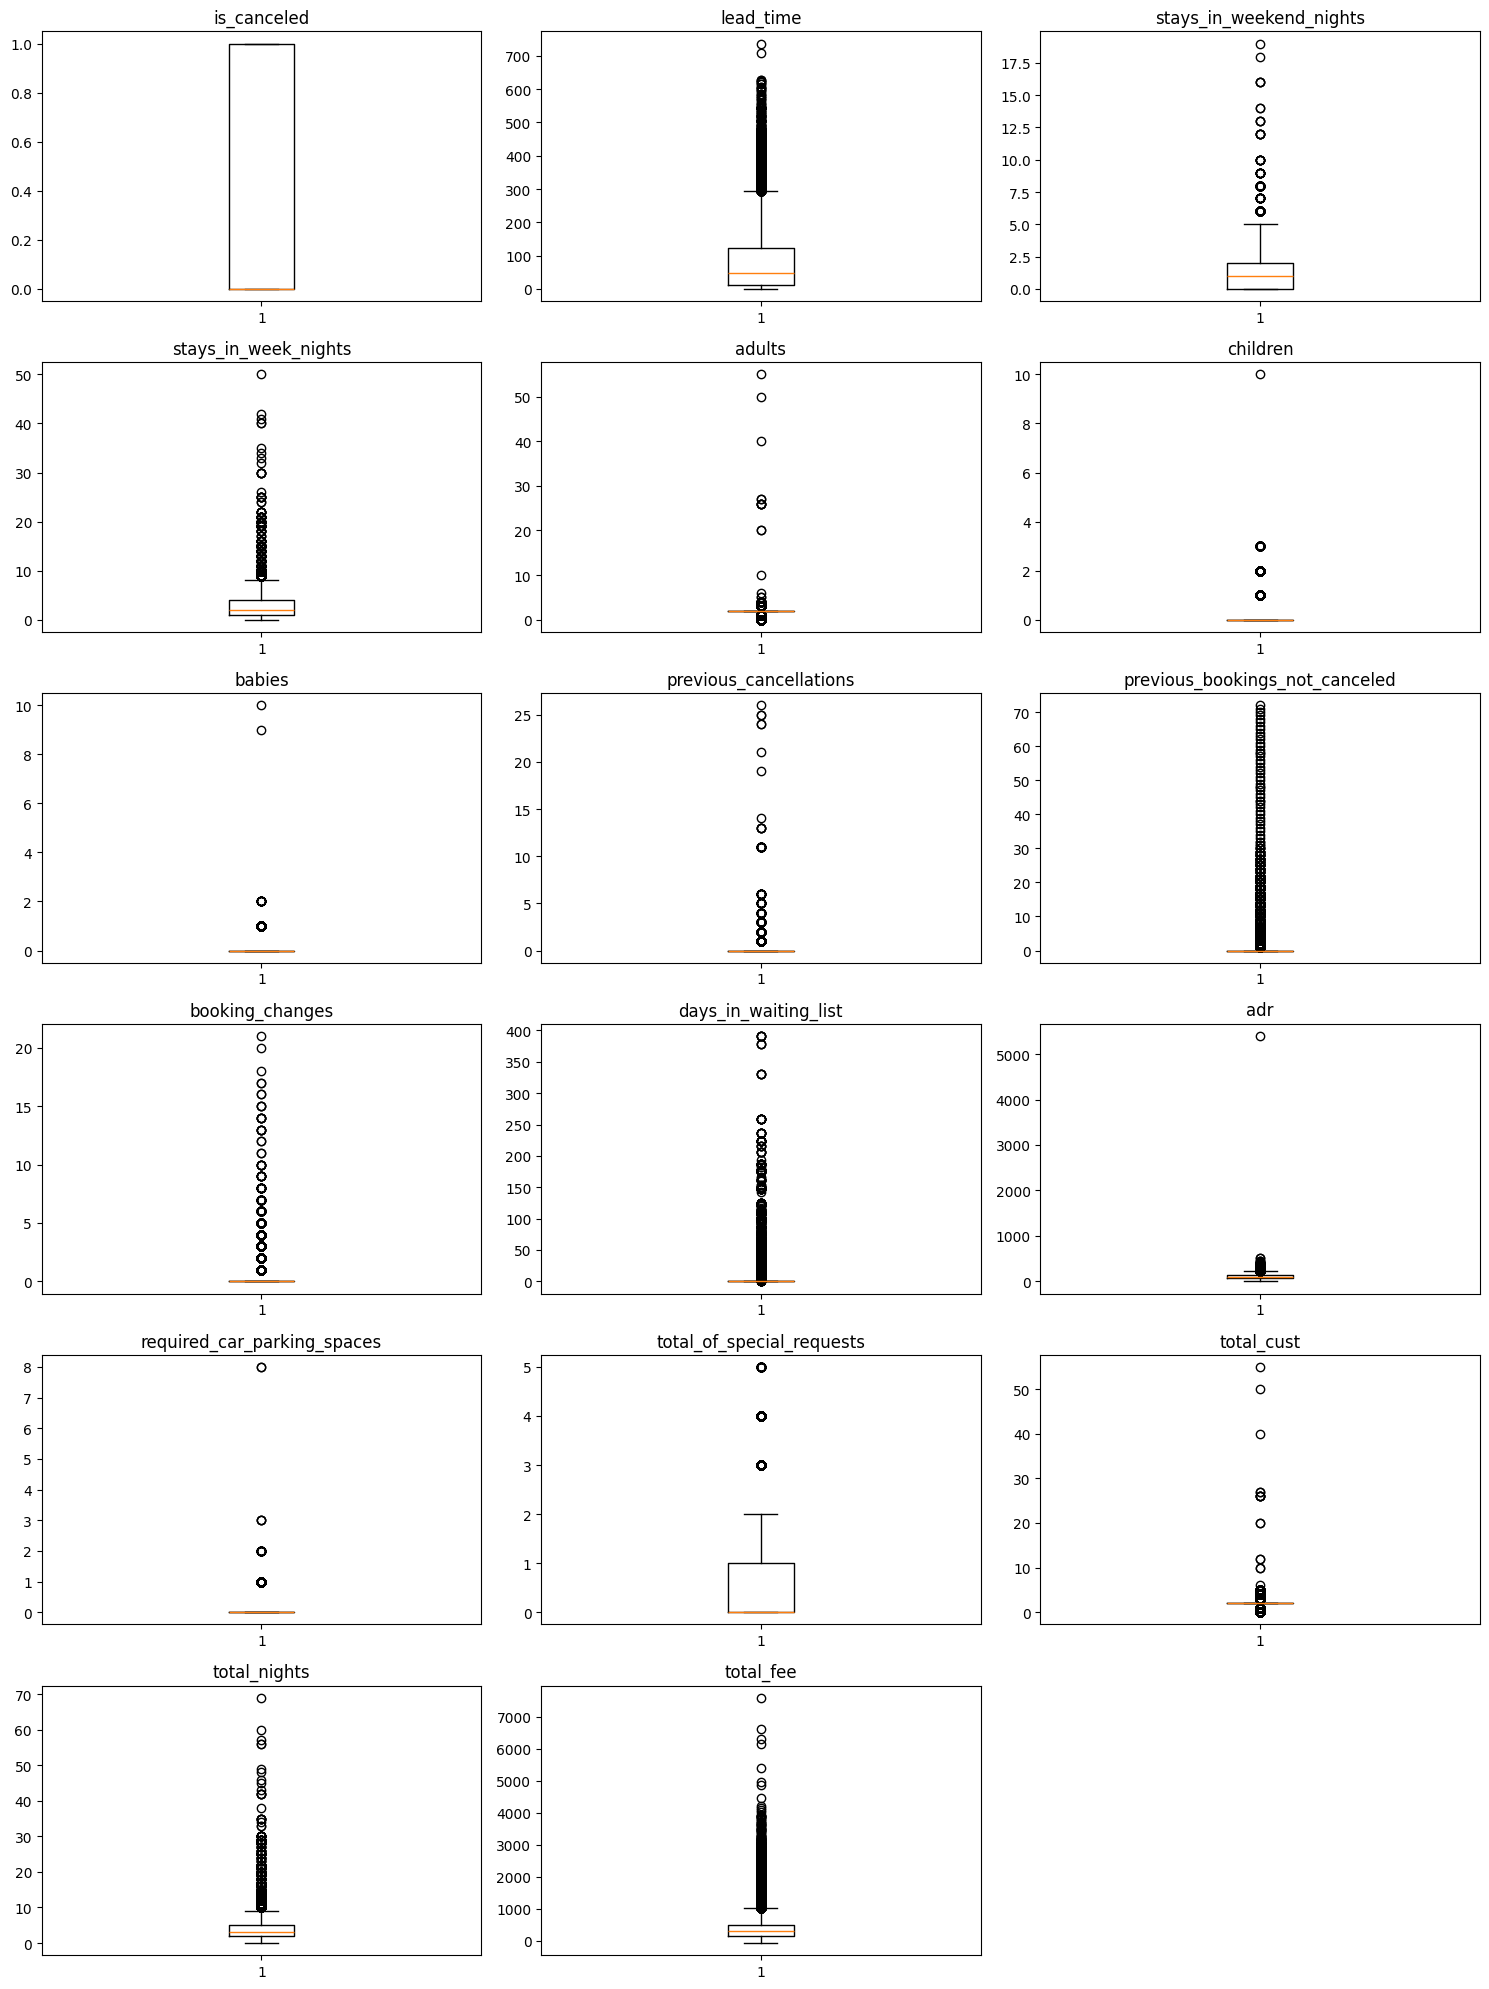

In [30]:
check_data_numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
subplot_cols = len(check_data_numerical_columns)
subplot_rows = (subplot_cols // 3 ) + (subplot_cols % 3 > 0 )

plt.figure(figsize=(15,20))

for i, column in enumerate(check_data_numerical_columns, 1):
    plt.subplot(subplot_rows, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, diketahui bahwa **terdapat outliers** di kolom 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', dan 'total_of_special_requests'.

Tidak semua outlier akan dihilangkan pada saat melakukan analisis dan membuat model prediksi, **hanya outlier ekstrim yang akan dihilangkan**, sehingga perlu ditentukan outlier ekstrim dari setiap kolom numerik.

In [31]:
# Cek persentase outlier di setiap kolom numerik
def cal_percentage_extreme_outliers(df):
    extreme_outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Hitung IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan upper and lower limits untuk extreme outliers
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR

        extreme_outliers = df[(df[column] < extreme_lower) | (df[column] > extreme_upper)]
        extreme_outliers_percentage[column] = len(extreme_outliers) / len(df) * 100

    return extreme_outliers_percentage

extreme_outliers_percentage = cal_percentage_extreme_outliers(df)
extreme_outliers_percentage


{'is_canceled': 0.0,
 'lead_time': 0.17429295159303757,
 'stays_in_weekend_nights': 0.03718249633984802,
 'stays_in_week_nights': 0.24749599126211336,
 'adults': 26.14859055099812,
 'children': 9.353721735493016,
 'babies': 1.0469196625688457,
 'previous_cancellations': 1.9555669168738816,
 'previous_bookings_not_canceled': 4.114475610606307,
 'booking_changes': 18.22058515953615,
 'days_in_waiting_list': 0.9969556831121749,
 'adr': 0.15686365643373382,
 'required_car_parking_spaces': 8.360251911412703,
 'total_of_special_requests': 0.04183030838232902,
 'total_cust': 34.92830749924473,
 'total_nights': 0.41714113081266996,
 'total_fee': 1.766168576142781}

Khusus untuk **outliers ekstrim di kolom 'is_repeated_guest' (value bernilai 1) tidak perlu dihapus**, karena value numeriknya tidak sepenuhnya berarti angka, angka 1 mengindikasikan repeated guest.

Outliers ekstrim yang akan dihapus adalah yang ditemukan pada kolom 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', dan 'total_of_special_requests'.

In [32]:
def calculate_outliers_benchmarks(df, columns):
    benchmarks = {}
    for column in columns:
        if column in df.columns:
            # Menghitung IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Menentukan upper and lower limits untuk extreme outliers
            reg_lower = Q1 - 1.5 * IQR
            reg_upper = Q3 + 1.5 * IQR
            extreme_lower = Q1 - 3 * IQR
            extreme_upper = Q3 + 3 * IQR
            benchmarks[column] = {
                'Regular Lower Bound': reg_lower,
                'Regular Upper Bound': reg_upper,
                'Extreme Lower Bound': extreme_lower,
                'Extreme Upper Bound': extreme_upper
            }
    return benchmarks

# Kolom dengan Extreme Outliers, kecuali kolom 'is_repeated_guest'
columns_outlier = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Hitung benchmarks untuk setiap kolom dengan extreme outliers
benchmarks = calculate_outliers_benchmarks(df, columns_outlier)
benchmarks_df = pd.DataFrame(benchmarks).transpose()
benchmarks_df

,Regular Lower Bound,Regular Upper Bound,Extreme Lower Bound,Extreme Upper Bound
lead_time,-158.5,293.5,-328.0,463.0
stays_in_weekend_nights,-3.0,5.0,-6.0,8.0
stays_in_week_nights,-3.5,8.5,-8.0,13.0
adults,2.0,2.0,2.0,2.0
children,0.0,0.0,0.0,0.0
babies,0.0,0.0,0.0,0.0
previous_cancellations,0.0,0.0,0.0,0.0
previous_bookings_not_canceled,0.0,0.0,0.0,0.0
booking_changes,0.0,0.0,0.0,0.0
days_in_waiting_list,0.0,0.0,0.0,0.0


Outliers **yang akan dihapus** dari kolom 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', dan 'total_of_special_requests' adalah outliers yang berada **di luar dari Extreme Lower Bound dan Extreme Upper Bound**.

In [33]:
# Remove Outliers
def remove_extr_outliers(df,columns, benchmarks):
    for column in columns :
        extreme_lower = benchmarks[column]['Extreme Lower Bound']
        extreme_upper = benchmarks[column]['Extreme Upper Bound']
        df = df[(df[column] >= extreme_lower) & (df[column] <= extreme_upper)]
        return df

df = remove_extr_outliers(df,columns_outlier, benchmarks)
df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_cust,total_nights,total_fee,alpha-3,region,sub-region
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,0.00,0,0,2015-07-01,2.0,0,0.00,PRT,Europe,Southern Europe
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,75.00,0,0,2015-07-01,1.0,1,75.00,GBR,Europe,Northern Europe
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,75.00,0,0,2015-07-01,1.0,1,75.00,GBR,Europe,Northern Europe
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,98.00,0,1,2015-07-01,2.0,2,196.00,GBR,Europe,Northern Europe
5,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,107.00,0,0,2015-07-01,2.0,2,214.00,PRT,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86057,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,96.14,0,0,2017-08-30,2.0,7,672.98,BEL,Europe,Western Europe
86058,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,225.43,0,2,2017-08-31,3.0,7,1578.01,FRA,Europe,Western Europe
86059,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,157.71,0,4,2017-08-31,2.0,7,1103.97,DEU,Europe,Western Europe
86060,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,104.40,0,0,2017-08-31,2.0,7,730.80,GBR,Europe,Northern Europe


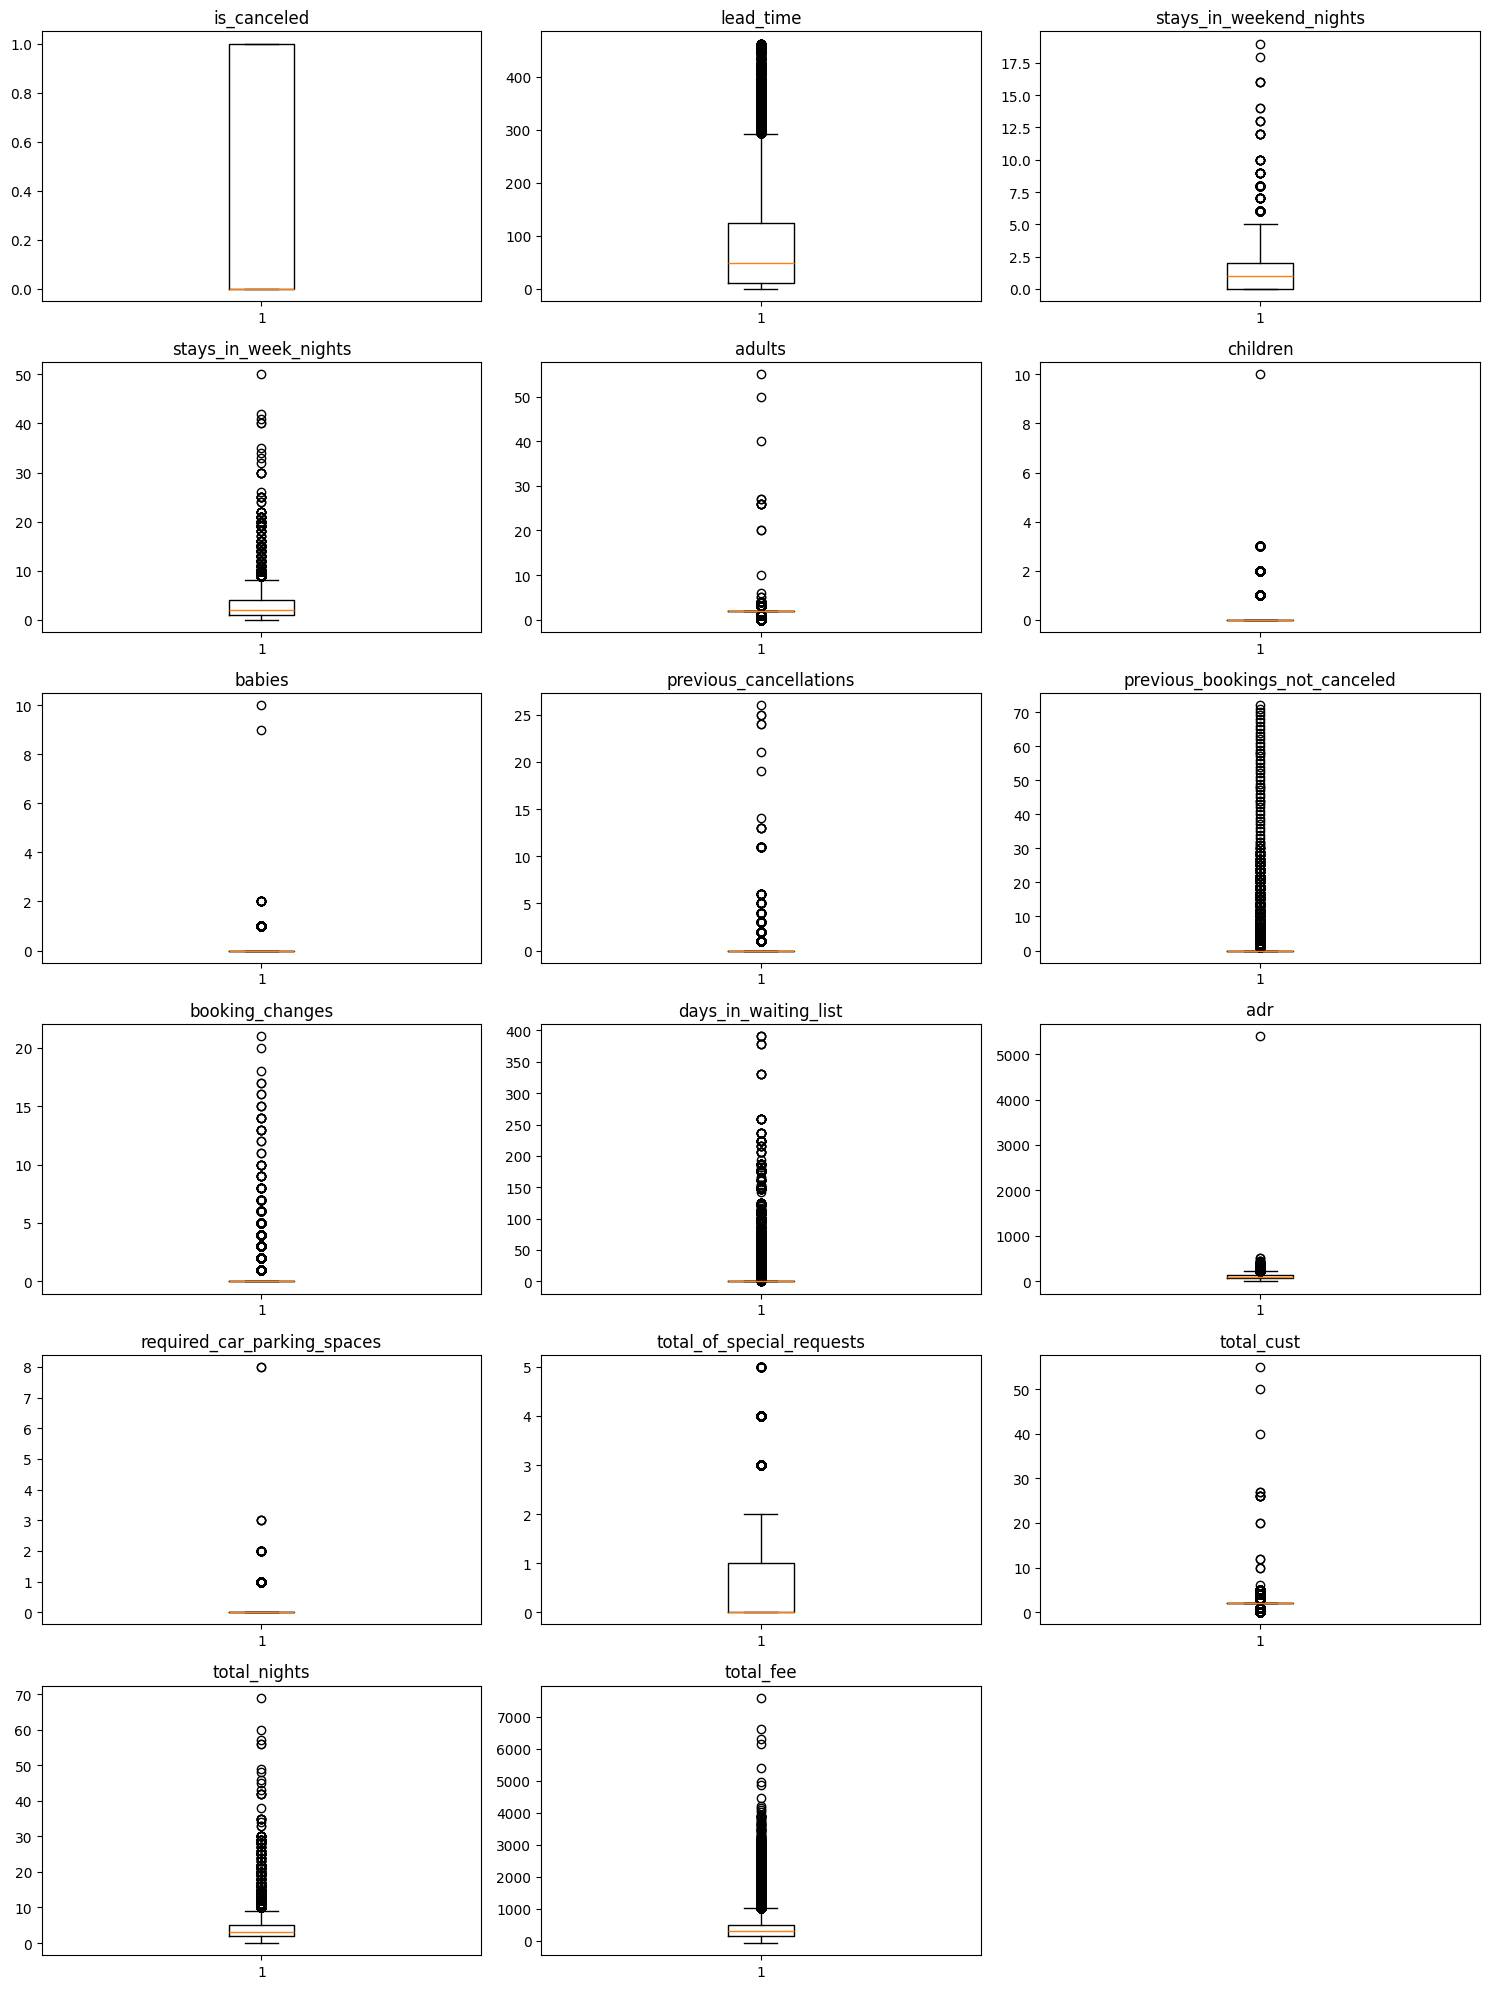

In [34]:
# mengecek kembali boxplot
check_data_numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
subplot_cols = len(check_data_numerical_columns)
subplot_rows = (subplot_cols // 3 ) + (subplot_cols % 3 > 0 )

plt.figure(figsize=(15,20))

for i, column in enumerate(check_data_numerical_columns, 1):
    plt.subplot(subplot_rows, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Masih terdapat beberapa ekstrem outliers seperti pada kolom children, babies, adr, dan required_car_parking_spaces. Sehingga kita akan melakukan penghapusan secara manual.

In [35]:
# melakukan dropping outliers secara manual
df = df[~(df['babies']> 4)]
df = df[~(df['children']> 6)]
df = df[~(df['adr']> 4000)]
df = df[~(df['adr']< 10)]
df = df[~(df['required_car_parking_spaces']> 5)]

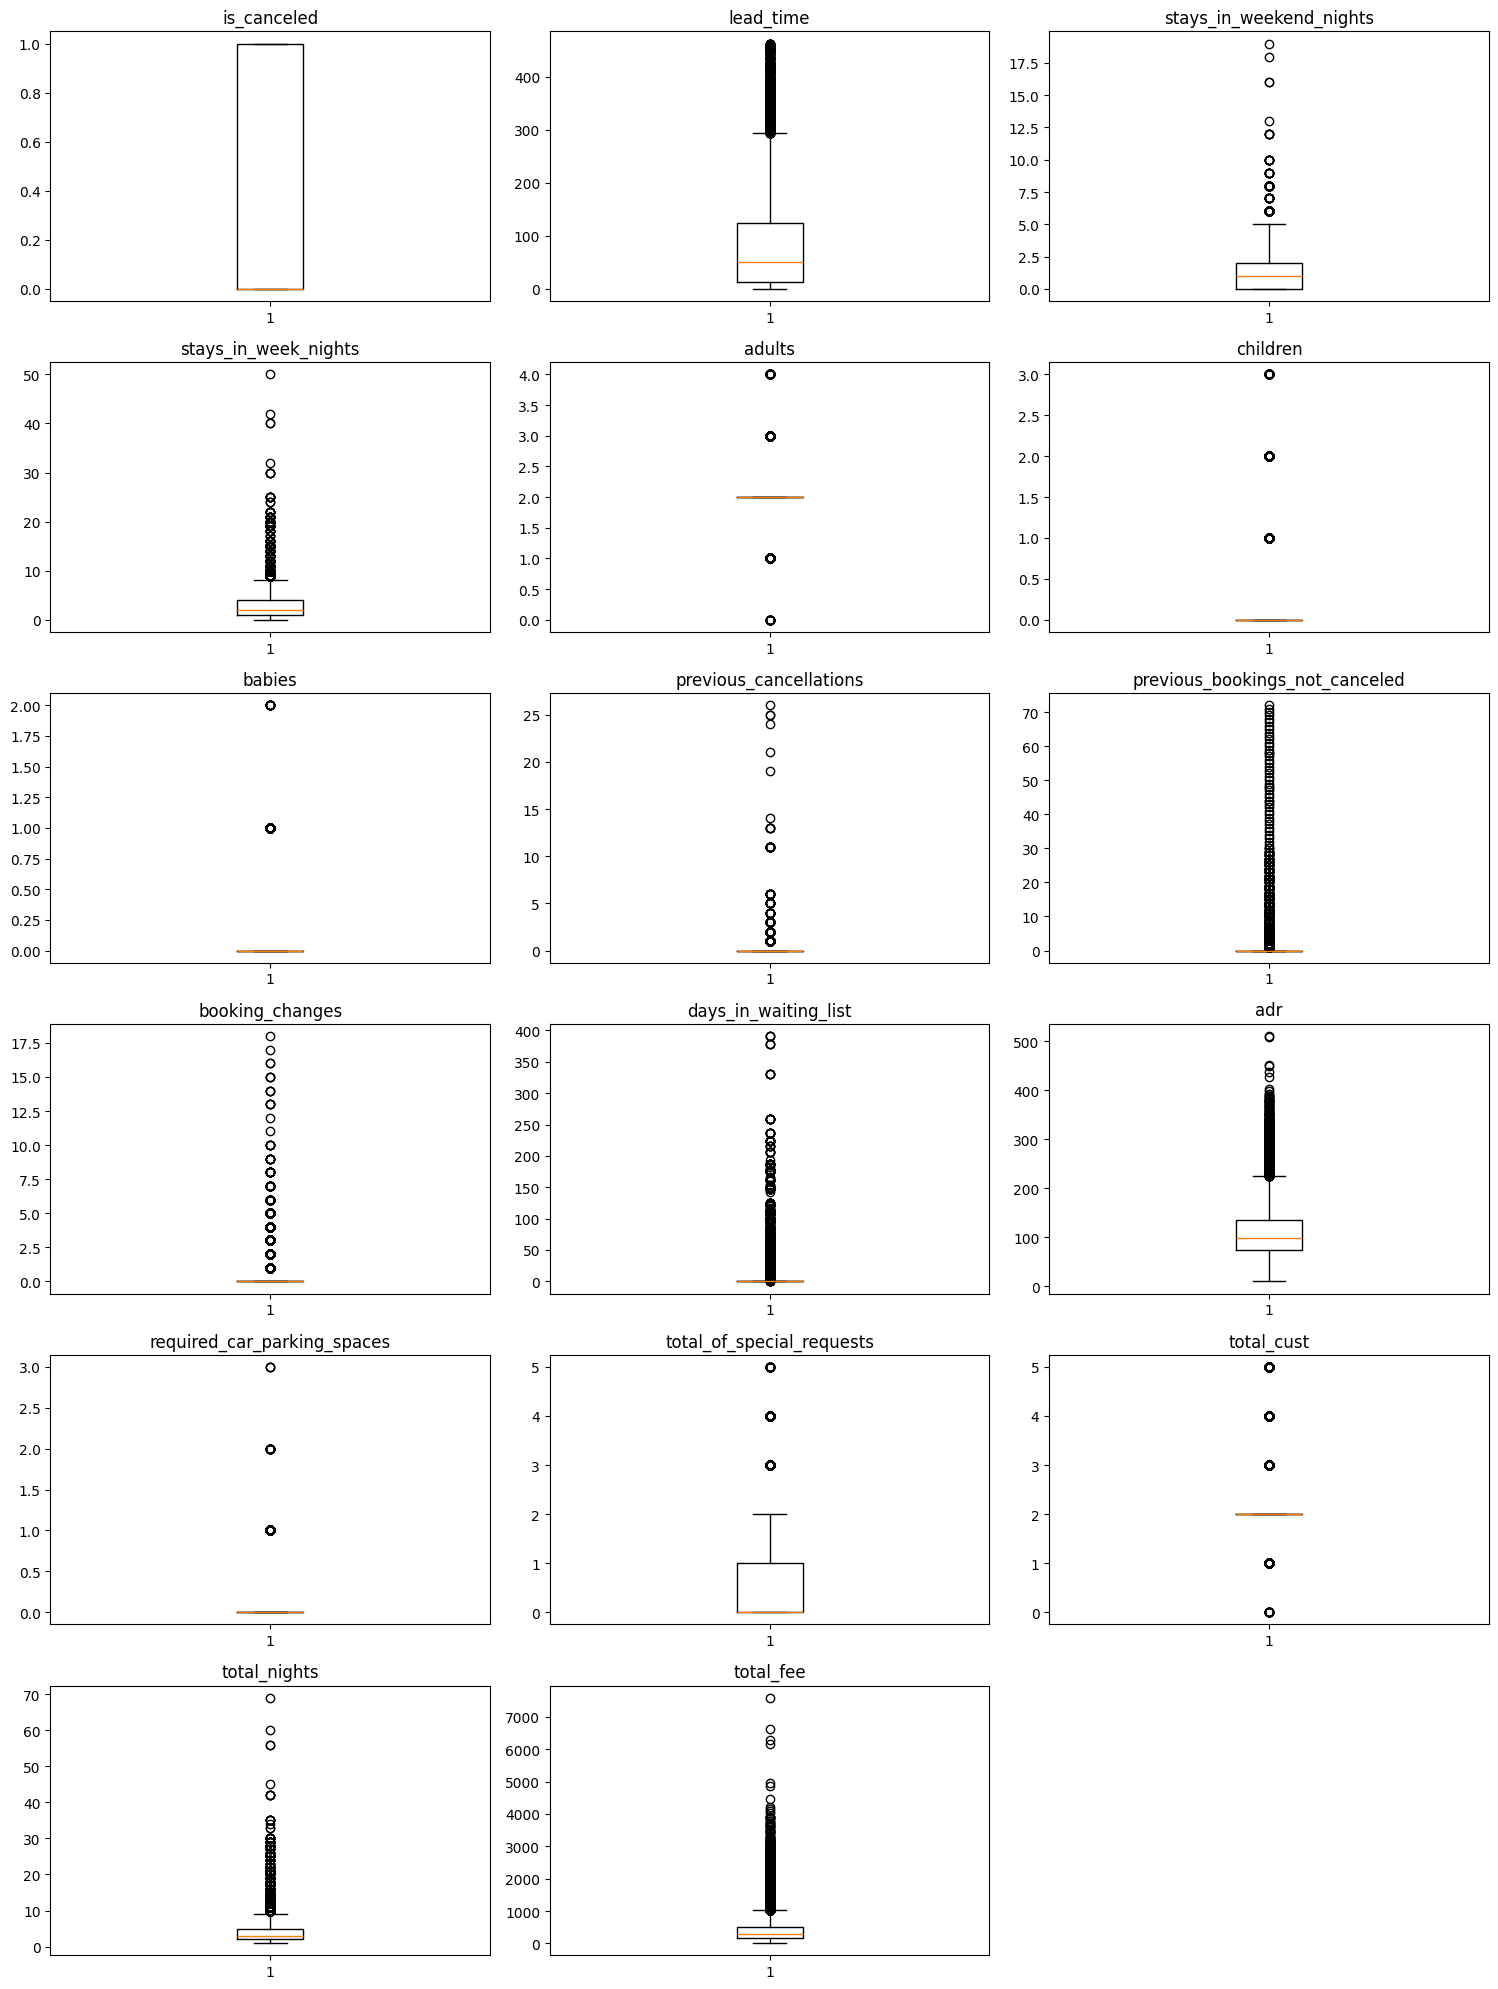

In [36]:
# mengecek kembali boxplot
check_data_numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
subplot_cols = len(check_data_numerical_columns)
subplot_rows = (subplot_cols // 3 ) + (subplot_cols % 3 > 0 )

plt.figure(figsize=(15,20))

for i, column in enumerate(check_data_numerical_columns, 1):
    plt.subplot(subplot_rows, 3, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [37]:
extract_item = []
for column_names in df.columns:
    extract_item.append([
        column_names
        ,df[column_names].dtype
        ,df[column_names].isna().sum()
        ,round(df[column_names].isna().sum()/len(df)*100, 2)
        ,df[column_names].nunique()
        ,df[column_names].unique()[:3]
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Miss Val (Num), Miss Val (%), Unique (Num), Sample of Unique'.split(', '))
extracted_item

,Name,Data Type,Miss Val (Num),Miss Val (%),Unique (Num),Sample of Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,436,"[7, 13, 14]"
3,stays_in_weekend_nights,int64,0,0.00,16,"[0, 1, 2]"
4,stays_in_week_nights,int64,0,0.00,30,"[1, 2, 3]"
5,adults,int64,0,0.00,5,"[1, 2, 3]"
6,children,float64,0,0.00,4,"[0.0, 1.0, 2.0]"
7,babies,int64,0,0.00,3,"[0, 1, 2]"
8,meal,object,0,0.00,4,"[BB, FB, HB]"
9,country,object,0,0.00,175,"[GBR, PRT, USA]"


In [38]:
print('Berikut adalah jumlah kolom dan baris dari dataset')
print(f'Kolom : {df.shape[1]}')
print(f'Baris : {df.shape[0]}')

Berikut adalah jumlah kolom dan baris dari dataset
Kolom : 30
Baris : 83961


In [39]:
extracted_item[['Data Type', 'Name']].groupby(by='Data Type').count().reset_index().rename(columns = {'Name':'Count'})

,Data Type,Count
0,int64,13
1,float64,4
2,datetime64[ns],1
3,object,12


### **C. Eksplorasi Data**


#### **C.1 Booking Cancellation**

Booking cancellation analysis adalah hasil analisa untuk mengetahui banyaknya tamu yang melakukan cancel dan tidak berdasarkan dari tipe hotel yang dipengaruhi oleh berbagai macam faktor seperti market segment, customer type, lead time, dan juga days in waiting list.
1. Cancellation by Hotel Type
2. Cancellation by Deposit Type
3. Cancellation by Lead Time
4. Cancellation by days in waiting list
5. Cancellation by Market Segment
6. Cancellation by Customer Type


##### C.1.1. Cancellation rate by Hotel Type
Pada analisa ini kita akan melihat berapa banyak tamu yang melakukan cancel secara keseluruhan dan juga dimasing-masing jenis hotel

In [40]:
# Grouping untuk seluruh data booking berdasarkan 'hotel' dan 'is_canceled'
grouped_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()
grouped_hotel

is_canceled,0,1
hotel,,
City Hotel,35846,15611
Resort Hotel,24726,7778


Total booking: 83961
Total cancel booking: 23389
Cancellation rate: 27.86%


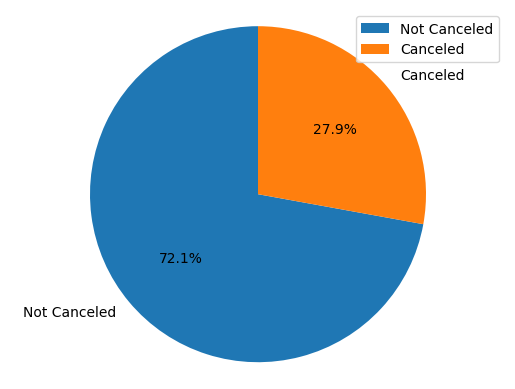

In [41]:
total_bookings = len(df)
canceled_bookings = df['is_canceled'].sum()
cancellation_rate = canceled_bookings / total_bookings * 100

print(f'Total booking: {total_bookings}')
print(f'Total cancel booking: {canceled_bookings}')
print(f'Cancellation rate: {cancellation_rate:.2f}%')

labels = ['Not Canceled', 'Canceled']
sizes = [100 - cancellation_rate, cancellation_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(loc="upper right")
plt.show()


**Insights:**
- Secara keseluruhan persentase pembatalan reservasi atau cancellation rate yang terjadi diseluruh hotel baik City maupun Resort Hotel sangat tinggi yaitu diangka **27.8%** atau **23.624** reservasi dalam kurun waktu 3 tahun yaitu dari tahun 2015-2018.

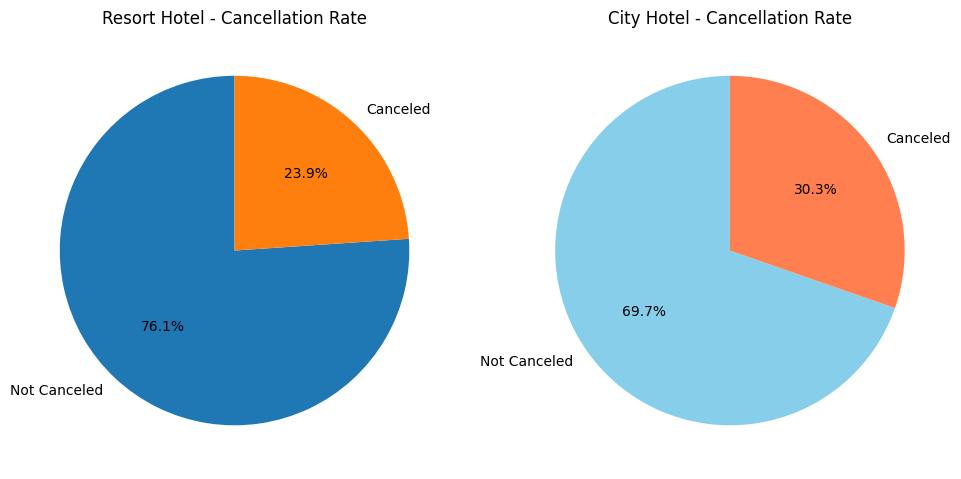

In [42]:
# Data untuk Resort Hotel & City Hotel
resort_data = grouped_hotel.loc['Resort Hotel']
city_data = grouped_hotel.loc['City Hotel']

# Membuat dua pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(resort_data, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Resort Hotel - Cancellation Rate')

axes[1].pie(city_data, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])
axes[1].set_title('City Hotel - Cancellation Rate')

plt.tight_layout()
plt.show()


**Insights:**
- Berdasarkan pie chart cancellation rate tiap hotel, diketahui bahwa pembatalan **booking lebih sering terjadi di City Hotel** (cancellation rate sebesar 30.3%) dibandingkan dengan Resort Hotel (cancellation rate sebesar 23.7%).
- Baik City Hotel maupun Resort Hotel mendapatkan pembatalan booking yang lebih sedikit dibandingkan booking tanpa pembatalan.

##### C.1.2. Cancellation by ADR

In [93]:
# Melihat nilai min dan max adr sebelum membuat group adr
min_adr = df['adr'].min()
max_adr = df['adr'].max()

print("Min ADR:", min_adr)
print("Max ADR:", max_adr)

Min ADR: 10.0
Max ADR: 510.0


ADR hotel di Portugal biasanya dalam rentang 70 and 200 EUR (https://travelbi.turismodeportugal.pt/en/accommodation/revpar-and-adr/). Maka akan dibuat pengelompokan level adr sebagai berikut:
- Low: < 90 EUR 
- Medium: 90 - 150 EUR
- High: Above > 150 EUR

In [95]:
df['adr_cat'] = np.where(df['adr'] < 90, 'Low',
                        np.where(df['adr'] < 150, 'Medium', 'High'))

In [96]:
# Menentukan urutan level
order_adr = ['Low', 'Medium', 'High']

# Melakukan grouping berdasarkan 'adr_cat'
df['adr_cat'] = pd.Categorical(df['adr_cat'], categories=order_adr, ordered=True)

grouped_adr = df.groupby(['adr_cat', 'hotel', 'is_canceled']).size().unstack('is_canceled')
grouped_adr_sorted = grouped_adr.sort_index(ascending=True) 

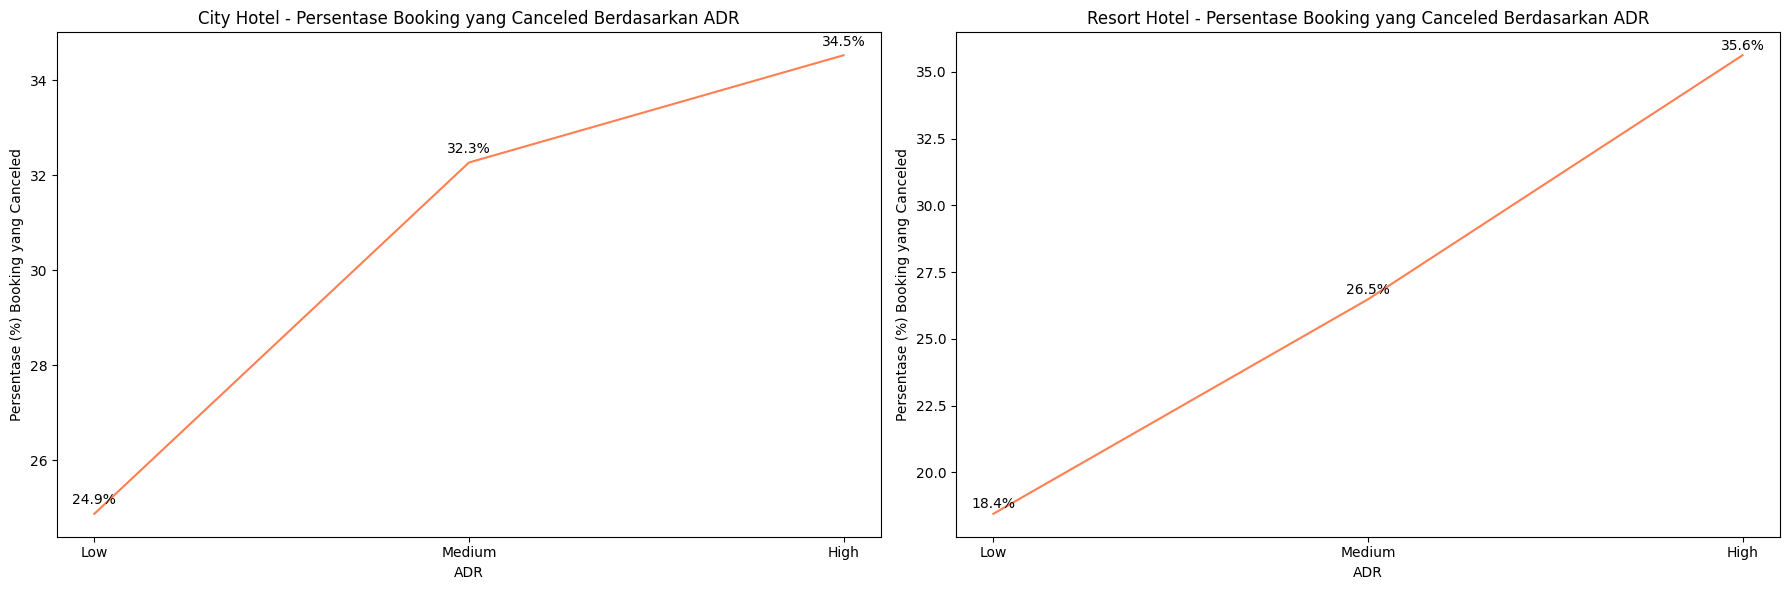

In [101]:
# Persentase untuk masing-masing kategori
grouped_adr_sorted_percentage = grouped_adr_sorted.div(grouped_adr_sorted.sum(axis=1), axis=0) * 100

# Filter data berdasarkan 'Canceled' (1) dan jenis hotel ('City Hotel' dan 'Resort Hotel')
canceledadr_percentage_city = grouped_adr_sorted_percentage.xs('City Hotel', level='hotel')[1]  # Untuk City Hotel
canceledadr_percentage_resort = grouped_adr_sorted_percentage.xs('Resort Hotel', level='hotel')[1]  # Untuk Resort Hotel

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting City Hotel
canceledadr_percentage_city.plot(kind='line', color='coral', ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking yang Canceled')
ax[0].set_xlabel('ADR')
ax[0].set_title('City Hotel - Persentase Booking yang Canceled Berdasarkan ADR')
ax[0].set_xticks(range(len(canceledadr_percentage_city.index)))
ax[0].set_xticklabels(canceledadr_percentage_city.index)

for x, y in zip(canceledadr_percentage_city.index, canceledadr_percentage_city):
    if y > 0:
        ax[0].text(canceledadr_percentage_city.index.get_loc(x), y + 0.2, f'{y:.1f}%', ha='center')

# Plotting Resort Hotel
canceledadr_percentage_resort.plot(kind='line', color='coral', ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking yang Canceled')
ax[1].set_xlabel('ADR')
ax[1].set_title('Resort Hotel - Persentase Booking yang Canceled Berdasarkan ADR')
ax[1].set_xticks(range(len(canceledadr_percentage_resort.index)))
ax[1].set_xticklabels(canceledadr_percentage_resort.index)

for x, y in zip(canceledadr_percentage_resort.index, canceledadr_percentage_resort):
    if y > 0:
        ax[1].text(canceledadr_percentage_resort.index.get_loc(x), y + 0.2, f'{y:.1f}%', ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insights:**
- Semakin tinggi ADR hotel berpengaruh pada semakin tingginya cancellation rate pada city maupun resort hotel, artinya pesanan hotel dengan ADR tinggi cenderung dibatalkan. Hal ini terlihat pada ADR low (<90 EUR) mendapat cancellation rate sebesar 24.9% di city hotel dan 18.4% di resort hotel), sedangkan ADR kategori high (>150 EUR) mendapat cancellation rate 34.5% di city hotel dan 35.65 di resort hotel.

##### C.1.3. Cancellation by Deposit Type

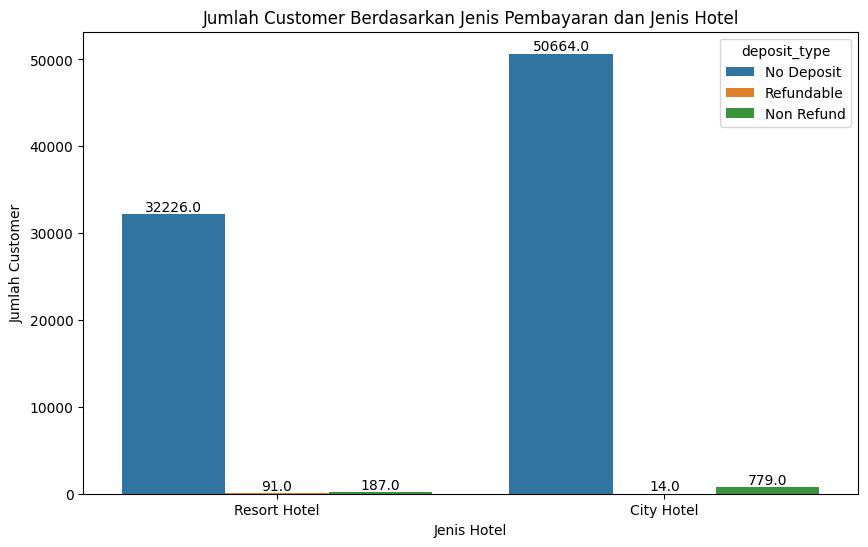

In [44]:
# Plot Jumlah customer dengan jenis pembayaran berbeda
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hotel', hue='deposit_type', data=df)

# Menambahkan label di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            '{}'.format(height),
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center', xytext=(0, 5),
            textcoords='offset points'
        )

plt.title('Jumlah Customer Berdasarkan Jenis Pembayaran dan Jenis Hotel')
plt.xlabel('Jenis Hotel')
plt.ylabel('Jumlah Customer')
plt.show()


In [45]:
# Menghitung total customer dan persentase customer yang melakukan cancel untuk setiap jenis pembayaran
deposit_type_cancel_stats = df.groupby('deposit_type')['is_canceled'].agg(['sum', 'count'])
deposit_type_cancel_stats['cancel_percentage'] = (deposit_type_cancel_stats['sum'] / deposit_type_cancel_stats['count']) * 100
print(deposit_type_cancel_stats)


                sum  count  cancel_percentage
deposit_type                                 
No Deposit    22451  82890          27.085294
Non Refund      913    966          94.513458
Refundable       25    105          23.809524


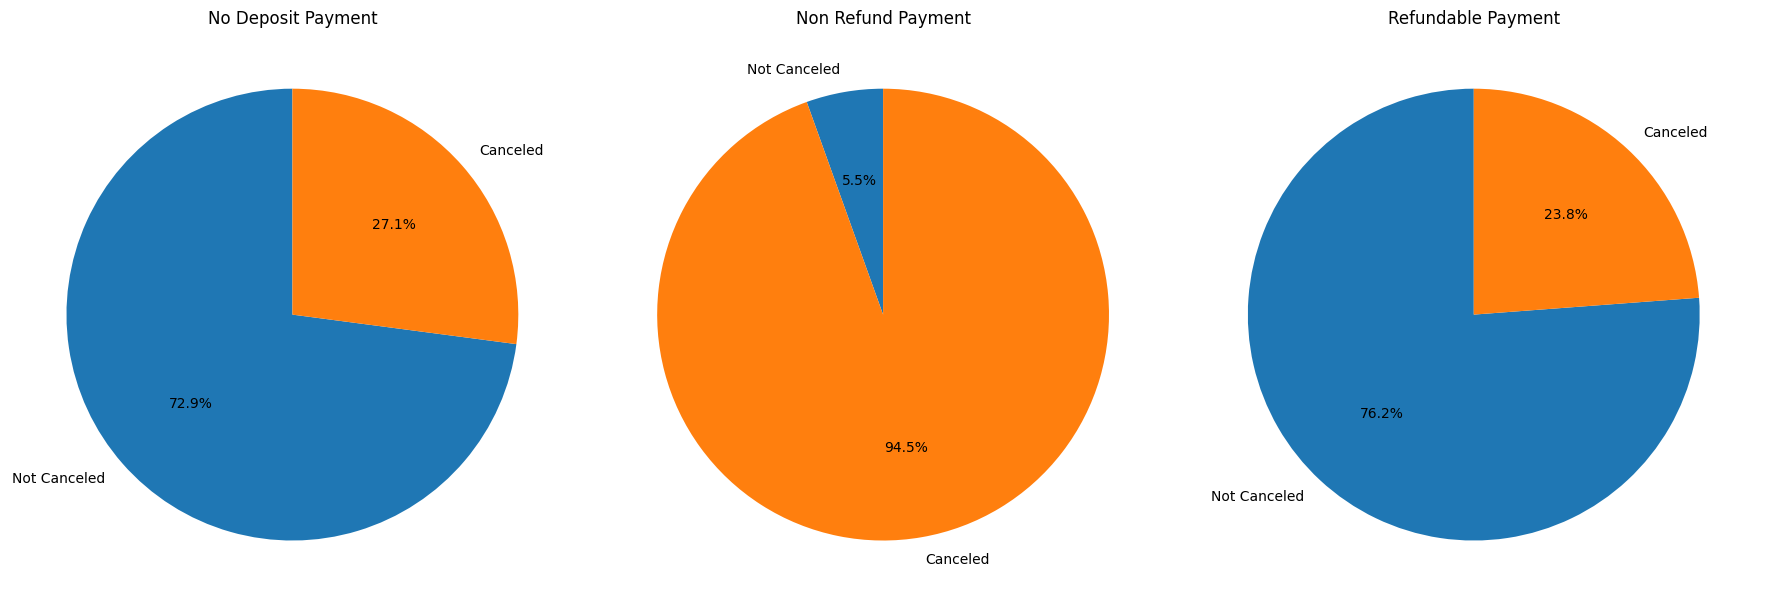

In [46]:
# 2. Membuat pie chart untuk setiap deposit_type (No Deposit, Non Refund, Refundable)
deposit_types = deposit_type_cancel_stats.index
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, deposit_type in enumerate(deposit_types):
    # Data untuk pie chart: cancelled vs not cancelled
    cancel_count = deposit_type_cancel_stats.loc[deposit_type, 'sum']
    not_cancel_count = deposit_type_cancel_stats.loc[deposit_type, 'count'] - cancel_count

    # Membuat pie chart
    axes[i].pie([not_cancel_count, cancel_count],
                labels=['Not Canceled', 'Canceled'],
                autopct='%1.1f%%',
                startangle=90)

    axes[i].set_title(f'{deposit_type} Payment')

# Menampilkan semua pie chart
plt.tight_layout()
plt.show()


INSIGHT:

- Jika dilihat dari jumlah customer atau tamu berdasarkan tipe pembayaran maka bisa kita ketahui bahwasanya tipe pembayaran dengan tidak ada deposit (No Deposit) menjadi pilihan paling utama bagi para customer dengan jumlah sebanyak 86.158 booking atau sekitar 98.75% dari keseluruhan. Hal ini dapat diasumsikan sebagai salah satu strategi yang diterapkan oleh hotel untuk mencari customer, akan tetapi perlu diperhatikan juga bahwa ketika customer tidak melakukan deposit dan mereka ternyata melakukan pembatalan reservasi maka selain hotel tidak mendapatkan revenue dari customer yang melakukan pembatalan tadi, hotel juga akan kehilangan revenue dari tidak adanya uang deposit sebagai jaminan. Maka sangat penting untuk juga memerhatikan porsi jenis kamar atau paket yang perlu diterapkan booking baik yang refundable ataupun tidak.
- Kemudian untuk jenis pembayaran terbanyak yang kedua adalah pembayaran dengan tipe Non-refundable atau deposit yang tidak bisa dikembalikan dengan total sebanyak 980 reservasi dan terakhir diikuti dengan tipe pembayaran dengan deposit refundable dengan total sebanyak 107 reservasi saja. Dan jika dilihat dari persentase pembatalanya maka Non-refundble deposit menjadi opsi pembayaran dengan cancellation rate paling tinggi yaitu 94.4% sedangkan jenis pembayaran refundable deposit mempunyai cancellation rate sebanyak 24.3% saja.
- Hal ini membuktikan bahwa sebetulnya masih ada tamu yang ketika memesan hotel tidak keberatan dengan adanya deposit baik non-refundable maupun refundable. Pada kasus yang kita hadapi non-refundable deposit menjadi opsi dengan cancellation rate paling tinggi yang mana hal tersebut sebetulnya cukup baik karena hotel masih mendapatkan revenue dari deposit meskipun tidak maksmimal.
- Sehingga kita bisa mencoba untuk menyusun kembali strategi dengan membuat jenis-jenis paket penginapan ataupun memilih kamar-kamar tertentu yang cocok untuk diterapkan berbagai jenis pembayaran yang berbeda.

##### C.1.4. Cancellation by Lead Time

Pada analisa ini kita akan mencoba untuk mencari tahu dan juga membuktikan apakah lead time atau jangka waktu dari orang yang melakukan booking hotel sampai tiba di hotel yang semakin panjang akan mempengaruhi jumlah cancel yang tinggi juga.

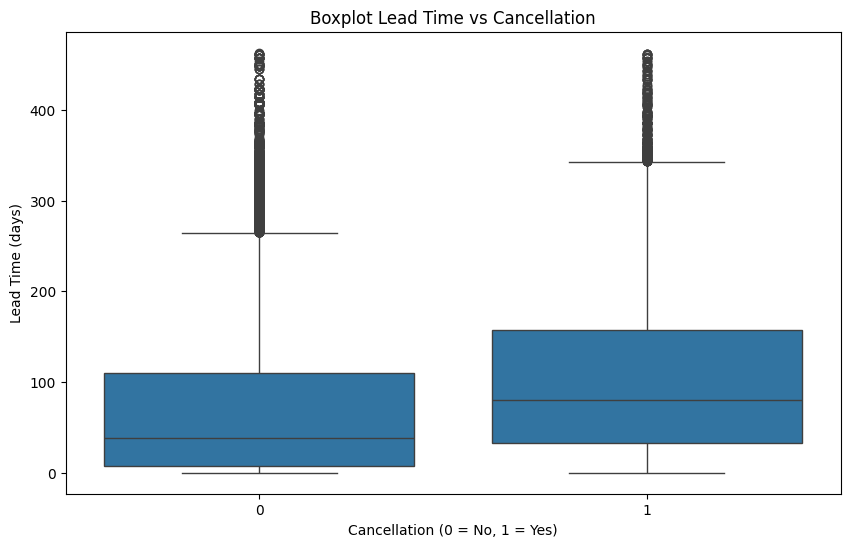

In [47]:
# Membuat boxplot lead time berdasarkan pembatalan
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Boxplot Lead Time vs Cancellation')
plt.xlabel('Cancellation (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (days)')
plt.show()

In [48]:
# Menghitung median untuk lead time berdasarkan pembatalan
lead_time_stats = df.groupby('is_canceled')['lead_time'].median()
lead_time_stats

is_canceled
0    38.0
1    80.0
Name: lead_time, dtype: float64

**Insights**

- Boxplot menunjukkan bahwa terdapat perbedaan lead time yang signifikan antara pemesanan yang dibatalkan dan tidak dibatalkan. **Booking yang dibatalkan memiliki median lead time yang lebih tinggi (80 hari)** dibandingkan dengan median lead time booking yang tidak dibatalkan (hanya 39 hari). Artinya, **semakin lama waktu tunggu / lead time** (lama waktu antara tanggal booking dan tanggal kedatangan) **semakin besar kemungkinan pesanan tersebut dibatalkan**.

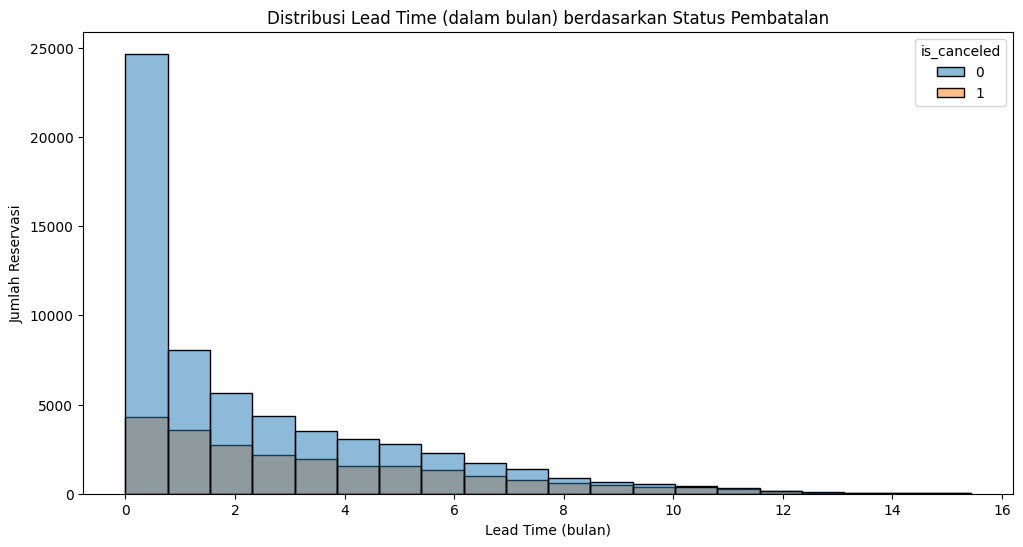

In [49]:
# Mengubah lead time menjadi bulan
df['lead_time_month'] = df['lead_time'] / 30

# Membuat histogram untuk distribusi lead time berdasarkan status pembatalan
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time_month', hue='is_canceled', bins=20, kde=False)
plt.title('Distribusi Lead Time (dalam bulan) berdasarkan Status Pembatalan')
plt.xlabel('Lead Time (bulan)')
plt.ylabel('Jumlah Reservasi')
plt.show()


**Insights**

- Walaupun boxplot sebelumnya menunjukkan waktu yang singkat memiliki kecenderungan pesanan tidak dibatalkan, berdasarkan histogram di atas sudah terdapat booking yang dibatalkan bahkan ketika lead time bulan ke-1, artinya **pesanan ada yang sudah dibatalkan walaupun lead time (lama waktu antara tanggal booking dan tanggal kedatangan) <1 bulan**.

In [50]:
waiting_list_min = df['lead_time'].min()
waiting_list_max = df['lead_time'].max()

print(waiting_list_min)
print(waiting_list_max)

0
463


Berdasarkan keterangan diatas, diketahui bahwa nilai minimum lead time adalah 0 dan nilai maksimumnya adalah 467. Perlu dilakukan pembuatan kategori lead time berdasarkan nilai minimum dan maksimum untuk memudahkan proses interpretasi.

In [51]:
df['lead_time_cat'] = np.where((df['lead_time']) < 31, '1',
                        np.where((df['lead_time']) <= 61, '2',
                        np.where((df['lead_time']) <= 91, '3',
                        np.where((df['lead_time']) <= 121, '4',
                        np.where((df['lead_time']) <= 151, '5',
                        np.where((df['lead_time']) <= 181, '6',
                        np.where((df['lead_time']) <= 211, '7',
                        np.where((df['lead_time']) <= 241, '8',
                        np.where((df['lead_time']) <= 271, '9',
                        np.where((df['lead_time']) <= 301, '10',
                        np.where((df['lead_time']) <= 331, '11',
                        np.where((df['lead_time']) <= 361, '12', '>12'))))))))))))

In [52]:
# Menentukan urutan minggu (week) untuk 'lead_time_cat'
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>12']

# Melakukan grouping berdasarkan 'lead_time_cat'
df['lead_time_cat'] = pd.Categorical(df['lead_time_cat'], categories=order, ordered=True)

grouped_leadtime = df.groupby(['lead_time_cat', 'hotel', 'is_canceled']).size().unstack('is_canceled')
grouped_leadtime_sorted = grouped_leadtime.sort_index(ascending=True)  # Sorts based on the custom order

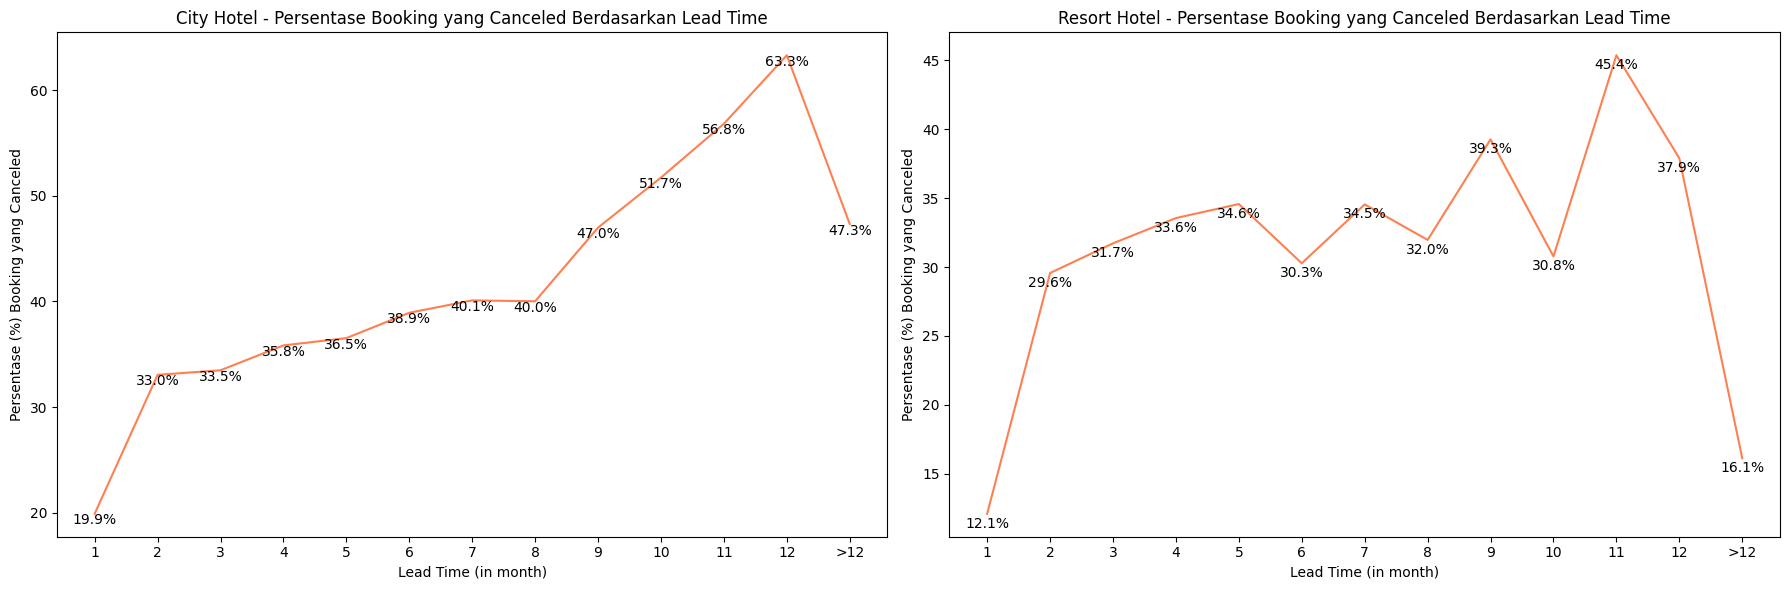

In [53]:
# Persentase untuk masing-masing kategori
grouped_leadtime_sorted_percentage = grouped_leadtime_sorted.div(grouped_leadtime_sorted.sum(axis=1), axis=0) * 100

# Filter data berdasarkan 'Canceled' (1) dan jenis hotel ('City Hotel' dan 'Resort Hotel')
canceled_percentage_city = grouped_leadtime_sorted_percentage.xs('City Hotel', level='hotel')[1]  # Untuk City Hotel
canceled_percentage_resort = grouped_leadtime_sorted_percentage.xs('Resort Hotel', level='hotel')[1]  # Untuk Resort Hotel

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting City Hotel
canceled_percentage_city.plot(kind='line', color='coral', ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking yang Canceled')
ax[0].set_xlabel('Lead Time (in month)')
ax[0].set_title('City Hotel - Persentase Booking yang Canceled Berdasarkan Lead Time')
ax[0].set_xticks(range(len(canceled_percentage_city.index)))
ax[0].set_xticklabels(canceled_percentage_city.index)

for x, y in zip(canceled_percentage_city.index, canceled_percentage_city):
    if y > 0:
        ax[0].text(canceled_percentage_city.index.get_loc(x), y - 1, f'{y:.1f}%', ha='center')

# Plotting Resort Hotel
canceled_percentage_resort.plot(kind='line', color='coral', ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking yang Canceled')
ax[1].set_xlabel('Lead Time (in month)')
ax[1].set_title('Resort Hotel - Persentase Booking yang Canceled Berdasarkan Lead Time')
ax[1].set_xticks(range(len(canceled_percentage_resort.index)))
ax[1].set_xticklabels(canceled_percentage_resort.index)

for x, y in zip(canceled_percentage_resort.index, canceled_percentage_resort):
    if y > 0:
        ax[1].text(canceled_percentage_resort.index.get_loc(x), y - 1, f'{y:.1f}%', ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Overall Insight:**

Persentase canceled booking terendah akan terjadi jika lead time tidak lebih dari 1 bulan, baik pada city hotel (persentase canceled booking 19.9%) maupun resort hotel (persentase canceled booking 12.1%). **Customer cenderung lebih jarang melakukan pembatalan jika jarak antara tanggal booking hingga tanggal kedatangan (lead time) terjadi dalam waktu kurang dari 1 bulan**.

**Additional Insights:**
- Pada City Hotel, persentase canceled booking terus mengalami kenaikan saat lead time >1 bulan hingga 12 bulan, mencapai 63.3%. Namun, mengalami penurunan menjadi 46.5% saat lead time >12 bulan. Customer cenderung melakukan pembatalan booking jika jarak antara tanggal booking hingga tanggal kedatangan terjadi >1 bulan hingga 12 bulan.

- Pada Resort Hotel, persentase canceled booking terus mengalami kenaikan saat lead time >1 bulan hingga 5 bulan, lalu mengalami fluktuasi dan mencapai persentase tertinggi (45.4%) saat lead time 11 bulan, lalu kembali lagi terjadi penurunan peresentasi canceled booking saat lead time 12 hingga >12 bulan. Customer cenderung melakukan pembatalan booking jika jarak antara tanggal booking hingga tanggal kedatangan terjadi >1 - 5 bulan, 9 bulan, dan 11 bulan.

##### C.1.5. Cancellation by Days in Waiting List

Pada analisa ini kita akan mencoba untuk melihat hubungan antara days in waiting list dengan kemungkinan tamu yang cancel. Kita juga akan melihat hubungan antara days in waiting list dengan lead time untuk mengetahui berapa lama waktu booking seseorang dikonfirmasi dan berapa lama tamu tersebut sampai untuk menginap di hotel.

In [54]:
waiting_list_min = df['days_in_waiting_list'].min()
waiting_list_max = df['days_in_waiting_list'].max()

print(waiting_list_min)
print(waiting_list_max)

0
391


Berdasarkan keterangan diatas, diketahui bahwa nilai minimum days in waiting list adalah 0 dan nilai maksimumnya adalah 391. Perlu dilakukan pembuatan kategori days in waiting list berdasarkan nilai minimum dan maksimum untuk memudahkan proses interpretasi.

In [55]:
# Mengelompokkan days_in_waiting_list dalam minggu/week
week_cat = [
    (df['days_in_waiting_list'] < 8),   # Week 1: 0-7 hari
    (df['days_in_waiting_list'] < 15),  # Week 2: 8-14 hari
    (df['days_in_waiting_list'] < 22),  # Week 3: 15-21 hari
    (df['days_in_waiting_list'] < 29),  # Week 4: 22-28 hari
    (df['days_in_waiting_list'] < 36),  # Week 5: 29-35 hari
    (df['days_in_waiting_list'] >= 36)  # >5 Weeks: 36 atau lebih dari 36 hari
]

# Kategori urutan minggu/week
order_week = ['1', '2', '3', '4', '5', '>5']

# Kolom days_in_waiting_list dalam kategori week
df['dayswait_cat'] = np.select(week_cat, order_week, default='>5')

In [56]:
# Ubah kolom 'dayswait_cat' menjadi tipe kategorikal
df['dayswait_cat'] = pd.Categorical(df['dayswait_cat'], categories=order_week, ordered=True)

grouped_dayswait = df.groupby(['dayswait_cat', 'hotel', 'is_canceled']).size().unstack('is_canceled')
grouped_dayswait_sorted = grouped_dayswait.sort_index(ascending=True)  # Sorts berdasarkan week 1 hingga >5

grouped_dayswait_sorted


is_canceled                    0      1
dayswait_cat hotel                     
1            City Hotel    35445  15349
             Resort Hotel  24627   7766
2            City Hotel        9     18
             Resort Hotel     10      1
3            City Hotel       22     27
             Resort Hotel      3      0
4            City Hotel       24     22
             Resort Hotel      1      1
5            City Hotel       16     27
             Resort Hotel      2      1
>5           City Hotel      330    168
             Resort Hotel     83      9

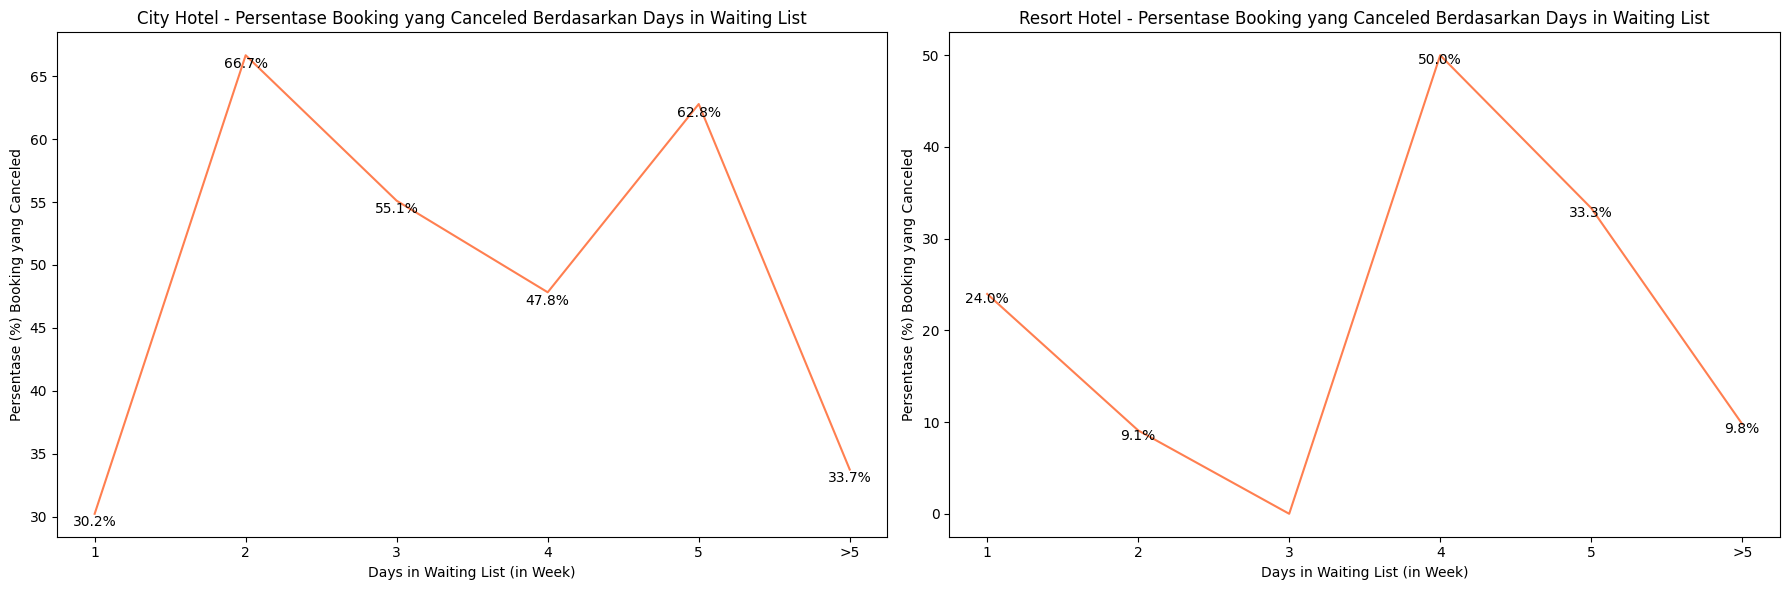

In [57]:
# Menghitung persentase untuk masing-masing kategori
grouped_dayswait_sorted_percentage = grouped_dayswait_sorted.div(grouped_dayswait_sorted.sum(axis=1), axis=0) * 100

# Filter data berdasarkan 'Canceled' (1) dan jenis hotel ('City Hotel' dan 'Resort Hotel')
canceled_percentage_city = grouped_dayswait_sorted_percentage.xs('City Hotel', level='hotel')[1]  # Untuk City Hotel
canceled_percentage_resort = grouped_dayswait_sorted_percentage.xs('Resort Hotel', level='hotel')[1]  # Untuk Resort Hotel

# Membuat visualisasi
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting City Hotel
canceled_percentage_city.plot(kind='line', color='coral', ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking yang Canceled')
ax[0].set_xlabel('Days in Waiting List (in Week)')
ax[0].set_title('City Hotel - Persentase Booking yang Canceled Berdasarkan Days in Waiting List')
ax[0].set_xticks(range(len(canceled_percentage_city.index)))
ax[0].set_xticklabels(canceled_percentage_city.index)

# Label City Hotel
for x, y in zip(canceled_percentage_city.index, canceled_percentage_city):
    if y > 0:
        ax[0].text(canceled_percentage_city.index.get_loc(x), y - 1, f'{y:.1f}%', ha='center')

# Plotting Resort Hotel
canceled_percentage_resort.plot(kind='line', color='coral', ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking yang Canceled')
ax[1].set_xlabel('Days in Waiting List (in Week)')
ax[1].set_title('Resort Hotel - Persentase Booking yang Canceled Berdasarkan Days in Waiting List')
ax[1].set_xticks(range(len(canceled_percentage_resort.index)))
ax[1].set_xticklabels(canceled_percentage_resort.index)

# Label Resort Hotel
for x, y in zip(canceled_percentage_resort.index, canceled_percentage_resort):
    if y > 0:
        ax[1].text(canceled_percentage_resort.index.get_loc(x), y - 1, f'{y:.1f}%', ha='center')


plt.tight_layout()
plt.show()


**Insights:**
- Pada City Hotel, Persentase canceled booking terendah (30.2%) akan terjadi jika Days in Waiting List berlangsung tidak lebih dari 1 minggu. Artinya, **customer lebih jarang melakukan pembatalan booking jika pihak hotel  melakukan konfirmasi booking dalam waktu kurang dari 1 minggu**. Pada minggu-minggu selanjutnya terjadi fluktuasi persentase canceled booking oleh customer.

- Pada Resort hotel, Persentase canceled booking terendah (0%) akan terjadi jika Days in Waiting List berlangsung 3 minggu. Namun, dari minggu ke 1 hingga >5 minggu terjadi fluktuasi pada grafik persentase canceled booking, **sehingga days in waiting list pada resort hotel tidak terlalu signifikan mempengaruhi alasan customer melakukan pembatalan booking**.


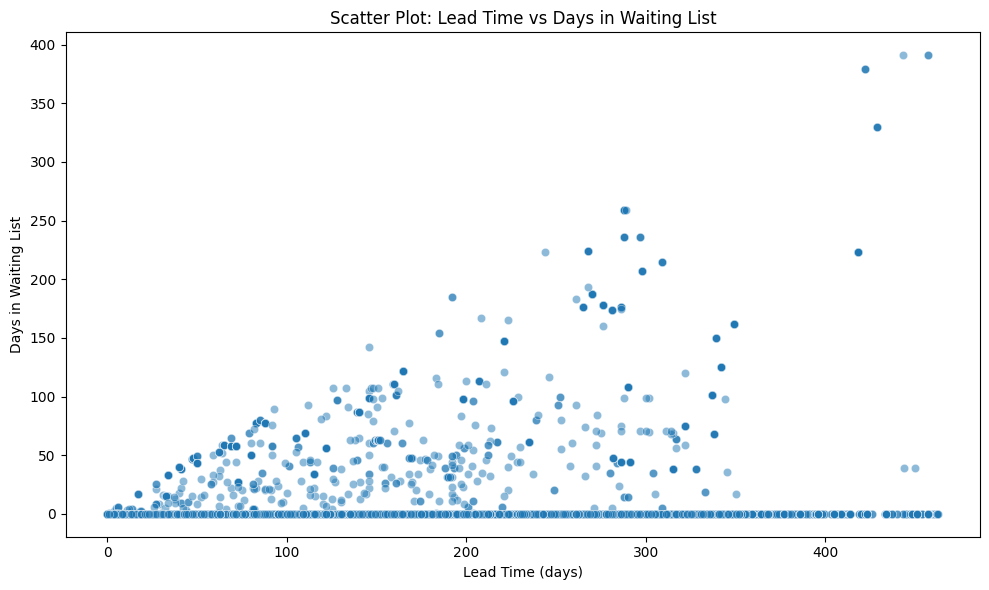

In [58]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='days_in_waiting_list', data=df, alpha=0.5)

# Mengatur judul dan label
plt.title('Scatter Plot: Lead Time vs Days in Waiting List')
plt.xlabel('Lead Time (days)')
plt.ylabel('Days in Waiting List')

# Menampilkan plot
plt.tight_layout()
plt.show()

INSIGHT:

- Berdasarkan **scatter plot**, pihak hotel lebih sering melakukan konfirmasi pesanan secara langsung (kurang dari 50 hari) setelah customer melakukan booking walaupun tanggal kedatangan untuk menginap hingga lebih dari 400 hari (terlihat pada plot days in waiting list yang sebagian besar <50 hari dengan lead time yang mencapai >400 hari). 

Hal ini perlu dievaluasi kembali oleh pihak hotel karena sebaiknya days in waiting list tidak lebih dari 1 minggu (khusunya untuk city hotel), selain itu lead time yang tinggi (lebih dari 1 bulan) memiliki potensi pembatalan yang tinggi berdasarkan analisis sebelumnya.

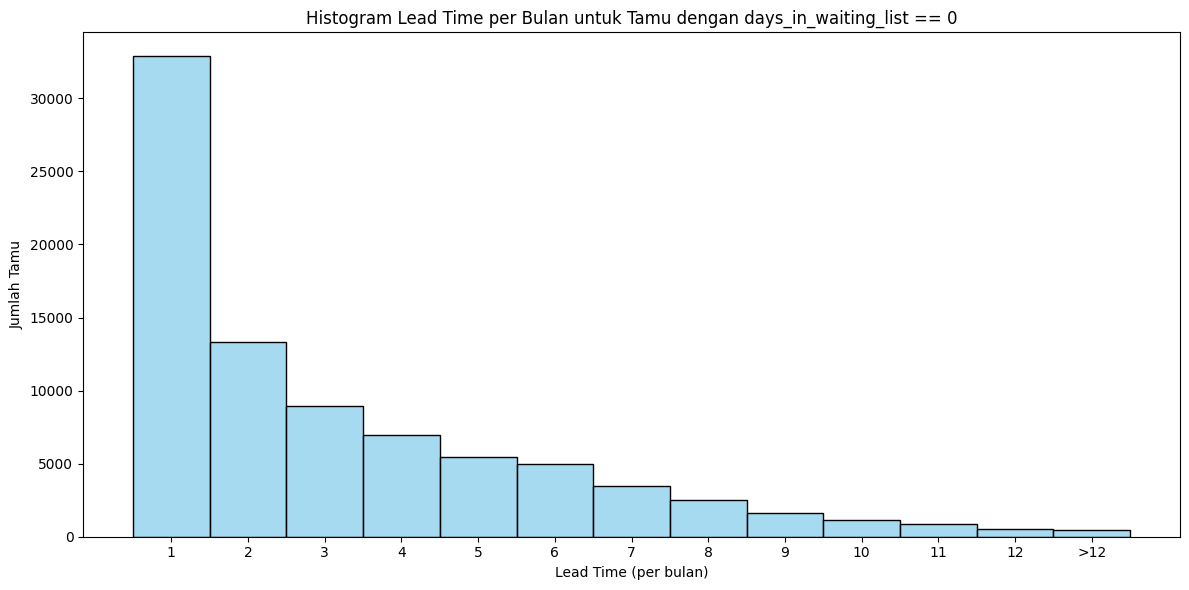

In [59]:
# Filter data untuk days_in_waiting_list == 0
filtered_df = df[df['days_in_waiting_list'] == 0]

# Membuat kategori lead time per bulan
filtered_df['lead_time_month_cat'] = np.where((filtered_df['lead_time']) < 31, '1',
                                          np.where((filtered_df['lead_time']) <= 61, '2',
                                          np.where((filtered_df['lead_time']) <= 91, '3',
                                          np.where((filtered_df['lead_time']) <= 121, '4',
                                          np.where((filtered_df['lead_time']) <= 151, '5',
                                          np.where((filtered_df['lead_time']) <= 181, '6',
                                          np.where((filtered_df['lead_time']) <= 211, '7',
                                          np.where((filtered_df['lead_time']) <= 241, '8',
                                          np.where((filtered_df['lead_time']) <= 271, '9',
                                          np.where((filtered_df['lead_time']) <= 301, '10',
                                          np.where((filtered_df['lead_time']) <= 331, '11',
                                          np.where((filtered_df['lead_time']) <= 361, '12', '>12'))))))))))))

# Define the custom order for 'lead_time_month_cat'
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>12']

# Convert the 'lead_time_month_cat' column to a categorical type with the specified order
filtered_df['lead_time_month_cat'] = pd.Categorical(filtered_df['lead_time_month_cat'], categories=order, ordered=True)

# Membuat histogram lead time per bulan
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='lead_time_month_cat', bins=13, color='skyblue')

# Mengatur judul dan label
plt.title('Histogram Lead Time per Bulan untuk Tamu dengan days_in_waiting_list == 0')
plt.xlabel('Lead Time (per bulan)')
plt.ylabel('Jumlah Tamu')

# Menampilkan plot
plt.tight_layout()
plt.show()



INSIGHT:
- Berdasarkan **histogram** dengan days in waiting list == 0 (konformasi pemesanan di hari yang sama) terlihat distribusi pesanan yang reservasinya sudah dikonfirmasi di hari yang sama, ditemukan reservasi dengan lead time bahkan lebih dari 12 bulan. Lead time yang tinggi berpotensi untuk terjadi pembatalan.

##### C.1.6. Cancellation rate by market segment


In [60]:
# Grouping data berdasarkan 'market_segment', 'hotel' dan 'is_canceled'
grouped_segment = df.groupby(['market_segment', 'is_canceled', 'hotel']).size().unstack('is_canceled')
grouped_segment

is_canceled                      0      1
market_segment hotel                     
Aviation       City Hotel      178     44
Complementary  City Hotel       19      2
               Resort Hotel     12      2
Corporate      City Hotel     1928    260
               Resort Hotel   1682    243
Direct         City Hotel     4483    882
               Resort Hotel   5245    780
Groups         City Hotel     1609    817
               Resort Hotel   1685    418
Offline TA/TO  City Hotel     5760   1210
               Resort Hotel   5532    784
Online TA      City Hotel    21869  12396
               Resort Hotel  10570   5551

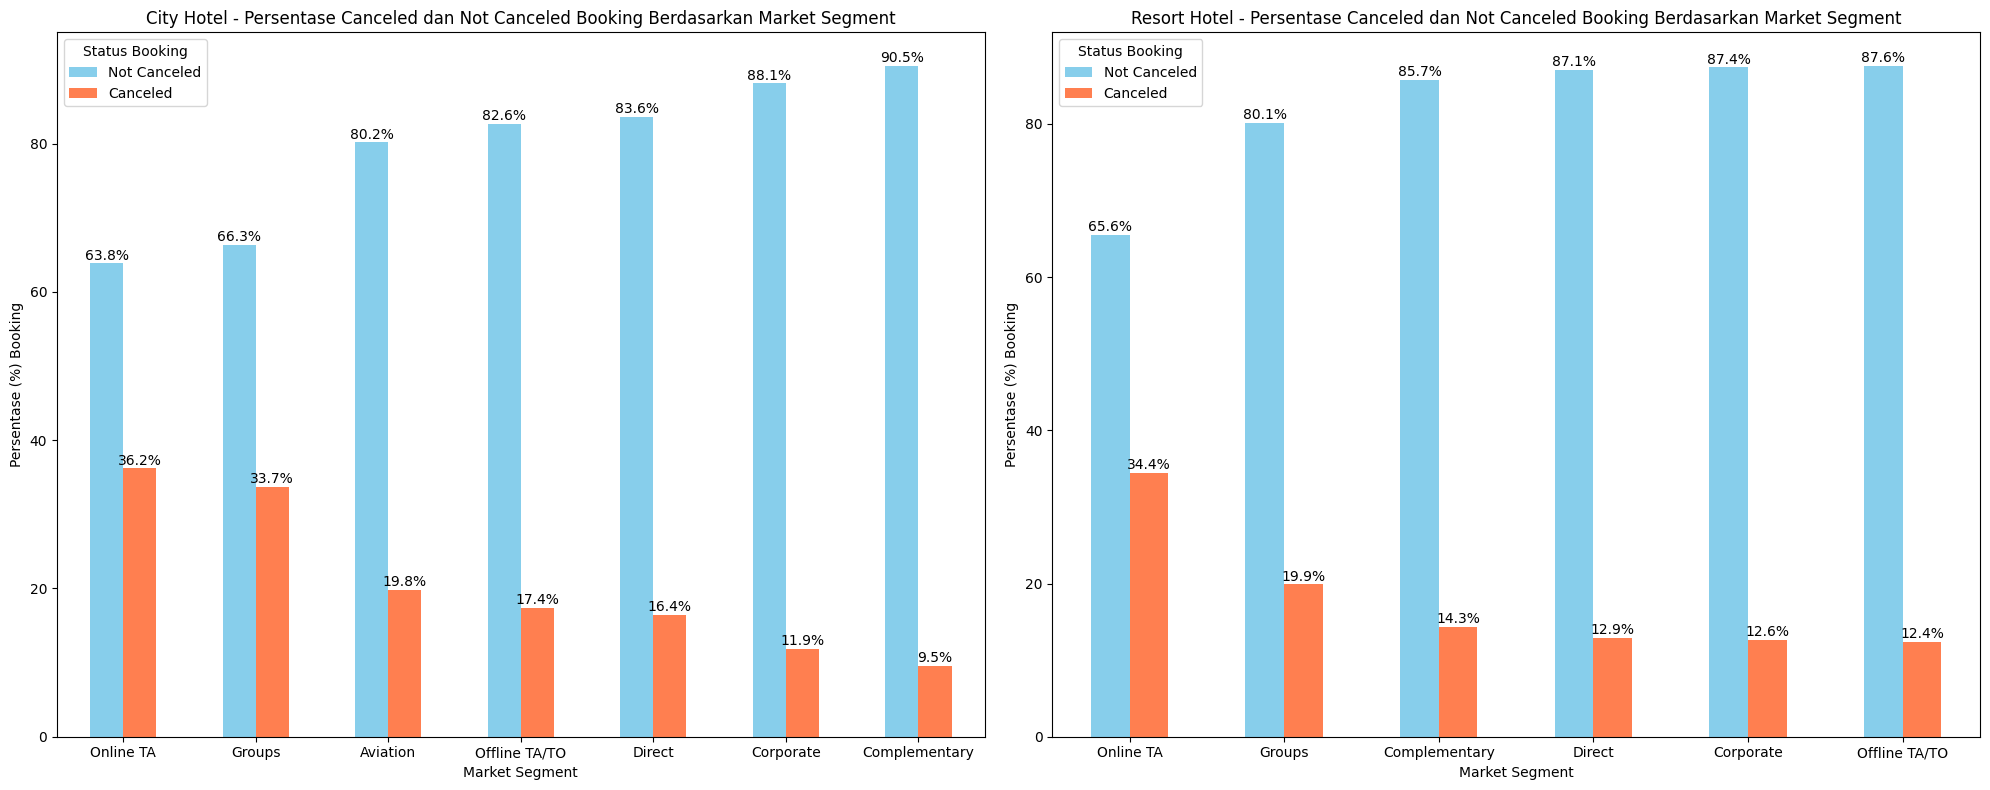

In [61]:
# Filter data berdasarkan 'City Hotel' dan 'Resort Hotel' menggunakan xs (di level baris)
city_segment = grouped_segment.xs('City Hotel', level='hotel')
resort_segment = grouped_segment.xs('Resort Hotel', level='hotel')

# Persentase 'City Hotel' dan 'Resort Hotel'
grouped_segment_city_percentage = city_segment.div(city_segment.sum(axis=1), axis=0) * 100
grouped_segment_resort_percentage = resort_segment.div(resort_segment.sum(axis=1), axis=0) * 100

# Mengurutkan data berdasarkan persentase Canceled
sorted_city_segment = grouped_segment_city_percentage.sort_values(by=1, ascending=False)  # 1 adalah kolom untuk 'Canceled'
sorted_resort_segment = grouped_segment_resort_percentage.sort_values(by=1, ascending=False)  # 1 adalah kolom untuk 'Canceled'

# Visualisasi untuk 'City Hotel' dan 'Resort Hotel'
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot City Hotel
sorted_city_segment.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking')
ax[0].set_xlabel('Market Segment')
ax[0].set_title('City Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Market Segment')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)  # Set label x axis menjadi horizontal

# Label untuk City Hotel
for p in ax[0].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Plot Resort Hotel
sorted_resort_segment.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking')
ax[1].set_xlabel('Market Segment')
ax[1].set_title('Resort Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Market Segment')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)  # Set label x axis menjadi horizontal

# Label untuk Resort Hotel
for p in ax[1].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[1].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Legend
for a in ax:
    a.legend(['Not Canceled', 'Canceled'], title='Status Booking')

plt.tight_layout()
plt.show()

**Insights:**
- Online TA (Travel Agents) adalah market segment dengan persentase canceled booking tertinggi baik pada City Hotel (36.2%) dan Resort Hotel (34.2%). Artinya, **market segment Online TA lebih sering melakukan pembatalan booking** dibandingkan market segment lainnya **pada kedua tipe hotel**.
- Complementary adalah market segment dengan persentase canceled booking terendah pada City Hotel (9.5%). Artinya, **market segment Complementary lebih jarang melakukan pembatalan booking** dibandingkan market segment lainnya **pada City Hotel**.
- Offline TA (Travel Agents)/TO (Tour Operators) adalah market segment dengan persentase canceled booking terendah pada Resort Hotel (12.1%). Artinya, **market segment Offline TA/TO lebih jarang melakukan pembatalan booking** dibandingkan market segment lainnya **pada Resort Hotel**.

##### C.1.7. Cancellation rate by customer type

In [62]:
# Grouping data by 'customer_type, 'hotel', and 'is_canceled'
grouped_custype = df.groupby(['customer_type', 'is_canceled', 'hotel']).size().unstack('is_canceled')
grouped_custype

is_canceled                       0      1
customer_type   hotel                     
Contract        City Hotel     1086    367
                Resort Hotel   1508    143
Group           City Hotel      233     24
                Resort Hotel    232     13
Transient       City Hotel    29019  14106
                Resort Hotel  19178   7044
Transient-Party City Hotel     5508   1114
                Resort Hotel   3808    578

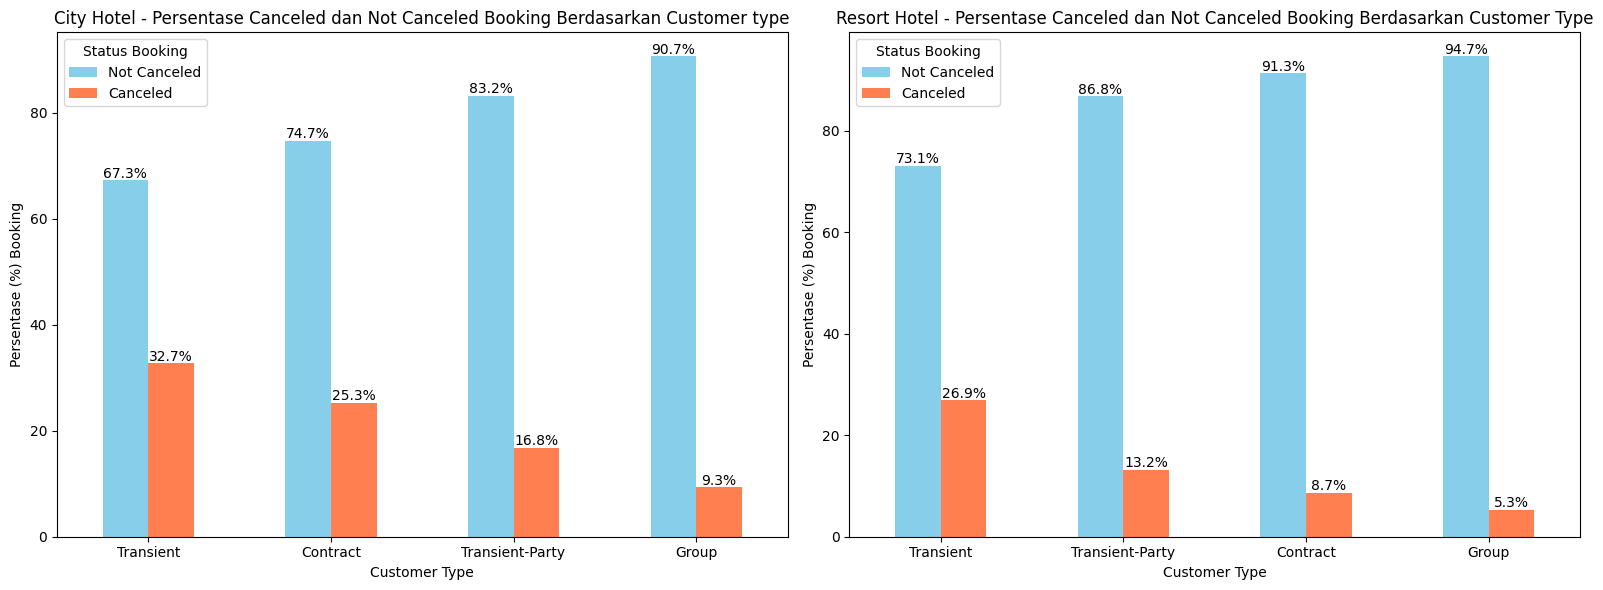

In [63]:
# Filter data berdasarkan 'City Hotel' dan 'Resort Hotel' menggunakan xs (di level baris)
city_custype = grouped_custype.xs('City Hotel', level='hotel')
resort_custype = grouped_custype.xs('Resort Hotel', level='hotel')

# Persentase 'City Hotel' & 'Resort Hotel'
grouped_custype_city_percentage = city_custype.div(city_custype.sum(axis=1), axis=0) * 100
grouped_custype_resort_percentage = resort_custype.div(resort_custype.sum(axis=1), axis=0) * 100

# Mengurutkan data berdasarkan persentase Canceled
sorted_city_custype = grouped_custype_city_percentage.sort_values(by=1, ascending=False)  # 1 adalah kolom untuk 'Canceled'
sorted_resort_custype = grouped_custype_resort_percentage.sort_values(by=1, ascending=False)  # 1 adalah kolom untuk 'Canceled'

# Visualisasi 'City Hotel' dan 'Resort Hotel'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot City Hotel
sorted_city_custype.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking')
ax[0].set_xlabel('Customer Type')
ax[0].set_title('City Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Customer type')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)  # Set label x axis menjadi horizontal

# Label City Hotel
for p in ax[0].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Plot Resort Hotel
sorted_resort_custype.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking')
ax[1].set_xlabel('Customer Type')
ax[1].set_title('Resort Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Customer Type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)  # Set label x axis menjadi horizontal

# Label Resort Hotel
for p in ax[1].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[1].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Legend
for a in ax:
    a.legend(['Not Canceled', 'Canceled'], title='Status Booking')

plt.tight_layout()
plt.show()

**Insights:**
- Transient adalah Customer Type dengan persentase canceled booking tertinggi baik pada City Hotel (32.7%) dan Resort Hotel (26.3%). Artinya, **Customer Transient lebih sering melakukan pembatalan booking** dibandingkan tipe customer lainnya **pada kedua tipe hotel**.
- Group adalah Customer Type dengan persentase canceled booking terendah pada City Hotel (9.2%) dan Resort Hotel (5.2%). Artinya, **Customer Group lebih jarang melakukan pembatalan booking** dibandingkan tipe customer lainnya **pada kedua tipe hotel**.

##### C.1.8. Cancellation rate by is repeated guest

Pada analisa ini kita akan mencoba untuk melihat hubungan antara repeated / not repeated guest dengan pembatalan booking.

In [64]:
# prompt: berapa jumlah tamu yang merupakan repeated guest dan tidak

repeated_guest_counts = df['is_repeated_guest'].value_counts()

print(repeated_guest_counts)


is_repeated_guest
No     80711
Yes     3250
Name: count, dtype: int64


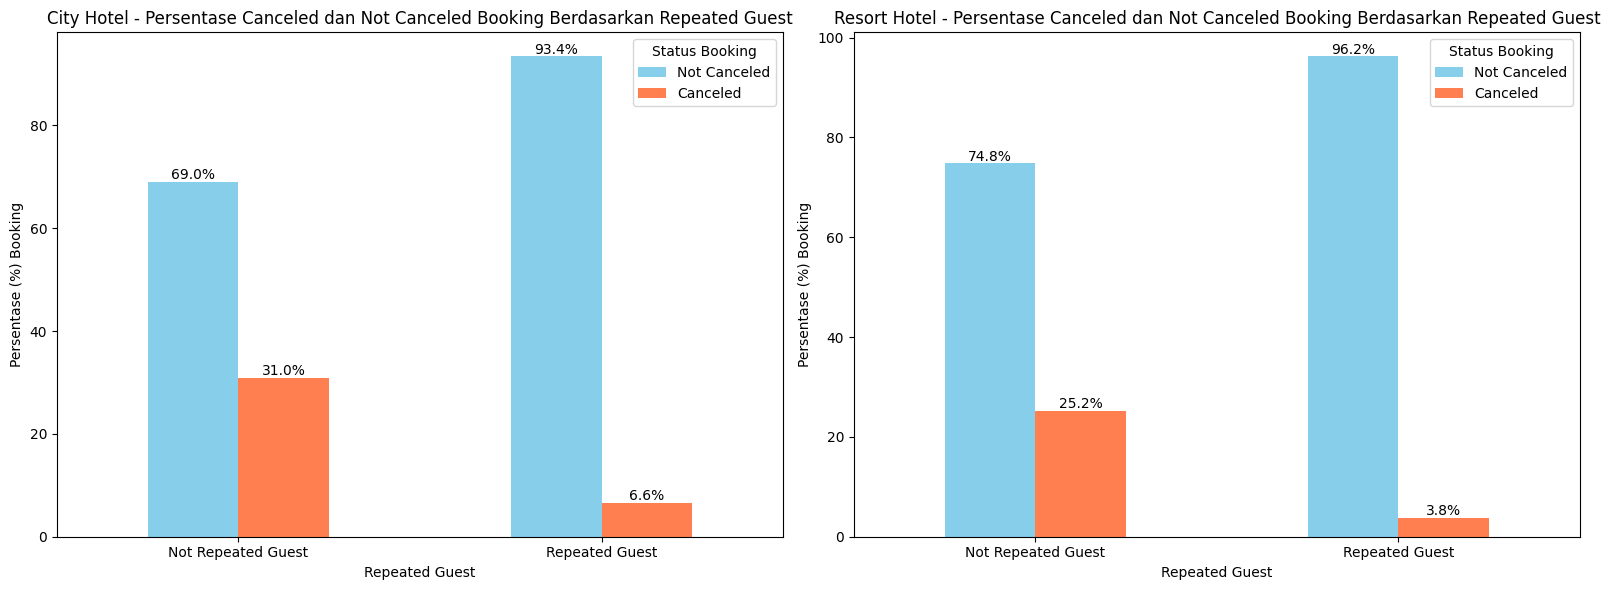

In [65]:

# Grouping data by 'hotel', 'is_repeated_guest', and 'is_canceled'
grouped_repeated_guest = df.groupby(['hotel', 'is_repeated_guest', 'is_canceled']).size().unstack('is_canceled')

# Filter data for City Hotel and Resort Hotel
city_repeated_guest = grouped_repeated_guest.xs('City Hotel', level='hotel')
resort_repeated_guest = grouped_repeated_guest.xs('Resort Hotel', level='hotel')

# Calculate percentages for City Hotel and Resort Hotel
city_repeated_guest_percentage = city_repeated_guest.div(city_repeated_guest.sum(axis=1), axis=0) * 100
resort_repeated_guest_percentage = resort_repeated_guest.div(resort_repeated_guest.sum(axis=1), axis=0) * 100

# Visualize the data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot City Hotel
city_repeated_guest_percentage.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[0])
ax[0].set_ylabel('Persentase (%) Booking')
ax[0].set_xlabel('Repeated Guest')
ax[0].set_title('City Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Repeated Guest')
ax[0].set_xticklabels(['Not Repeated Guest', 'Repeated Guest'], rotation=0)

# Label City Hotel
for p in ax[0].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Plot Resort Hotel
resort_repeated_guest_percentage.plot(kind='bar', color=['skyblue', 'coral'], ax=ax[1])
ax[1].set_ylabel('Persentase (%) Booking')
ax[1].set_xlabel('Repeated Guest')
ax[1].set_title('Resort Hotel - Persentase Canceled dan Not Canceled Booking Berdasarkan Repeated Guest')
ax[1].set_xticklabels(['Not Repeated Guest', 'Repeated Guest'], rotation=0)

# Label Resort Hotel
for p in ax[1].patches:
    height = p.get_height()
    if height > 0:  # Hanya menambahkan label pada bar yang tidak kosong
        ax[1].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha='center')

# Legend
for a in ax:
    a.legend(['Not Canceled', 'Canceled'], title='Status Booking')

plt.tight_layout()
plt.show()


**Insights:**
- **Pembatalan booking lebih sering dilakukan oleh not repeated guest**, terlihat dari tingginya persentase pembatalan booking pada city hotel sebesar 31% dan resort hotel sebesar 25% berasal dari not repeated guest.

- Secara keseluruhan, **pembatalan booking lebih sering terjadi pada city hotel**, baik dari not repeated guest (31%) dan repeated guest (6.6%).

#### **C.2 Customer Behavior**

Customer behavior analysis adalah analisa untuk mengetahui karakteristik dari tamu yang melakukan booking berdasarkan informasi demografis maupun pemilihan service hotel di city maupun resort hotel.
1. Analisa Demografi
2. Tipe Kamar Paling Populer
3. Preferensi Layanan Makan

##### C.2.1. Analisa Demografi

**Jumlah Tamu Hotel Berdasarkan Negara**

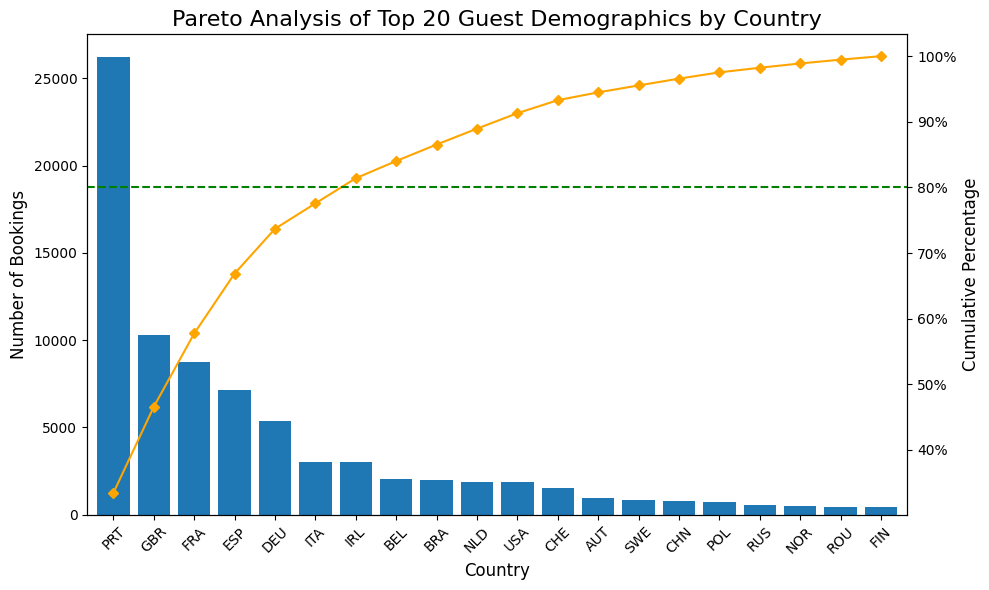

In [66]:
# 1. Menghitung jumlah tamu per negara
country_distribution = df['country'].value_counts()

# 2. Mengambil 10 negara terbanyak
top_20_countries = country_distribution.head(20)

# 3. Menghitung persentase kumulatif untuk Pareto (20 negara terbanyak)
country_distribution_sorted = top_20_countries.sort_values(ascending=False)
country_distribution_cumsum = country_distribution_sorted.cumsum()
total_bookings_top_20 = country_distribution_sorted.sum()
country_distribution_cum_percentage = 100 * country_distribution_cumsum / total_bookings_top_20

# 4. Plotting Pareto chart untuk 20 negara terbanyak
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart (jumlah tamu per negara)
country_distribution_sorted.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Pareto Analysis of Top 20 Guest Demographics by Country', fontsize=16)
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Number of Bookings', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis to plot the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(country_distribution_cum_percentage, color='orange',marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Add Pareto threshold line (80% cumulative percentage)
ax2.axhline(80, color='green', linestyle='--')
plt.tight_layout()
plt.show()

INSIGHT:
- Grafik di atas menunjukan 20 negara dengan jumlah tamu yang melakukan booking hotel paling banyak. Dari grafik tersebut, dapat diketahui bahwa **80% tamu hotel terakumulasi dari 7 negara yaitu Portugal (PRT), Inggris (GBR), Prancis (FRA), Spanyol (ESP), Jerman (DEU), Italia (ITA), dan Irlandia (IRL)**.
- Sedangkan 20% sisanya disumbangkan dari akumulasi tamu yang datang dari 170 negara lainya.

**Jumlah Tamu Berdasarkan Kategori Usia**

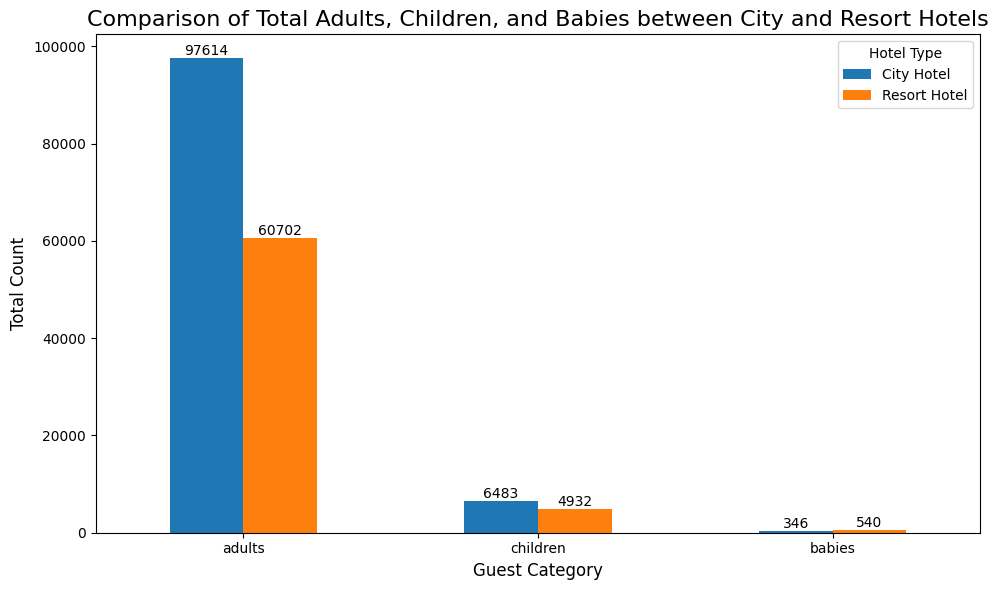

In [67]:
# Memisahkan data berdasarkan tipe hotel dan menjumlahkan total adults, children, dan babies
city_hotel_totals = df[df['hotel'] == 'City Hotel'][['adults', 'children', 'babies']].sum()
resort_hotel_totals = df[df['hotel'] == 'Resort Hotel'][['adults', 'children', 'babies']].sum()

# Membuat dataframe baru untuk perbandingan
totals_comparison = pd.DataFrame({
    'City Hotel': city_hotel_totals,
    'Resort Hotel': resort_hotel_totals
})

# Membuat visualisasi perbandingan menggunakan bar chart
ax = totals_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Total Adults, Children, and Babies between City and Resort Hotels', fontsize=16)
plt.xlabel('Guest Category', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Hotel Type')

# Menambahkan label
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

INSIGHT:

- Berdasarkan grafik diatas jenis tamu berdasarkan usia tersebar dengan pola yang hampir sama di kedua hotel (city maupun resort hotel), yaitu **orang dewasa yang paling banyak, disusul dengan anak-anak, kemudian bayi**.
- Untuk Resort Hotel, terdapat orang dewasa yang lebih banyak membawa bayi (sebanyak 554 orang) dibandingkan dengan City Hotel.

In [68]:
# Membuat dataframe baru untuk menyatukan hasil total adults, children, dan babies dari kedua hotel
totals_comparison = pd.DataFrame({
    'Category': ['Adults', 'Children', 'Babies'],
    'City Hotel': city_hotel_totals.values,
    'Resort Hotel': resort_hotel_totals.values
})

totals_comparison

,Category,City Hotel,Resort Hotel
0,Adults,97614.0,60702.0
1,Children,6483.0,4932.0
2,Babies,346.0,540.0


##### C.2.2. Tipe Kamar Paling Populer

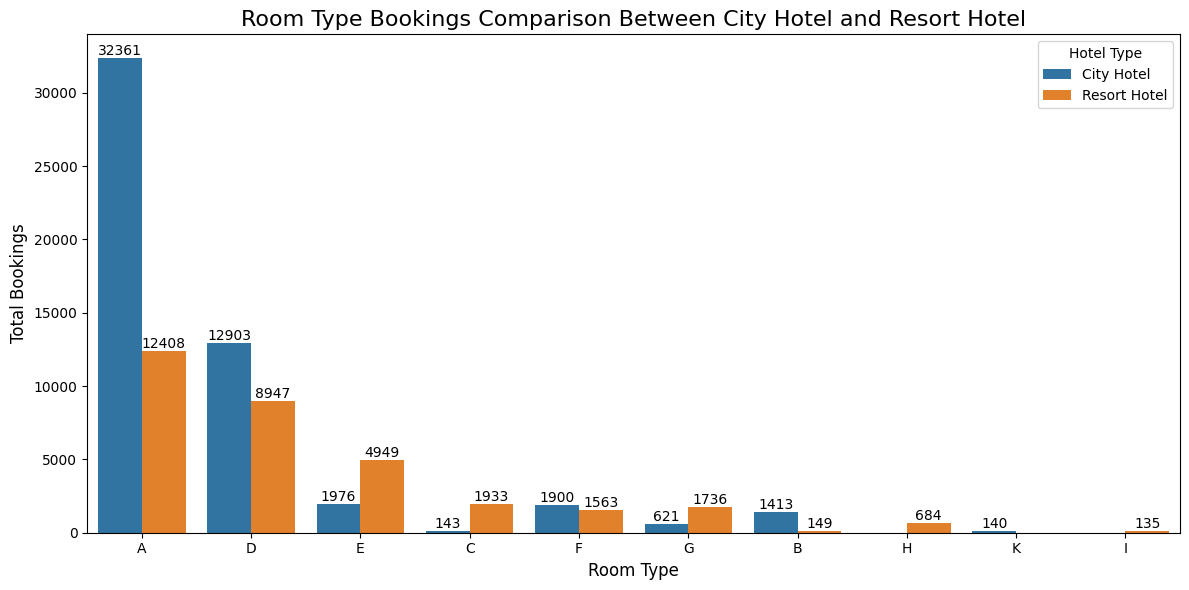

In [69]:
# Mengelompokkan data berdasarkan hotel dan tipe ruangan, serta mengurutkan berdasarkan total_bookings
room_type_counts = df.groupby(['hotel', 'assigned_room_type']).size().reset_index(name='total_bookings')

# Mengurutkan data berdasarkan total_bookings dari terbesar ke terkecil
room_type_counts = room_type_counts.sort_values('total_bookings', ascending=False)

# Membuat visualisasi perbandingan tipe ruangan yang dipesan berdasarkan hotel
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='assigned_room_type', y='total_bookings', hue='hotel', data=room_type_counts)

# Menambahkan label di setiap bar
for container in ax.containers:
    ax.bar_label(container)

# Menambahkan judul dan label
plt.title('Room Type Bookings Comparison Between City Hotel and Resort Hotel', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Total Bookings', fontsize=12)
plt.legend(title='Hotel Type')

plt.tight_layout()
plt.show()


INSIGHT:
- Top 5 tipe kamar yang paling diminati pada city hotel adalah room A, D, E, F, dan B.
- Top 5 tipe kamar yang paling diminati pada resort hotel adalah room A, D, E, C, dan G.
- Top 5 tipe kamar yang paling tidak diminati pada city hotel adalah room L, I, H, P, dan C.
- Top 5 tipe kamar yang paling tidak diminati pada resort hotel adalah K, L, P, B, dan I.



##### C.2.3 Meal Preferences

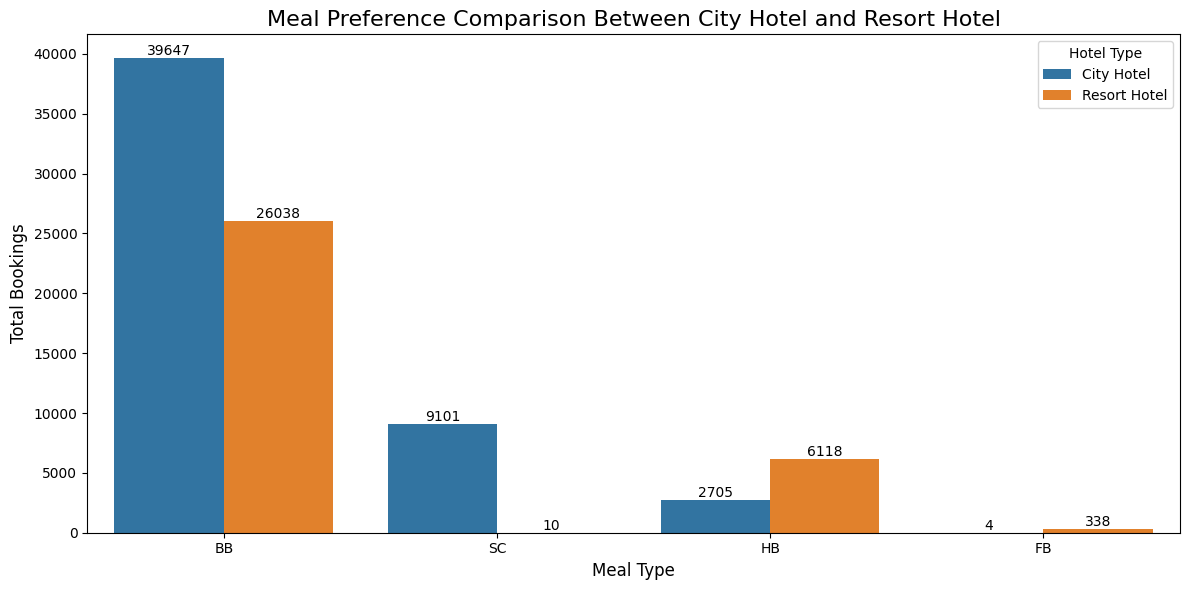

In [70]:
# Mengelompokkan data berdasarkan hotel dan meal, serta mengurutkan berdasarkan total_bookings
meal_preference_counts = df.groupby(['hotel', 'meal']).size().reset_index(name='total_bookings')

# Mengurutkan data berdasarkan total_bookings dari terbesar ke terkecil
meal_preference_counts = meal_preference_counts.sort_values('total_bookings', ascending=False)

# Membuat visualisasi perbandingan preferensi makanan berdasarkan hotel
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='meal', y='total_bookings', hue='hotel', data=meal_preference_counts)

# Menambahkan label di setiap bar
for container in ax.containers:
    ax.bar_label(container)

# Menambahkan judul dan label
plt.title('Meal Preference Comparison Between City Hotel and Resort Hotel', fontsize=16)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Total Bookings', fontsize=12)
plt.legend(title='Hotel Type')

# Menampilkan plot
plt.tight_layout()
plt.show()


INSIGHT:

- Bed and Breakfast (BB) menjadi pilihan mayoritas para tamu ketika menginap di hotel baik di City Hotel maupun Resort Hotel.
- Full Board (FB) adalah jenis meal yang paling tidak diminati pada city hotel.
- SC (no meal package) adalah jenis meal yang paling tidak diminati pada resort hotel.

#### **C.3 Data Timeseries untuk Tren Pemesanan, Pembatalan Pesan, serta Analisis Opportunity Cost.**

1. Booking trends over time: Analisis tren volume pemesanan dan tingkat pembatalan di setiap bulan dari tahun ke tahun.
2. Cancellation rate trends over time: Analisis tren pembatalan booking di setiap bulan dari tahun ke tahun.
3. Opportunity cost bedasarkan ADR: opportunity cost dihitung berasal dari ADR customer yang melakukan pembatalan booking dengan metode refundable.


##### C.3.1. Data Timeseries untuk Tren Pemesanan dan Pembatalan Pesan

In [71]:
# Extract year and month from arrival_date
df['arrival_year'] = pd.to_datetime(df['arrival_date']).dt.year
df['arrival_month'] = pd.to_datetime(df['arrival_date']).dt.month

# Group by year and month to analyze booking volume
booking_volume = df.groupby(['arrival_year', 'arrival_month']).size().reset_index(name='total_bookings')

# Group by year and month to analyze cancellation rates
cancellation_rates = df.groupby(['arrival_year', 'arrival_month'])['is_canceled'].mean().reset_index(name='cancellation_rate')


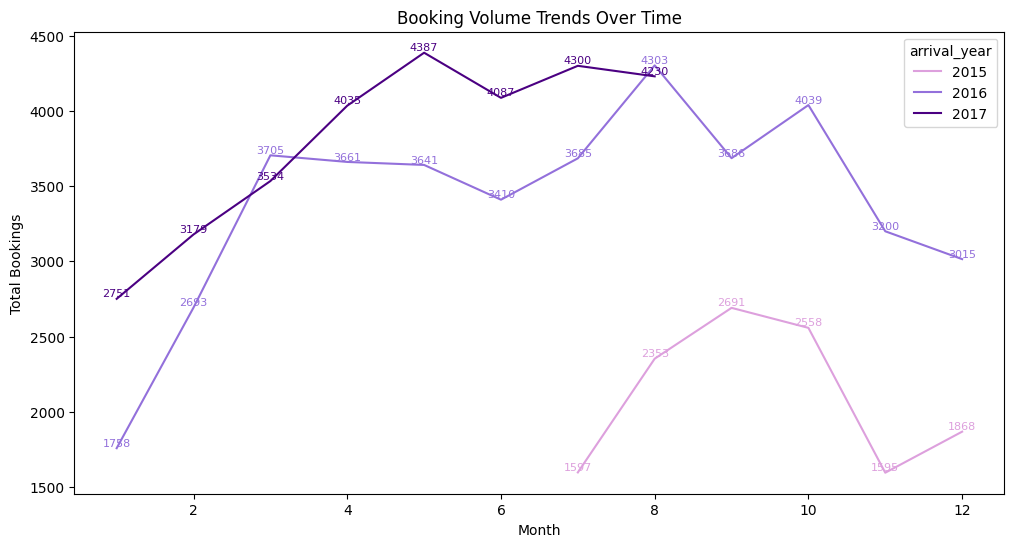

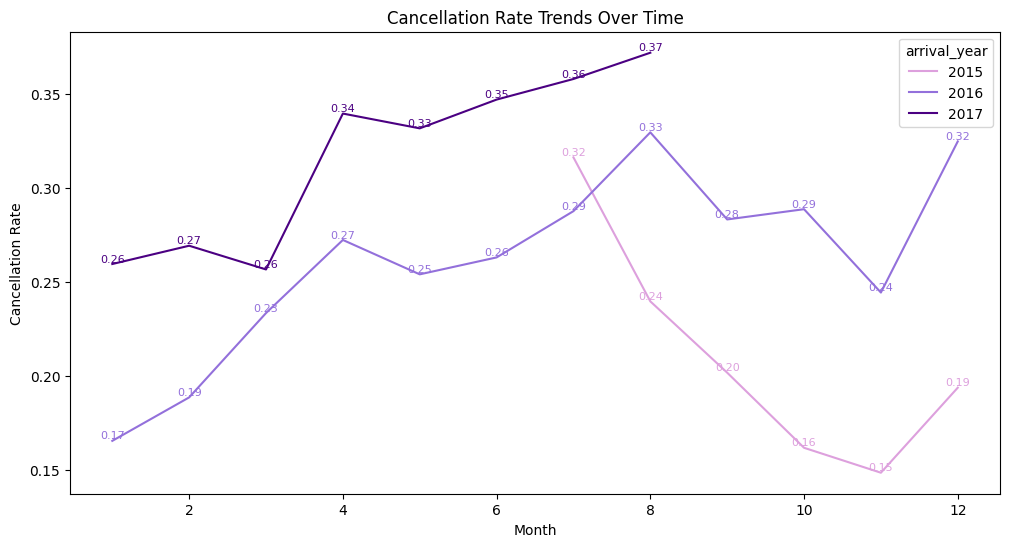

In [72]:
# Define a custom palette with different shades of purple
custom_palette = {
    2015: '#DDA0DD',  # Light purple
    2016: '#9370DB',  # Medium purple
    2017: '#4B0082'   # Dark purple
}

# Visualize booking volume trends with labels and custom purple shades
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='arrival_month', y='total_bookings', hue='arrival_year', data=booking_volume, palette=custom_palette)
plt.title('Booking Volume Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Bookings')

# Adding labels to the booking volume plot
for line in ax1.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax1.text(x, y, f'{int(y)}', color=line.get_color(), ha='center', va='bottom', fontsize=8)

plt.show()

# Visualize cancellation rate trends with labels and custom purple shades
plt.figure(figsize=(12, 6))
ax2 = sns.lineplot(x='arrival_month', y='cancellation_rate', hue='arrival_year', data=cancellation_rates, palette=custom_palette)
plt.title('Cancellation Rate Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')

# Adding labels to the cancellation rate plot
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.text(x, y, f'{y:.2f}', color=line.get_color(), ha='center', va='bottom', fontsize=8)

plt.show()


**Insights:**
- Tahun 2016 memiliki volume pemesanan tertinggi secara keseluruhan, terutama pada bulan April hingga Juni, yang menunjukkan permintaan yang kuat selama pertengahan tahun.
- Tahun 2017 mengikuti tren serupa namun dengan pemesanan yang lebih sedikit dibandingkan tahun 2016.
- Tahun 2015 hotel memiliki tren booking yang lebih buruk dibandingkan tahun-tahun lainnya, dengan volume pemesanan yang jauh lebih rendah dan tidak ada puncak yang berkelanjutan sepanjang tahun.
- **Tren pembatalan booking secara keseluruhan lebih sering terjadi pada bulan ke-4 s/d bulan ke-8 (April-Agustus), dan bulan ke 12 (Desember)**. Artinya, guest lebih sering melakukan pembatalan booking pada bulan-bulan tersebut.

##### C.3.2 Opportunity Cost

In [73]:
# Filter data customer yang membatalkan pemesanan dan mendapatkan refund
adrlost = df[(df['deposit_type'] == 'Refundable') & (df['is_canceled'] == 1)]

# Persentase dari ADR lost
percentadrlost = adrlost['adr'].sum()/df['adr'].sum()*100
percentadrlost

0.03214898563196849

In [74]:
countadrlost = adrlost['adr'].sum()
countadrlost

2935.95

INSIGHT

- Opportunity cost (potensi keuntungan yang hilang) secara keseluruhan untuk kedua tipe hotel adalah sebesar 2935.95 EUR atau 3.18% dari total pendapatan dari adr(average daily rate). Artinya, **Hotel kehilangan adr sebesar 3.18% akibat adanya pembatalan booking**.

#### **Recommendation**

Berdasarkan analisis data yang telah dilakukan mengenai cancellation rate, pihak hotel dapat **memfokuskan target pemasaran** pada customer dengan persentase canceled booking rendah dan **menargetkan kebijakan pembatalan** pada customer dengan persentase canceled booking tinggi, sehingga dapat mencegah opportunity cost sebesar 3.18%.

**1.	Target pemasaran fokus pada kriteria dengan cancellation rate rendah, yaitu:**
-	Resort hotel, khususnya dengan market segment Offline TA/TO, tipe customer group, dan repeated guest.
-	Jika ingin meningkatkan pemasaran pada city hotel juga, sebaiknya fokus pada market segment complementary, tipe customer group, dan repeated guest.
-	Lead time (lama jarak customer melakukan reservasi hingga sampai menginap di hotel) yang rendah (< 1 bulan) karena semakin singkat lead time maka semakin kecil potensi pembatalan reservasi.
-	Opsi pembayaran refundable dapat ditawarkan untuk meningkatkan jumlah booking hotel dan menarik lebih banyak customer yang sesuai target pemasaran (cenderung tidak melakukan pembatalan booking).

**2.	Kebijakan pembatalan fokus pada kriteria dengan cancellation rate rendah tinggi, yaitu:**
-	City Hotel dan Resort Hotel, khususnya pada market segment Online TA, tipe customer transient, dan not repeated guest. Jika ingin dilakukan secara bertahap, kebijakan pembatalan dapat diaplikasikan pada city hotel terlebih dahulu karena city hotel memiliki persentase canceled booking lebih tinggi dibandingkan resort hotel.
-	Lead time (lama jarak customer melakukan reservasi hingga sampai menginap di hotel) yang rendah (> 1 bulan) karena semakin lama lead time maka semakin tinggi potensi pembatalan reservasi.
-	Kebijakan pembatalan dapat berupa pembayaran non-refundable. Pemberlakukan deposit adalah metode pembayaran yang kurang efektif karena cancellation ratenya juga masih tinggi sektiar 26.7%.
- Kebijakan pembatalan dapat fokus dilakukan pada bulan ke-4 s/d bulan ke-8 (April-Agustus), dan bulan ke 12 (Desember). Pada bulan-bulan tersebut guest lebih sering melakukan pembatalan booking.

**3.	Pihak hotel dapat melakukan peningkatan layanan hotel sesuai dengan preferensi dan kondisi demografi customer, seperti:**
-	Sebanyak 80% tamu hotel terakumulasi dari 7 negara yaitu Portugal (PRT), Inggris (GBR), Prancis (FRA), Spanyol (ESP), Jerman (DEU), Italia (ITA), dan Irlandia (IRL). Pemasaran digital dapat difokuskan pada 7 negara tersebut dan pihak hotel dapat melatih staf untuk layanan multibahasa..
-	Peningkatan jumlah layanan BB (Bed and Breakfast) baik di city hotel maupun di resort hotel, karena layanan tersebut paling diminati oleh customer. Pengurangan jumlah layanan/penghapusan pilihan FB (full board) pada city hotel dan SC (no meal package) pada resort hotel
-	Adults adalah kelompok usia terbanyak baik di city maupun resort hotel. Pihak hotel menyediakan fasilitas yang dapat meningkatkan pengalaman kelompok usia adults, seperti ruang pertemuan, fitness center, spa, dan lounge.
-	Children di City Hotel lebih banyak dibandingkan di Resort Hotel. Pihak hotel sebaiknya menambah fasilitas khusus untuk anak-anak, seperti area bermain, kolam renang anak, dan taman hiburan mini.
-	Babies di Resort Hotel lebih banyak dibandingkan di City Hotel. Pihak hotel sebaiknya menambah fasilitas khusus untuk bayi, seperti layanan pijat bayi dan pilihan menu makanan bayi pada catering yang disediakan.
- Penambahan kuota room A, D, E, F, dan B (kamar yang paling diminati) dan pengurangan/penghapusan kuota room L, I, H, P, dan C (kamar yang paling tidak diminati) pada city hotel.
- Penambahan kuota room A, D, E, C, dan G (kamar yang paling diminati) dan pengurangan/penghapusan kuota room K, L, P, B, dan I pada resort hotel.
-	Untuk mencegah pembatalan booking, pihak hotel melakukan konfirmasi pemesanan hotel di hari yang sama ketika customer melakukan reservasi untuk customer yang memiliki jangka lead time (waktu hingga stay di hotel) yang tinggi/lama.


## **BAB 3: Machine Learning (Pembuatan Model Prediksi)**

In [75]:
mainData = df.copy()
mainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83961 entries, 2 to 86061
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83961 non-null  object        
 1   is_canceled                     83961 non-null  int64         
 2   lead_time                       83961 non-null  int64         
 3   stays_in_weekend_nights         83961 non-null  int64         
 4   stays_in_week_nights            83961 non-null  int64         
 5   adults                          83961 non-null  int64         
 6   children                        83961 non-null  float64       
 7   babies                          83961 non-null  int64         
 8   meal                            83961 non-null  object        
 9   country                         83961 non-null  object        
 10  market_segment                  83961 non-null  object        
 11  distrib

In [76]:
# mainData.to_excel('mainData_full.xlsx', index=False)

### **A. Feature Selection**



#### **A.1. Fitur Numerik**

Sebelum menghapus kolom yang tidak terpakai, perlu ditentukan fitur mana yang memiliki/tidak memiliki hubungan dengan target (is_canceled).

- Proses ini dilakukan untuk membuang variabel/fitur numerik yang secara domain knowledge tidak berhubungan dengan target (is_canceled), ada/tidaknya hubungan setiap fitur numerik dengan target juga akan ditentukan berdasarkan uji korelasi.
- Setelah melakukan uji korelasi, akan dilanjutkan dengan uji VIF (Variance Inflation Factor) / uji multikolinearitas. Fitur dengan VIF >10 akan dibuang karena menunjukkan multikolinearitas yang tinggi, artinya fitur mempunyai nama berbeda tetapi memiliki interpretasi yang sama, ini bisa mengakibatkan redundansi.

Beberapa fitur berikut dapat langsung dibuang tanpa uji korelasi:
- **`adults`, `babies`, `children`** : masing-masing fitur menggambarkan jumlah pelanggan dewasa, bayi, dan anak secara berurut. Pada tahap _data adjustment_ telah dilakukan penyesuaian dengan membuat fitur bernama `total_cust` (penjumlahan value ketiga fitur), sehingga fitur `adults`, `babies`, `children` tidak diperlukan lagi dalam pembuatan model ML.
- **`lead_time_month`** : fitur ini menggambarkan 'lead_time' per bulan yang hanya dipakai dalam EDA, sehingga fitur akan dihapus untuk tahapan pembuatan model ML.
-  **`arrival_year`, dan `arrival_month`** : kedua fitur tersebut menggambarkan tahun dan bulan pelanggan datang ke hotel. Kedua fitur tersebut tidak dipakai dalam pembuatan model ML, karena pada tahap _data adjustment_ telah dibentuk fitur baru bernama `arrival_date` (yang menggabungkan dua fitur tersebut) dan fitur `arrival_day_in_month`(fitur dengan value berformat tanggal, bulan, dan tahun).

**Fitur yang lainnya akan disimpan sebagai variabel `mainData_num` dengan fitur numerikal seperti berikut:**


In [77]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mainData_num = mainData.select_dtypes(include=numerics).drop(['adults', 'children', 'babies', 'lead_time_month', 'arrival_year', 'arrival_month','total_fee', 'total_nights'], axis=1)

mainData_num

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_cust
2,0,7,0,1,0,0,0,0,75.00,0,0,1.0
3,0,13,0,1,0,0,0,0,75.00,0,0,1.0
4,0,14,0,2,0,0,0,0,98.00,0,1,2.0
5,0,0,0,2,0,0,0,0,107.00,0,0,2.0
6,0,9,0,2,0,0,0,0,103.00,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86057,0,23,2,5,0,0,0,0,96.14,0,0,2.0
86058,0,102,2,5,0,0,0,0,225.43,0,2,3.0
86059,0,34,2,5,0,0,0,0,157.71,0,4,2.0
86060,0,109,2,5,0,0,0,0,104.40,0,0,2.0


Selanjutnya untuk tes korelasi kita menggunakan heatmap berdasarkan tes korelasi menggunakan metode _spearman_. Metode ini digunakan untuk menguji korelasi antar satu fitur dengan fitur lainnya pada data yang memiliki distribusi tidak imbang.

Text(0.5, 1.0, 'Heatmap Correlation')

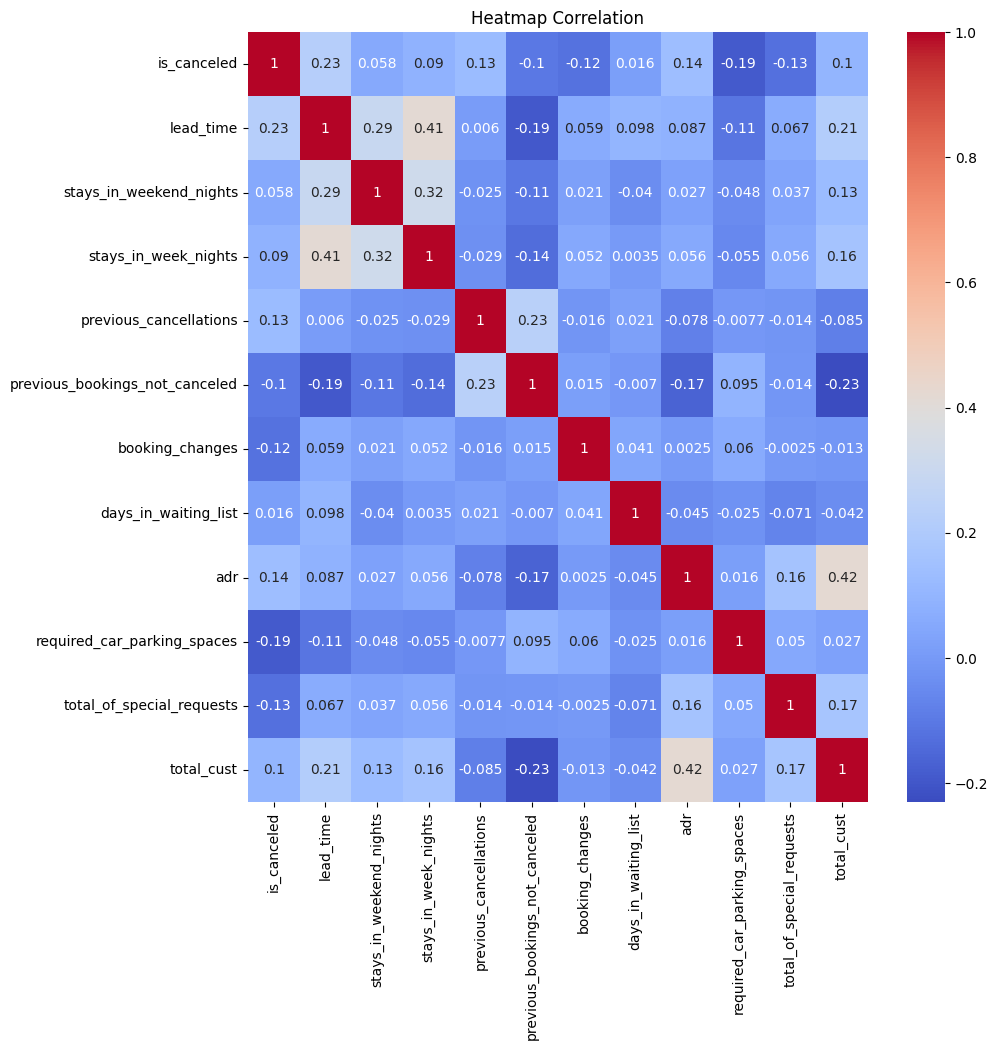

In [78]:
# Feature Selection (Numerical) Correlation Test

plt.figure(figsize=(10,10))
sns.heatmap(mainData_num.corr('spearman'), annot=True, cmap='coolwarm')
plt.title ('Heatmap Correlation')

Berdasarkan tes korelasi, berikut fitur-fitur yang berkorelasi dengan fitur target `is_canceled` yang diurutkan berdasarkan tingkat korelasinya:


| no | fitur | tingkat korelasi|
|----|-------|--------------------------
| 1. | `lead_time` | 0.23
| 2. |`required_car_parking_space` | 0.19
| 3. |`adr` | 0.14
| 4. |`previous_cancellations` | 0.13
| 5. |`total_of_special_request` | 0.13
| 6. |`booking changes` | 0.12
| 7. |`total_cust` | 0.1
| 8. |`previous_booking_not_cancelled` | 0.1
| 9. |`stays_in_week_nights` | 0.096
| 10. |`stays_in_weekend_nights` | 0.061
| 11. |`days_in_waiting_list` | 0.015

Tingkat Korelasi ditentukan mengacu pada https://datatab.net/tutorial/spearman-correlation

- 0.0 - <0.1 --> Tidak ada korelasi

- 0.1 - <0.3 --> Korelasi Rendah

- 0.3 - <0.5 --> Korelasi Sedang

- 0.5 - <0.7 --> Korelasi Tinggi

- 0.7 - 1 --> Korelasi Sangat Tinggi

- Tanda (-) pada nilai korelasi menunjukkan korelasi negatif (artinya semakin besar value fitur diikuti dengan semakin kecil value target, semakin kecil value fitur diikuti dengan semakin besar value target.

- Tanda (+) / tidak bertanda (-) menunjukkan korelasi positif (artinya semakin besar value fitur diikuti dengan semakin besar pula value target, begitu juga sebaliknya).

---

Berdasarkan heatmap:
- **'lead_time', 'required_car_parking_space', 'adr', 'previous_cancellations', 'total_of_special_request', 'booking_changes', 'total_cust', dan 'previous_booking_not_cancelled'** memiliki `korelasi positif rendah` dengan 'is_canceled'.
- 'stays_in_week_nights', 'stays_in_weekend_nights', dan 'days_in_waiting_list' tidak berkorelasi dengan 'is_canceled'.

**Hanya fitur yang berkorelasi dengan 'is_canceled' (8 fitur pertama) yang akan digunakan dalam tahapan pembuatan model.**

In [79]:
mainData_num = mainData_num.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights', 'days_in_waiting_list'])
mainData_num

,is_canceled,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust
2,0,7,0,0,0,75.00,0,0,1.0
3,0,13,0,0,0,75.00,0,0,1.0
4,0,14,0,0,0,98.00,0,1,2.0
5,0,0,0,0,0,107.00,0,0,2.0
6,0,9,0,0,0,103.00,0,1,2.0
...,...,...,...,...,...,...,...,...,...
86057,0,23,0,0,0,96.14,0,0,2.0
86058,0,102,0,0,0,225.43,0,2,3.0
86059,0,34,0,0,0,157.71,0,4,2.0
86060,0,109,0,0,0,104.40,0,0,2.0


#### **A.2. Fitur Kategorik**

Selanjutnya, **fitur kategorik** yang akan digunakan dalam tahapan pembuatan model akan **ditentukan berdasarkan uji chi-square test** (menguji hubungan antara setiap fitur kategorikal dengan target(is_canceled). Dikarenakan target bertipe numerik, maka akan dilakukan _mapping_ dengan mengubah value dari fitur target menjadi bertipe kategorik, dimana:
- 0 menjadi 'No'
- 1 menjadi 'Yes'

_Mappping feature_ ini dilakukan supaya fitur target menjadi bertipe objek dengan tanpa mengubah esensi biner dari fitur target. Seperti pada `mainData_num`, data kategorik ini diambil dari `mainData` yang kemudian disimpan sebagai `mainData_cat` untuk memisahkan data yang hanya bertipe kategorikal.

In [80]:
mainData_cat = mainData.copy()
mainData_cat['is_canceled'] = mainData_cat['is_canceled'].map({0:'No',
                                                1:'Yes'})

mainData_cat.rename(columns={'is_canceled':'is_canceled_cat'}, inplace=True)

mainData_cat = mainData_cat.select_dtypes(include=['object'])
mainData_cat.head(5)

,hotel,is_canceled_cat,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,alpha-3,region,sub-region
2,Resort Hotel,No,BB,GBR,Direct,Direct,No,C,No Deposit,Transient,GBR,Europe,Northern Europe
3,Resort Hotel,No,BB,GBR,Corporate,Corporate,No,A,No Deposit,Transient,GBR,Europe,Northern Europe
4,Resort Hotel,No,BB,GBR,Online TA,TA/TO,No,A,No Deposit,Transient,GBR,Europe,Northern Europe
5,Resort Hotel,No,BB,PRT,Direct,Direct,No,C,No Deposit,Transient,PRT,Europe,Southern Europe
6,Resort Hotel,No,FB,PRT,Direct,Direct,No,C,No Deposit,Transient,PRT,Europe,Southern Europe


Tabel chi-square akan dibentuk dengan membuat crosstab antara seluruh fitur terhadap target.

Dengan menggunakan metode `chi2_contingency`, dapat diambil nilai uji statistiknya, derajat kebebasan (_degree of freedom_), serta p-value nya.

Penentuan apakah fitur berhubungan/tidak berhubungan terhadap target dapat dilihat **berdasarkan P-Value**, dimana:
- Jika P-Value <0.05, maka fitur memiliki hubungan dengan target.
- Jika P-Value >=0.05, maka fitur tidak memiliki hubungan dengan target.

**Berikut hasil uji chi-square:**

In [81]:
mainData_cat_result = []

for feature in mainData_cat :
  if feature != 'is_canceled_cat':
    contigency_table = pd.crosstab(mainData_cat[feature], mainData_cat['is_canceled_cat'])
    stat, pval, dof, expected_frequency =  chi2_contingency(contigency_table)
    if pval < 0.05:
      significance = 'Fitur berhubungan dengan Target'
    else:
      significance = 'Fitur tidak berhubungan dengan Target'
    mainData_cat_result.append([feature, stat, pval, significance])

pd.DataFrame(mainData_cat_result, columns=['Fitur', 'Uji Statistik Chi-Square', 'P-Value', 'Korelasi'])

,Fitur,Uji Statistik Chi-Square,P-Value,Korelasi
0,hotel,406.780350,1.840637e-90,Fitur berhubungan dengan Target
1,meal,340.265615,1.911527e-73,Fitur berhubungan dengan Target
2,country,3308.181636,0.000000e+00,Fitur berhubungan dengan Target
3,market_segment,4111.671949,0.000000e+00,Fitur berhubungan dengan Target
4,distribution_channel,1970.535172,0.000000e+00,Fitur berhubungan dengan Target
5,is_repeated_guest,886.009420,1.079521e-194,Fitur berhubungan dengan Target
6,assigned_room_type,638.102214,1.381996e-131,Fitur berhubungan dengan Target
7,deposit_type,2161.084163,0.000000e+00,Fitur berhubungan dengan Target
8,customer_type,1401.310020,1.530778e-303,Fitur berhubungan dengan Target
9,alpha-3,3308.181636,0.000000e+00,Fitur berhubungan dengan Target


Berdasarkan hasil uji chi-square, **P-Value dari seluruh fitur kategorik <0.05, artinya berhubungan dengan target(is_canceled)** atau seluruh fitur memiliki pengaruh terhadap value target. Oleh karena itu, **seluruh fitur kategorik akan digunakan dalam tahapan pembuatan model.**

#### **A.3. Pengecekan dan Penyimpanan Data (to csv) setelah proses data cleaning dan pemilihan fitur**

Pemeriksaan data kategorik yang dilakukan adalah mengecek value dengan minimal frekuensi pada setiap kolom kategorik.



In [82]:
extract_item = []
for column_names in mainData_cat.columns:
    freq = mainData_cat[column_names].value_counts()
    min_freq = freq.min()
    min_freq_val = freq[freq == min_freq].index[0]
    extract_item.append([
        column_names
        ,mainData_cat[column_names].dtype
        ,min_freq
        ,min_freq_val
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Min Freq, Min Freq (Num)'.split(', '))
extracted_item

,Name,Data Type,Min Freq,Min Freq (Num)
0,hotel,object,32504,Resort Hotel
1,is_canceled_cat,object,23389,Yes
2,meal,object,342,FB
3,country,object,1,KIR
4,market_segment,object,35,Complementary
5,distribution_channel,object,175,GDS
6,is_repeated_guest,object,3250,Yes
7,assigned_room_type,object,135,I
8,deposit_type,object,105,Refundable
9,customer_type,object,502,Group


Tabel diatas menunjukkan bahwa **terdapat value pada fitur `country` yang memiliki nilai minimum frekuensi = 1 (KIR = 1)**, hal ini dapat **mengganggu kestabilan splitting**. Selanjutnya, dilakukan pemeriksaan lebih lanjut value apa saja yang memiliki frekuensi = 1 pada fitur `country`

In [83]:
lowFreqCountry = mainData_cat['country'].value_counts().reset_index().sort_values(by='count')
lowFreqCountry = lowFreqCountry[lowFreqCountry['count'] < 5]
lowFreqCountry

,country,count
174,KHM,1
143,KIR,1
144,NCL,1
145,MRT,1
146,BDI,1
...,...,...
115,MCO,4
114,PRY,4
113,GAB,4
112,GHA,4


In [84]:
print(f'Jumlah negara dengan frekuensi 1 adalah {lowFreqCountry.count().iloc[0]}')

Jumlah negara dengan frekuensi 1 adalah 64


Diketahui bahwa terdapat 65 negara dengan jumlah frekuensinya 1. Salah satu hal yang dapat dilakukan untuk memperbaiki data ini adalah dengan mengklasifikasikan 65 negara ini sebagai 'Others'.

In [85]:
lowFreqCountries = []
for i in range(len(lowFreqCountry)):
    lowFreqCountries.append(lowFreqCountry.iloc[i, 0])

for country in mainData_cat['country']:
    if country in lowFreqCountries or country in ['ATA','SLV']:
        mainData_cat['country'] = mainData_cat['country'].replace(country, 'Others')

Mari kita periksa kembali

In [86]:
extract_item = []
for column_names in mainData_cat.columns:
    freq = mainData_cat[column_names].value_counts()
    min_freq = freq.min()
    min_freq_val = freq[freq == min_freq].index[0]
    extract_item.append([
        column_names
        ,mainData_cat[column_names].dtype
        ,min_freq
        ,min_freq_val
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Min Freq, Min Freq (Num)'.split(', '))
extracted_item

,Name,Data Type,Min Freq,Min Freq (Num)
0,hotel,object,32504,Resort Hotel
1,is_canceled_cat,object,23389,Yes
2,meal,object,342,FB
3,country,object,5,BHR
4,market_segment,object,35,Complementary
5,distribution_channel,object,175,GDS
6,is_repeated_guest,object,3250,Yes
7,assigned_room_type,object,135,I
8,deposit_type,object,105,Refundable
9,customer_type,object,502,Group


Selanjutnya, pemeriksaan data numerik yang dilakukan adalah mengecek kembali missing value, jumlah unique value, dan sampel unique value di setiap kolom/ fitur numerik.

In [87]:
extract_item = []
for column_names in mainData_num.columns:
    extract_item.append([
        column_names
        ,mainData_num[column_names].dtype
        ,mainData_num[column_names].isna().sum()
        ,round(mainData_num[column_names].isna().sum()/len(df)*100, 2)
        ,mainData_num[column_names].nunique()
        ,mainData_num[column_names].unique()[:3]
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Missing Value (Num), Missing Value (%), Unique (Num), Sample of Unique'.split(', '))
extracted_item

,Name,Data Type,Missing Value (Num),Missing Value (%),Unique (Num),Sample of Unique
0,is_canceled,int64,0,0.0,2,"[0, 1]"
1,lead_time,int64,0,0.0,436,"[7, 13, 14]"
2,previous_cancellations,int64,0,0.0,15,"[0, 1, 2]"
3,previous_bookings_not_canceled,int64,0,0.0,73,"[0, 1, 2]"
4,booking_changes,int64,0,0.0,19,"[0, 1, 2]"
5,adr,float64,0,0.0,8777,"[75.0, 98.0, 107.0]"
6,required_car_parking_spaces,int64,0,0.0,4,"[0, 1, 2]"
7,total_of_special_requests,int64,0,0.0,6,"[0, 1, 3]"
8,total_cust,float64,0,0.0,6,"[1.0, 2.0, 3.0]"


Setelah pemeriksaan, data numerik dan data kategorik digabung dalam satu tabel untuk selanjutnya digunakan dalam pembuatan model.

In [88]:
mainData_final = pd.concat([mainData_num, mainData_cat], axis=1)
mainData_final.drop('is_canceled_cat', axis=1, inplace=True)
extract_item = []
for column_names in mainData.columns:
    extract_item.append([
        column_names
        ,mainData[column_names].dtype
        ,mainData[column_names].isna().sum()
        ,round(mainData[column_names].isna().sum()/len(df)*100, 2)
        ,mainData[column_names].nunique()
        ,mainData[column_names].unique()[:3]
    ])

extracted_item = pd.DataFrame(extract_item, columns='Name, Data Type, Miss Val (Num), Miss Val (%), Unique (Num), Sample of Unique'.split(', '))
extracted_item

,Name,Data Type,Miss Val (Num),Miss Val (%),Unique (Num),Sample of Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,436,"[7, 13, 14]"
3,stays_in_weekend_nights,int64,0,0.00,16,"[0, 1, 2]"
4,stays_in_week_nights,int64,0,0.00,30,"[1, 2, 3]"
5,adults,int64,0,0.00,5,"[1, 2, 3]"
6,children,float64,0,0.00,4,"[0.0, 1.0, 2.0]"
7,babies,int64,0,0.00,3,"[0, 1, 2]"
8,meal,object,0,0.00,4,"[BB, FB, HB]"
9,country,object,0,0.00,175,"[GBR, PRT, USA]"


In [89]:
positive_data = round(sum(mainData_final['is_canceled'])/len(mainData_final['is_canceled'])*100,2)
negative_data = round((1-(sum(mainData_final['is_canceled'])/len(mainData_final['is_canceled'])))*100,2)

print(f'data positive adalah {positive_data} %')
print(f'data negative adalah {negative_data} %')

data positive adalah 27.86 %
data negative adalah 72.14 %


Selanjutnya, data di ekspor sebagai file csv dan excel.

In [90]:
mainData.to_csv('mainData.csv', index=False)
mainData.to_excel('mainData.xlsx', index=False)


KeyboardInterrupt: 

### **B. Data Splitting & Feature Engineering**

Dalam tahapan ini dilakukan _preprocessing_ berupa data splitting dan feature engineering (pembentukan pipeline, encoding untuk data kategorik, dan scaling untuk data numerik).

#### **B.1. Data Splitting**

In [188]:
X = mainData_final.drop(columns=['is_canceled'])
Y = mainData_final['is_canceled']

xtrain, xtest, ytrain, ytest = train_test_split(X
                                                ,Y
                                                ,random_state = 69
                                                ,test_size = 0.2
                                                ,stratify = Y)

#### **B.2. Feature Engineering (Pipeline)**

Pada tahapan ini kita akan melakukan proses feature engineering yang bertujuan untuk mengubah data karegorikal menjadi numerikal dan juga untuk melakukan scaling data numerikal supaya memiliki rentang angka yang sama.

1. **Encoding** akan dilakukan dengan dua metode yaitu One Hot Encoding untuk fitur yang memiliki nunique < 5 dan Binary Encoding untuk fitur yang memiliki nunique > 5
- **One Hot Encoding**: hotel, meal, distribution_channel, is_repeated_guest, deposit_type, customer_type
- **Binary Encoding**: country, market_segment, reserved_room_type, assigned_room_type

2. **Scaling** akan dilakukan untuk kolom fitur dengan tipe data numerikal (float dan int). Meskipun kita sudah menghapus ekstrem outliers, pada scaling kali ini kita akan tetap menggunakan **Robust Scaler** karena sebetulnya masih terdapat data poin yang bisa dianggap outliers tetapi tidak esktrem.

In [189]:
# Pisahkan kolom numerik dan kategorik
num_cols = xtrain.select_dtypes(include=np.number).columns.tolist()
cat_cols = xtrain.select_dtypes(exclude=np.number).columns.tolist()

# Tentukan kolom untuk binary encoding dan one-hot encoding
binary_cols = [col for col in cat_cols if xtrain[col].nunique() > 5]
onehot_cols = [col for col in cat_cols if xtrain[col].nunique() <= 5]

# Buat transformer
numeric_transformer = SklPipe(steps=[
    ('scaler', RobustScaler())
])

onehot_transformer = SklPipe(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = SklPipe(steps=[
    ('binary', ce.BinaryEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('onehot', onehot_transformer, onehot_cols),
        ('binary', binary_transformer, binary_cols)
    ], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['lead_time', 'previous_cancellations',
                                  'previous_bookings_not_canceled',
                                  'booking_changes', 'adr',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests', 'total_cust']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['hotel', 'meal', 'distribution_channel',
                                  'is_repeated_guest', 'deposit_type',
                                  'customer_type', 'region']),
                                ('binary',
                                 Pipeline(steps=[('binary', BinaryEncoder())]),
                                 ['country', 'market_segment',
                                  'assigned_room_type', 'alpha-3',
                                  'sub-region'])])

- Proses **feature engineering**, khususnya yang melibatkan fitting seperti scaling dan encoding, idealnya hanya **dilakukan pada data training** (xtrain) **untuk mencegah data leakage**. Data leakage terjadi ketika informasi dari data testing bocor ke dalam proses pelatihan model. Hal ini dapat menyebabkan model memiliki performa yang baik pada data testing, tetapi performa yang buruk pada data baru yang belum pernah dilihat sebelumnya.
- Scaling: Ketika melakukan scaling (misalnya dengan RobustScaler), kita menghitung parameter seperti median dan IQR dari data. Jika kita menghitung parameter ini menggunakan seluruh data (X), termasuk data testing, maka informasi tentang distribusi data testing akan bocor ke dalam proses scaling data training. Akibatnya, model akan "mengintip" data testing dan memiliki performa yang bias.
- Encoding: Encoding bertujuan untuk mengubah data kategorikal menjadi numerikal. Beberapa teknik encoding seperti target encoding atau mean encoding menghitung nilai numerik berdasarkan hubungan antara fitur kategorikal dan target. Jika kita melakukan fitting encoder dengan seluruh data (X), maka informasi tentang hubungan antara fitur dan target pada data testing akan bocor ke data training, yang lagi-lagi akan menyebabkan bias.

### **C.Model Benchmarking & Model Pre Evaluation**
- Model Benchmarking: beberapa model klasifikasi akan dicoba untuk memprediksi apakah guest melakukan cancel/tidak.

Model yang akan digunakan adalah:
1. Base Model (KNeighbors Classifier, Decision Tree Classifier, dan Logistic Regression)
2. Ensemble (Soft Voting, Hard Voting, Stacking - KNN, Stacking - DT, dan Stacking - Logistic Regression)
3. Bagging (Bagging Classifier dan Random Forest Classifier)
4. Boosting (AdaBoost Classifier, Gradient Boosting Classifier, dan XGBoost Classifier)

- Model Pre Evaluation (Hasil Model Benchmarking dengan cross validation)

#### C.1. Model Benchmarking

In [190]:
# Define Model (KNN, DT, LogReg, SoftVote, HardVote, Stacking-KNN, Stacking-DT, Stacking-Logreg)

# Base Model
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
logreg = LogisticRegression()

# Soft Voting
soft = VotingClassifier([
    ('KNN', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], voting='soft')

# Hard Voting
hard = VotingClassifier([
    ('KNN', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], voting='hard')

# Stacking - KNN
stck_knn = StackingClassifier([
    ('KNN', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=KNeighborsClassifier())

# Stacking - DT
stck_dt = StackingClassifier([
    ('KNN', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=DecisionTreeClassifier())

# Stacking - LogReg
stck_logreg = StackingClassifier([
    ('KNN', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
]) # By Default log reg

bag_mod = BaggingClassifier(estimator=logreg, n_estimators=250)
ranFor_mod = RandomForestClassifier(n_estimators=250, max_depth=5)
adaboost_mod = AdaBoostClassifier(n_estimators=250)
gb_mod = GradientBoostingClassifier(n_estimators=250)
xgb_mod = XGBClassifier(n_estimators=250)

real_models = [knn, dt, logreg, soft, hard, stck_knn, stck_dt, stck_logreg, bag_mod, ranFor_mod, adaboost_mod, gb_mod, xgb_mod]
real_model_names = 'KNN, Decision Tree, LogReg, Soft Voting, Hard Voting, Stacking-KNN, Stacking-DT, Stacking-Logreg, Bagging-Logreg, Random Forest, Ada Boost, GradientBoosting, XGBoost'.split(', ')
real_model_dict = dict(zip(real_model_names, real_models))

Untuk selanjutnya, akan dilakukan _cross-validation_ pada pipeline yang sudah dibuat menggunakan `cross_val_score` dan penerapan model pada data testing. Model asli (yang belum di sunting baik dengan _imbalance learning_ maupun _hyperparameter tuning_) akan dinotasikan sebagai **Real**, Model yang telah disunting dengan _imbalance learning_ akan dinotasikan sebagai **Imba** dan model yang telah disunting dengan _hyperparameter tuning_ akan dinotasikan sebagai **HPT**.

#### C.2. Cross Validation On Train Set

In [191]:
# Membuat dataframe untuk hasil cross-validation
real_result_cv = {
    'Model': [],
    'Recall Rata-Rata': [],
    'Standar Deviasi': []
}

# Loop untuk setiap model
for model_name, model in real_model_dict.items():
    real_pipe = SklPipe([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(real_pipe, xtrain, ytrain, cv=5, scoring='recall')
    #cv_scores[model_name] = scores  # Simpan skor setiap model

    real_result_cv['Model'].append(model_name)
    real_result_cv['Recall Rata-Rata'].append(np.mean(scores))
    real_result_cv['Standar Deviasi'].append(np.std(scores))

# Mengubah dictionary menjadi DataFrame
benchmark_cv_results = pd.DataFrame(real_result_cv).sort_values('Recall Rata-Rata', ascending=False).reset_index()
benchmark_cv_results.drop(columns='index', inplace=True)
benchmark_cv_results

KeyboardInterrupt: 

3 model terbaik akan dipilih berdasarkan tingginya nilai rata-rata Recall saat diterapkan pada **dataset train**, yaitu:
- XGBoost (61.6%)
- Decision Tree (58.95%)
- KNN (57.8%)

Model-model tersebut akan disimpan pada best_model_dictionary, kemudian **dilanjutkan** pada tahapan evaluasi pada **dataset test**.

In [92]:
# mengambil 3 nama model teratas dari hasil benchmark cross validation, kemudian menyimpannya sebagai array 'best_real_model_names'
best_real_model_names = []
for i in np.arange(3):
    best_real_model_names.append(benchmark_cv_results.iloc[i]['Model'])

# menarik 3 model terbaik dari dictionary `real_model_dict` berdasarkan nama-nama model dari `best_real_model_names` 
best_real_models = []
for best_real_model_name in best_real_model_names:
    if best_real_model_name in real_model_dict:
        best_real_models.append(real_model_dict[best_real_model_name])

# Ubah kembali best model menjadi 
best_real_model_dict = dict(zip(best_real_model_names, best_real_models))
best_real_model_dict

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=250, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'KNN': KNeighborsClassifier()}

#### C.3. Evaluation On Test Set

In [93]:
# Dictionary untuk menyimpan hasil evaluasi
real_result_test = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC-ROC': []
}


# Loop melalui model terbaik
for model_name, model in best_real_model_dict.items():
    real_pipe = SklPipe([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    # Latih ulang model pada seluruh data training
    real_pipe.fit(xtrain, ytrain)
    # Prediksi pada data test asli
    real_pipe_pred = real_pipe.predict(xtest)
    real_pipe_prob = real_pipe.predict_proba(xtest)[:, 1] if hasattr(model, 'predict_proba') else None

    # Menghitung metrik performa
    accuracy = accuracy_score(ytest, real_pipe_pred)
    precision = precision_score(ytest, real_pipe_pred)
    recall = recall_score(ytest, real_pipe_pred)
    f1 = f1_score(ytest, real_pipe_pred)
    auc = roc_auc_score(ytest, real_pipe_prob) if real_pipe_prob is not None else np.nan

    # Simpan hasil evaluasi
    real_result_test['Model'].append(model_name)
    real_result_test['Accuracy'].append(accuracy)
    real_result_test['Precision'].append(precision)
    real_result_test['Recall'].append(recall)
    real_result_test['F1 Score'].append(f1)
    real_result_test['AUC-ROC'].append(auc)

# Membuat tabel hasil evaluasi
benchmark_test_results = pd.DataFrame(real_result_test).sort_values('Recall', ascending=False)
benchmark_test_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,XGBoost,0.830199,0.728131,0.620106,0.669791,0.890788
1,Decision Tree,0.764429,0.573569,0.591534,0.582413,0.713152
2,KNN,0.797990,0.651174,0.587090,0.617474,0.825132


In [94]:
benchmark_summary = pd.DataFrame({
    'Model': benchmark_test_results['Model'],
    'Training Result': benchmark_cv_results['Recall Rata-Rata'],
    'Testing Result': benchmark_test_results['Recall']
})

benchmark_summary = benchmark_summary.head(3)
benchmark_summary

,Model,Training Result,Testing Result
0,XGBoost,0.616064,0.620106
1,Decision Tree,0.589502,0.591534
2,KNN,0.577543,0.587090


Nilai rata-rata recall pada 3 model terbaik saat diterapkan pada **dataset train**, yaitu:
- XGBoost (61.6%)
- Decision Tree (58.95%)
- KNN (57.8%)

Nilai recall pada 3 model terbaik saat diterapkan pada **dataset test**, yaitu:
- XGBoost (62.01%)
- Decision Tree (59.2%)
- KNN (58.7%)

Pada ketiga model tersebut **tidak ada indikasi overfitting** karena hasil penerapan model pada data train dan datatest tidak terdapat peningkatan nilai yang terlalu signifikan. Selanjutnya, 3 model tersebut digunakan pada tahapan oversampling dan undersampling untuk menangani masalah imbalance dataset.

### **D.Penanganan Imbalance Dataset (Oversampling & Undersampling)**


Tiga model yang akan dilakukan oversampling & undersampling:
- XGBoost
- Decision Tree
- KNN

#### **D.1. Oversampling**

Metode oversampling yang akan digunakan adalah:
- Random Over Sampler
- ADASYN
- SMOTE
- Borderline SMOTE
- SVMSMOTE

In [95]:
#OverSampler
ros = RandomOverSampler(random_state=69)
adasyn = ADASYN(random_state=69)
smote = SMOTE(random_state=69)
bsmote = BorderlineSMOTE(random_state=69)

oversample_algos = [ros, adasyn, smote, bsmote]

In [96]:
# Membuat dataframe untuk hasil cross-validation
over_result_cv = {
    'Model': [],
    'Oversampler':[],
    'Recall Rata-Rata': [],
    'Standar Deviasi': []
}

# Loop untuk setiap model
for model_name, model in best_real_model_dict.items():
    for algo in oversample_algos:
        over_pipe = ImbPipe([
            ('preprocessing', preprocessor),
            ('resampling', algo),
            ('model', model)
        ])
        scores = cross_val_score(over_pipe, xtrain, ytrain, cv=5, scoring='recall')

        over_result_cv['Model'].append(model_name)
        over_result_cv['Oversampler'].append(algo.__class__.__name__)
        over_result_cv['Recall Rata-Rata'].append(np.mean(scores))
        over_result_cv['Standar Deviasi'].append(np.std(scores))

# Mengubah dictionary menjadi DataFrame
oversampling_cv_results = pd.DataFrame(over_result_cv).sort_values('Recall Rata-Rata', ascending=False).reset_index()
oversampling_cv_results.drop(columns='index', inplace=True)
oversampling_cv_results

,Model,Oversampler,Recall Rata-Rata,Standar Deviasi
0,KNN,ADASYN,0.795438,0.007520
1,XGBoost,RandomOverSampler,0.785491,0.005057
2,KNN,BorderlineSMOTE,0.784432,0.007183
3,XGBoost,BorderlineSMOTE,0.764643,0.008930
4,XGBoost,ADASYN,0.757500,0.004306
5,KNN,RandomOverSampler,0.755436,0.006030
6,KNN,SMOTE,0.747499,0.006988
7,XGBoost,SMOTE,0.740303,0.004472
8,Decision Tree,ADASYN,0.636806,0.003454
9,Decision Tree,SMOTE,0.634954,0.009185


3 model terbaik setelah dilakukan Oversampling adalah:
- KNN dengan ADASYN (79.2%)
- XGBoost dengan Random Over Sampler (78.5%)
- KNN dengan Borderline SMOTE (78.4%)

#### **D.2. Undersampling**

Metode undersampling yang akan digunakan adalah:
- Random Under Sampler
- Near Miss
- Tomek Links

In [97]:
#undersampler
rus = RandomUnderSampler()
nm = NearMiss()
tkl = TomekLinks()

undersample_algos = [rus, nm, tkl]

In [98]:
# Membuat dataframe untuk hasil cross-validation
under_result_cv = {
    'Model': [],
    'Undersampler':[],
    'Recall Rata-Rata': [],
    'Standar Deviasi': []
}

# Loop untuk setiap model
for model_name, model in best_real_model_dict.items():
    for algo in undersample_algos:
        under_pipe = ImbPipe([
            ('preprocessing', preprocessor),
            ('resampling', algo),
            ('model', model)
        ])
        scores = cross_val_score(under_pipe, xtrain, ytrain, cv=5, scoring='recall')

        under_result_cv['Model'].append(model_name)
        under_result_cv['Undersampler'].append(algo.__class__.__name__)
        under_result_cv['Recall Rata-Rata'].append(np.mean(scores))
        under_result_cv['Standar Deviasi'].append(np.std(scores))

# Mengubah dictionary menjadi DataFrame
undersampling_cv_results = pd.DataFrame(under_result_cv).sort_values('Recall Rata-Rata', ascending=False).reset_index()
undersampling_cv_results.drop(columns='index', inplace=True)
undersampling_cv_results

,Model,Undersampler,Recall Rata-Rata,Standar Deviasi
0,XGBoost,RandomUnderSampler,0.819144,0.005759
1,KNN,RandomUnderSampler,0.789565,0.007436
2,XGBoost,NearMiss,0.748293,0.001437
3,Decision Tree,RandomUnderSampler,0.719455,0.009399
4,XGBoost,TomekLinks,0.675855,0.005597
5,Decision Tree,NearMiss,0.674797,0.004172
6,KNN,NearMiss,0.671041,0.005329
7,KNN,TomekLinks,0.641674,0.005726
8,Decision Tree,TomekLinks,0.638605,0.007490


3 model terbaik dengan **oversampling** adalah:
- KNN dengan ADASYN (79.2%)
- XGBoost dengan Random Over Sampler (78.5%)
- KNN dengan Borderline SMOTE (78.4%)

3 model terbaik dengan **undersampling** adalah:
- XGBoost dengan Random Under Sampler (81.8%)
- KNN dengan Random Under Sampler (78.9%)
- XGBoost dengan Near Miss (74.83%)


**Apply Model to Test Dataset after Oversampling & Undersampling**

In [99]:
score_recall_testsamp = []

# Define the specific resampling techniques and models
modelpair_samp = [
    (KNeighborsClassifier(), 'KNN', ADASYN(random_state=69)),
    (XGBClassifier(n_estimators=250), 'XGBoost', RandomOverSampler(random_state=69)),
    (KNeighborsClassifier(), 'KNN', BorderlineSMOTE(random_state=69)),
    (XGBClassifier(n_estimators=250), 'XGBoost', RandomUnderSampler()),
    (KNeighborsClassifier(), 'KNN', RandomUnderSampler()),
    (XGBClassifier(n_estimators=250), 'XGBoost', NearMiss())
]
 

# Loop through selected pairs of model and resampling technique
for i, j, k in modelpair_samp:
    pipe = ImbPipe([
        ('preprocessing', preprocessor),
        ('resampling Technique', k),
        ('model', i)
    ])

    pipe.fit(xtrain, ytrain)
    ypred = pipe.predict(xtest)

    if hasattr(model, "predict_proba"):
        ytest_prob = pipe.predict_proba(xtest)[:, 1]
        roc_auc = roc_auc_score(ytest, ytest_prob)
    else:
        roc_auc = 'Not applicable'

    score_recall_testsamp.append({
        'Model': j,  # Model name
        'Resampling Technique': k.__class__.__name__,
        'Recall': recall_score(ytest, ypred),
        'Accuracy': accuracy_score(ytest, ypred),
        'F1 Score': f1_score(ytest, ypred, average='macro'),
        'Precision': precision_score(ytest, ypred),
        'ROC-AUC': roc_auc,
    })

# Convert results into a DataFrame to display
score_recall_testsamp = pd.DataFrame(score_recall_testsamp).sort_values('Recall', ascending=False)
score_recall_testsamp


,Model,Resampling Technique,Recall,Accuracy,F1 Score,Precision,ROC-AUC
3,XGBoost,RandomUnderSampler,0.824339,0.784354,0.758623,0.578408,0.884286
4,KNN,RandomUnderSampler,0.797460,0.726872,0.702920,0.505229,0.818880
0,KNN,ADASYN,0.795979,0.723581,0.699796,0.501467,0.811481
1,XGBoost,RandomOverSampler,0.792381,0.802339,0.772487,0.611166,0.888653
2,KNN,BorderlineSMOTE,0.788571,0.731398,0.706096,0.510621,0.805301
5,XGBoost,NearMiss,0.747513,0.657282,0.635945,0.432313,0.731807


3 model terbaik dengan **oversampling** adalah:
- KNN dengan ADASYN pada data train (79.2%) --> pada data test (79.6%)
- XGBoost dengan Random Over Sampler pada data train (78.5%) --> pada data test (79.2%)
- KNN dengan Borderline SMOTE pada data train (78.4%) --> pada data test (78.98%)

3 model terbaik dengan **undersampling** adalah:
- XGBoost dengan Random Under Sampler pada data train (81.8%) --> pada data test (82.5%)
- KNN dengan Random Under Sampler pada data train (78.9%) --> pada data test (79.1%)
- XGBoost dengan Near Miss pada data train (74.83%) --> pada data test (74.75%)

Secara keseluruhan, baik dilakukan oversampling atau undersampling, **3 model terbaik yang dapat digunakan dalam tahapan hyperparameter tuning**:
- XGBoost dengan Random Under Sampler pada data train (81.8%) --> pada data test (82.5%)
- KNN dengan ADASYN pada data train (79.2%) --> pada data test (79.6%)
- XGBoost dengan Random Over Sampler pada data train (78.5%) --> pada data test (79.2%)

### **E. Hyperparameter Tuning dan Model Post Evaluation**

- Hyperparameter Tuning

Hyperparameter tuning dilakukan pada 3 model terbaik (nilai recall tertinggi) dengan pasangan resamplingnya.

In [100]:
# Hyperparameter untuk 3 Best Model
allparam = {
    'KNN': {
        'model__n_neighbors': np.arange(1, 21, 2)
    },
    'XGBoost': {
        'model__min_split_loss': np.arange(1, 10, 1),
        'model__max_depth': np.arange(3, 18, 1),
        'model__learning_rate': np.arange(0.1, 1.1, 0.1)
    }
}

allmodel = {
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(n_estimators=250)
}

# Placeholders for results
best_model = {}
best_param = {}
best_score = {}

# Pasangan undersampling/oversampling algorithm untuk masing-masing model
selected_pairs = [
    ('XGBoost', RandomUnderSampler()),     
    ('KNN', ADASYN(random_state=69)),
    ('XGBoost', RandomOverSampler(random_state=69))
]

# Looping untuk pasangan model dan undersampling/oversampling technique yang dipilih
for i, j in selected_pairs:
    pipe = ImbPipe([
        ('preprocessing', preprocessor),
        ('sampling technique', j),
        ('model', allmodel[i])
    ])

    # Hyperparameter tuning menggunakan RandomizedSearchCV
    grid = RandomizedSearchCV(pipe, allparam[i], cv=5, scoring='recall', n_iter=20, n_jobs=-1)

    # Train the model and find the best parameters
    grid.fit(xtrain, ytrain)

    best_model[f"{i}_{j.__class__.__name__}"] = grid.best_estimator_
    best_param[f"{i}_{j.__class__.__name__}"] = grid.best_params_
    best_score[f"{i}_{j.__class__.__name__}"] = grid.best_score_

for k in best_model:
    model_name, sampling_technique = k.split("_")  
    print(f"Best Model: {model_name} dengan {sampling_technique}")
    print(f"Best Parameters: {best_param[k]}")
    print(f"Best Recall Score: {best_score[k]}\n")


Best Model: XGBoost dengan RandomUnderSampler
Best Parameters: {'model__min_split_loss': 7, 'model__max_depth': 5, 'model__learning_rate': 0.1}
Best Recall Score: 0.8254404667397524

Best Model: KNN dengan ADASYN
Best Parameters: {'model__n_neighbors': 19}
Best Recall Score: 0.8700452374651897

Best Model: XGBoost dengan RandomOverSampler
Best Parameters: {'model__min_split_loss': 6, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Best Recall Score: 0.8198316651055471



Berdasarkan hasil tuning yang dilakukan pada data train, nilai recall tertinggi adalah model KNN dengan oversampling ADASYN dan n_neighbors 19 yaitu sevesar 86.94%. Namun, ketiga model tersebut masih perlu diaplikasikan pada data test untuk menentukan model terbaiknya.

**Apply Model to Test Dataset after Tuning**

In [101]:
score_recall_tuning = []
classification_reports = []

# Define the specific resampling techniques and models
modelpair = [
    (KNeighborsClassifier(n_neighbors=19), 'KNN', ADASYN()),    
    (XGBClassifier(n_estimators=250, min_split_loss=2, max_depth=6, learning_rate=0.2), 'XGBoost', RandomUnderSampler()),
    (XGBClassifier(n_estimators=250, min_split_loss=1, max_depth=6, learning_rate=0.2), 'XGBoost', RandomOverSampler())
]

# Store model information with classification reports and recall
best_recall = -1
best_model_report = None
best_model_info = None

# Loop through selected pairs of model and resampling technique
for model, name, sampler in modelpair:
    pipe_tuningtest = ImbPipe([
        ('preprocessing', preprocessor),
        ('Technique', sampler),
        ('model', model)
    ])

    pipe_tuningtest.fit(xtrain, ytrain)
    ypred = pipe_tuningtest.predict(xtest)

    # Calculate classification report as dictionary
    class_report_dict = classification_report(ytest, ypred, output_dict=True)
    
    # Get recall for positive class (assuming class '1' is positive)
    recall = recall_score(ytest, ypred)
    
    score_recall_tuning.append({
        'Model': name,
        'Technique': sampler.__class__.__name__,
        'Recall': recall
    })
    
    # Check if this model has the highest recall
    if recall > best_recall:
        best_recall = recall
        best_model_report = classification_report(ytest, ypred)
        best_model_info = f"Model: {name}, Technique: {sampler.__class__.__name__}"

# Convert results into a DataFrame to display recall summary
test_result_tuning = pd.DataFrame(score_recall_tuning)

# Print classification report of the model with the highest recall
print(f"\nBest Model Based on Recall: {best_model_info}")
print("\nClassification Report for Model with Highest Recall:\n")
print(best_model_report)



Best Model Based on Recall: Model: KNN, Technique: ADASYN

Classification Report for Model with Highest Recall:

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     12289
           1       0.47      0.88      0.61      4725

    accuracy                           0.69     17014
   macro avg       0.70      0.75      0.67     17014
weighted avg       0.80      0.69      0.70     17014



In [102]:
test_result_tuning

,Model,Technique,Recall
0,KNN,ADASYN,0.876614
1,XGBoost,RandomUnderSampler,0.825608
2,XGBoost,RandomOverSampler,0.822857


Model terbaik pada data test berdasarkan model dengan nilai recall tertinggi (sebesar `87.5%`) adalah KNN dengan oversampling ADASYN dan n_neighbors 19. Model tersebut juga tidak mengalami indikasi overfitting maupun underfitting karena tidak ada perubahan yang signifikan pada nilai recall saat model diaplikasikan pada data train dan data test.

**Model KNN dengan oversampling ADASYN dan n_neighbors 19 adalah model terpilih.**

**KNN adalah** metode klasifikasi yang mengklasifikasikan suatu sampel berdasarkan tetangga terdekat (_k-nearest  neighbour_).

**KNN bekerja** dengan 3 langkah, yakni: 
1. **Menghitung Jarak** antara semua sampel dengan sampel latih atau _training_
2. **Mencari Tetangga terdekat sejumlah K** dengan memilih sampel pelatihan terdekat ke sampel baru sejumlah K 
3. **Menentukan Kelas** sampel baru berdasarkan label mayoritas terdekat

Di sisi lain, ADASYN adalah teknik _oversampling_ yang dapat digunakan untuk mengatasi masalah ketidakseimbangan distribusi kelas dalam data. Dalam kasus ini, data positif (booking canceled) dan data negatif (booking not canceled) memiliki ketimpangan yang cukup yakni 73% untuk data negatif dan 27% untuk data positif, maka diperlukan metode _imbalance learning_ untuk meningkatkan hasil prediksi dengan memberikan sampel sintetis pada data yang persentasenya lebih rendah (minoritas).

**ADASYN bekerja** dengan cara:
1. **Mengidentifikasi data minoritas** dengan melihat sampel-sampel yang masuk ke dalam kelas minoritas
2. **Menentukan jumlah sampel sintetis** yang dihasilkan dari penghitungan jumlah sampel sintetis berdasarkan tingkat ketidak seimbangan kelas dan tingkat kepadatan data.
3. **Membuat sampel sintetis** dengan cara interpolasi linear antara sampel minoritas yang dipilih secara acak dengan tetangga terdekatnya sejumlah K.

**ADASYN Meningkatkan Nilai Recall** dikarenakan ADASYN meningkatkan representasi kelas minoritas (booking canceled) dengan menambahkan sampel sintetis dari kelas tersebut. Dengan bertambahnya representasi nilai kelas minoritas dalam data training, data yang digunakan untuk pembangunan model lebih banyak sehingga akurasi meningkat yang tentunya juga membuat nilai Recall meningkat


## **BAB 4: Hasil Pembuatan Model**

- Hasil Compare Actual vs Predicted
- Feature Importance
- Model Limitation
- Impact of Model Implementation (Simulasi Finansial)
- Save Model dengan Pickle

#### **A. Hasil Compare Actual vs Predicted**

Pertama mari kita buat dataset actual yang disadur dari data X, dimana kita hanya mengambil 10 baris data sebagai sampel

##### **A.1 Hasil Compare Actual vs Predicted**

Pada tahapan ini dilakukan perbandingan hasil prediksi dengan model terpilih dengan hasil aktual (is_canceled), selanjutnya dapat digunakan untuk menentukan batasan model / menentukan karakteristik data yang dapat diprediksi secara akurat oleh model akhir.

In [103]:
# Menampilkan hasil prediksi menggunakan final model
knn_adasyn_pipeline = ImbPipe([
    ('preprocessing', preprocessor),
    ('Technique', ADASYN()),  
    ('model', KNeighborsClassifier(n_neighbors=19))
])

knn_adasyn_pipeline.fit(xtrain, ytrain)
ypred_final = knn_adasyn_pipeline.predict(xtest)

# Membuat DataFrame untuk actual and predicted values dari model terpilih
df_final = pd.DataFrame({'Actual': ytest, 'Predicted_KNN_ADASYN': ypred_final})
df_final

,Actual,Predicted_KNN_ADASYN
94556,0,1
6357,1,1
88029,0,1
95976,0,1
11379,1,1
...,...,...
39135,0,0
88923,0,1
99566,0,1
77066,0,0


In [104]:
# Melihat perbandingan hasil prediksi (correct/uncorrect)
df_final['info'] = np.where(df_final['Actual'] == df_final['Predicted_KNN_ADASYN'], 'correct', 'incorrect')
df_final

,Actual,Predicted_KNN_ADASYN,info
94556,0,1,incorrect
6357,1,1,correct
88029,0,1,incorrect
95976,0,1,incorrect
11379,1,1,correct
...,...,...,...
39135,0,0,correct
88923,0,1,incorrect
99566,0,1,incorrect
77066,0,0,correct


In [105]:
# Menampilkan data seluruh fitur yang digunakan, actual (is_canceled), hasil prediksi, dan info hasil prediksi (correct/uncorrect)
df_limit = pd.concat([xtest, df_final], axis=1)
df_limit

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,Actual,Predicted_KNN_ADASYN,info
94556,178,0,0,0,137.25,1,1,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0,1,incorrect
6357,6,0,0,0,169.00,0,0,4.0,Resort Hotel,BB,DNK,Online TA,TA/TO,No,G,No Deposit,Transient,1,1,correct
88029,73,0,0,0,82.69,0,1,2.0,City Hotel,SC,DEU,Online TA,TA/TO,No,A,No Deposit,Transient,0,1,incorrect
95976,211,0,0,1,121.55,0,2,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0,1,incorrect
11379,227,0,0,0,81.00,0,0,2.0,Resort Hotel,BB,GBR,Online TA,TA/TO,No,E,No Deposit,Transient,1,1,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39135,102,0,0,0,148.50,0,0,2.0,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,No,A,No Deposit,Contract,0,0,correct
88923,1,0,0,0,221.00,0,2,4.0,City Hotel,BB,GBR,Online TA,TA/TO,No,F,No Deposit,Transient,0,1,incorrect
99566,77,0,0,0,135.10,0,0,3.0,City Hotel,BB,PRT,Direct,Direct,No,D,No Deposit,Transient,0,1,incorrect
77066,219,0,0,0,108.00,0,0,2.0,City Hotel,HB,DEU,Offline TA/TO,TA/TO,No,D,No Deposit,Transient-Party,0,0,correct


In [106]:
# Menampilkan data hanya yang benar diprediksi
df_limit_filter = df_limit[df_limit['info'] == 'correct']
df_limit_filter

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,Actual,Predicted_KNN_ADASYN,info
6357,6,0,0,0,169.00,0,0,4.0,Resort Hotel,BB,DNK,Online TA,TA/TO,No,G,No Deposit,Transient,1,1,correct
11379,227,0,0,0,81.00,0,0,2.0,Resort Hotel,BB,GBR,Online TA,TA/TO,No,E,No Deposit,Transient,1,1,correct
56835,18,0,0,0,174.00,0,0,2.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,1,1,correct
14102,19,0,4,0,122.50,1,3,3.0,Resort Hotel,HB,PRT,Direct,TA/TO,Yes,D,No Deposit,Transient,0,0,correct
95500,320,0,0,2,115.00,0,1,2.0,City Hotel,HB,DEU,Offline TA/TO,TA/TO,No,A,No Deposit,Transient-Party,0,0,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19330,12,0,0,0,48.00,0,1,2.0,Resort Hotel,BB,IRL,Online TA,TA/TO,No,D,No Deposit,Transient,0,0,correct
28363,8,0,0,0,105.00,1,0,1.0,Resort Hotel,BB,PRT,Corporate,Corporate,No,A,No Deposit,Transient-Party,0,0,correct
90076,9,0,0,0,97.02,0,1,1.0,City Hotel,BB,NLD,Online TA,TA/TO,No,A,No Deposit,Transient,0,0,correct
39135,102,0,0,0,148.50,0,0,2.0,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,No,A,No Deposit,Contract,0,0,correct


Dari 17014 data test, mayoritas dapat diprediksi dengan benar, sebanyak 11709 diantaranya diprediksi dengan benar oleh model terpilih (guest yang membatalkan booking diprediksi membatalkan booking, guest yang tidak membatalkan diprediksi tidak membatalkan booking). 

In [107]:
# check numerical feature characteristics that can be predicted accurately by the final model
df_limit_filter.describe()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,Actual,Predicted_KNN_ADASYN
count,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000,11685.000000
mean,80.010954,0.037997,0.228156,0.262644,104.885350,0.104236,0.668293,1.999401,0.354386,0.354386
std,85.803204,0.349001,1.997725,0.698150,49.514245,0.307812,0.832224,0.694343,0.478347,0.478347
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,69.990000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,95.200000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,125.000000,0.000000,0.000000,0.000000,130.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,465.000000,13.000000,70.000000,18.000000,372.330000,3.000000,5.000000,5.000000,1.000000,1.000000


Berdasarkan tabel ringkasan statistik di atas, dapat disimpulkan bahwa model memiliki keterbatasan **(model limitation)**. Pembatalan oleh guest pada data hotel bookings yang `dapat diprediksi secara akurat` oleh model terpilih memiliki karakteristik spesifik booking dengan:
- lead time 0 - 465 hari
- previous cancellation 0 - 13 kali
- previous booking not canceled 0 - 70 kali
- booking changes 0 - 18 kali
- adr 12 - 372.33 EUR
- required car parking spaces 0 - 3
- total of special request 0 - 5
- total_cust 0 - 5 orang

#### **B. Feature Importance (SHAP)**

##### B.1. Feature Importance Pada Train Dataset

100%|██████████| 100/100 [11:14<00:00,  6.74s/it]


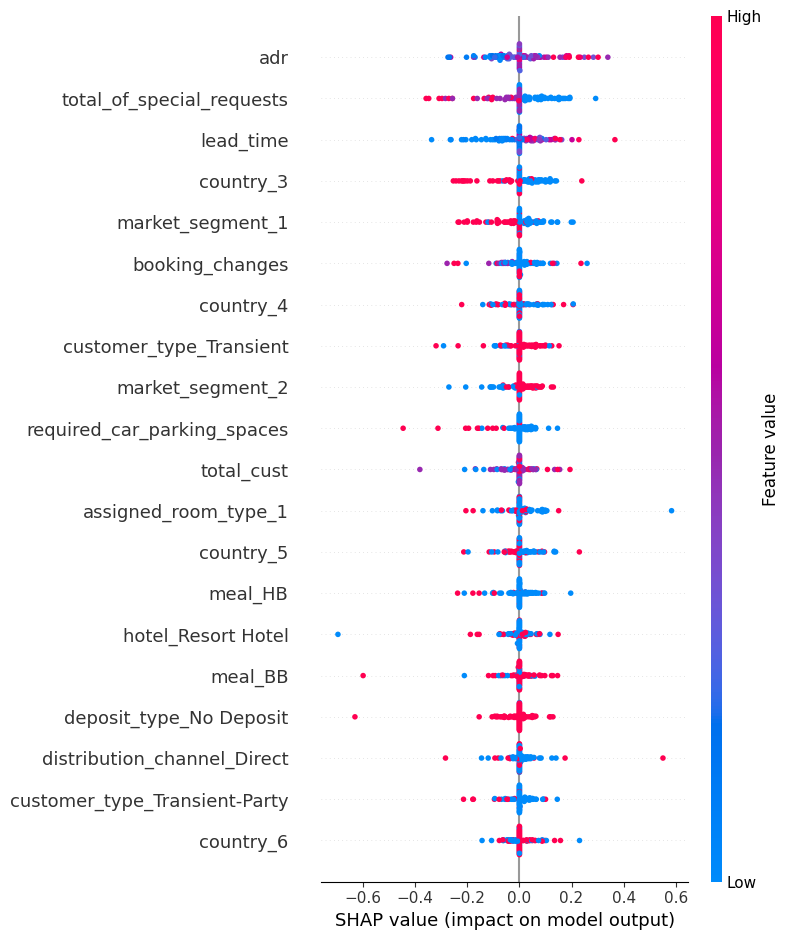

In [108]:
# Pipeline Model terpilih
knn_adasyn_pipeline = ImbPipe([
    ('preprocessing', preprocessor),
    ('oversampling', ADASYN(random_state=42)),  
    ('model', KNeighborsClassifier(n_neighbors=19))
])

# Fit pipeline dengan data train
knn_adasyn_pipeline.fit(xtrain, ytrain)  

# Extract data train yang ditransformasikan untuk digunakan dengan SHAP
X_transformed = knn_adasyn_pipeline.named_steps['preprocessing'].transform(xtrain)

# Ekstrak nama fitur dari setiap transformer dalam ColumnTransformer
feature_names = []
prepros = knn_adasyn_pipeline.named_steps['preprocessing']
for name, trans, cols in prepros.transformers_:
    if hasattr(trans, 'get_feature_names_out'):
        feature_names.extend(trans.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

# Menggunakan fitted model untuk menghitung permutation importance
model = knn_adasyn_pipeline.named_steps['model']

# Penghitungan SHAP value dan pembuatan visualisasi
explainer = shap.KernelExplainer(model.predict, shap.sample(X_transformed, 100))
shap_values = explainer.shap_values(shap.sample(X_transformed, 100), nsamples=100)  # Adjust nsamples based on computational resource
shap.summary_plot(shap_values, shap.sample(X_transformed, 100), feature_names=feature_names)

In [113]:
# Membuat dictionary untuk menyimpan nilai SHAP setiap fitur
shap_values_dict = {}

# Loop untuk mengambil nilai SHAP setiap fitur
for i in range(shap_values.shape[1]):
    shap_values_dict[feature_names[i]] = shap_values[:, i]

# Contoh akses nilai SHAP untuk fitur 'feature2'
shap_val_df = pd.DataFrame(shap_values_dict)

# Fungsi untuk menghitung dan plot kerapatan
def calculate_density(feature_data):
    kde = KernelDensity(bandwidth=0.2)  # Sesuaikan bandwidth sesuai kebutuhan
    kde.fit(feature_data.values.reshape(-1, 1))

    x_grid = np.linspace(feature_data.min(), feature_data.max(), 100)
    log_prob = kde.score_samples(x_grid.reshape(-1, 1))
    pdf = np.exp(log_prob)

    return pdf.max()

density_df = {
    'Fitur':[]
    ,'Min Value':[]
    ,'Max Value':[]
    ,'Rentang Nilai':[]
    ,'Rata-Rata':[]
    ,'Max Density':[]
}
# Loop untuk setiap fitur
for feature in shap_val_df.columns:
    max_density = calculate_density(shap_val_df[feature])
    min_value = shap_val_df[feature].min()
    max_value = shap_val_df[feature].max()
    rentang = max_value + abs(min_value)
    rata_rata = abs(shap_val_df[feature]).mean()
    
    density_df['Fitur'].append(feature)
    density_df['Min Value'].append(min_value)
    density_df['Max Value'].append(max_value)
    density_df['Rentang Nilai'].append(rentang)
    density_df['Rata-Rata'].append(rata_rata)
    density_df['Max Density'].append(max_density)
    
SHAPresult = pd.DataFrame(density_df)

In [123]:
SHAPresult = SHAPresult.sort_values(by='Rata-Rata', ascending=False).reset_index()
SHAPresult = SHAPresult.drop(columns='index')

In [124]:
SHAPresult

,Fitur,Min Value,Max Value,Rentang Nilai,Rata-Rata,Max Density
0,adr,-0.274030,0.339264,0.613294,0.085657,1.729174
1,total_of_special_requests,-0.358054,0.292546,0.650600,0.082965,1.732165
2,lead_time,-0.337006,0.366309,0.703315,0.071574,1.786076
3,country_3,-0.253606,0.239283,0.492889,0.061796,1.826051
4,market_segment_1,-0.235311,0.205855,0.441166,0.057435,1.845989
5,booking_changes,-0.277614,0.259567,0.537181,0.044852,1.880823
6,country_4,-0.221443,0.206457,0.427900,0.038998,1.902599
7,customer_type_Transient,-0.319897,0.151966,0.471863,0.037715,1.904890
8,market_segment_2,-0.270559,0.130201,0.400761,0.036914,1.920579
9,required_car_parking_spaces,-0.446142,0.146077,0.592220,0.036649,1.900856


**Insights:**

- **Sumbu vertikal (sumbu y) menunjukkan urutan fitur-fitur terpenting**  dalam memengaruhi hasil prediksi. Semakin kebawah, fitur-fitur tersebut semakin rendah kepentingannya dalam mempengaruhi hasil prediksi.
Artinya fitur yang paling berpengaruh pada model adalah fitur `adr`. Hal ini dapat dibuktikan dengan tabel diatas rata-rata dari nilai SHAP, dimana fitur `adr` memiliki nilai rata-rata tertinggi.

In [125]:
SHAPresult.head(10)

,Fitur,Min Value,Max Value,Rentang Nilai,Rata-Rata,Max Density
0,adr,-0.274030,0.339264,0.613294,0.085657,1.729174
1,total_of_special_requests,-0.358054,0.292546,0.650600,0.082965,1.732165
2,lead_time,-0.337006,0.366309,0.703315,0.071574,1.786076
3,country_3,-0.253606,0.239283,0.492889,0.061796,1.826051
4,market_segment_1,-0.235311,0.205855,0.441166,0.057435,1.845989
5,booking_changes,-0.277614,0.259567,0.537181,0.044852,1.880823
6,country_4,-0.221443,0.206457,0.427900,0.038998,1.902599
7,customer_type_Transient,-0.319897,0.151966,0.471863,0.037715,1.904890
8,market_segment_2,-0.270559,0.130201,0.400761,0.036914,1.920579
9,required_car_parking_spaces,-0.446142,0.146077,0.592220,0.036649,1.900856


- **Sumbu horizontal (sumbu x) menunjukkan nilai SHAP**, dimana nilai SHAP negatif berarti fitur menghasilkan output negatif atau model memprediksi 0 (booking not canceled), sedangkan nilai positif berarti fitur menghasilkan output positif atau model meprediksi 1 (booking canceled). Artinya semakin kecil (negatif) nilai SHAP dari suatu fitur, maka semakin ke kiri letak plot, dan semakin fitur tersebut berpengaruh untuk memberikan hasil negatif. Begitu pula sebaliknya, semakin tinggi nilai SHAP dari suatu fitur, semakin ke kanan letak plot, dan fitur tersebut semakin berpengaruh untuk memberikan hasil positif.

In [129]:
leftmostSHAP = SHAPresult[ SHAPresult['Min Value'] == SHAPresult['Min Value'].min()]
righttmostSHAP = SHAPresult[ SHAPresult['Max Value'] == SHAPresult['Max Value'].max()]

display(leftmostSHAP, righttmostSHAP)

,Fitur,Min Value,Max Value,Rentang Nilai,Rata-Rata,Max Density
14,hotel_Resort Hotel,-0.696236,0.148436,0.844673,0.030774,1.930325


,Fitur,Min Value,Max Value,Rentang Nilai,Rata-Rata,Max Density
11,assigned_room_type_1,-0.205279,0.583712,0.788991,0.033754,1.918737


- **Warna titik di setiap baris mewakili nilai asli fitur**, dimana merah berarti nilai fitur tinggi, dan biru berarti nilai fitur rendah. Artinya, jika titik merah berada di sisi positif, berarti nilai fitur yang tinggi dapat menghasilkan prediksi 1, dan sebaliknya. Oleh karena itu dapat disimpulkan:

    - Semakin tinggi nilai fitur `adr`, `total_of_special_request`, `lead_time`, `country_3`, `market_segment_1`, `booking_changes`, country_4, customer_type_Transient, dan `market_segment_2` dapat menghasilkan prediksi 1 (booking canceled).

    - Semakin rendah nilai fitur selain yang belum disebutkan dapat menghasilkan prediksi 0 (booking not canceled).

- **Luasnya rentang nilai** menunjukkan fitur tersebut memiliki **pengaruh yang bervariasi terhadap model**, sedangkan rentang nilai sempit berarti pengaruhnya relatif konsisten. Artinya, fitur dengan rentang nilai yang sempit menunjukkan fitur tersebut menjadi faktor pembatalan di semua pemesanan dengan pola yang sama (misalnya jika suatu fitur bervalue tinggi dan menghasilkan prediksi 1 maka untuk keseluruhan pesanan dengan fitur tertentu tersebut yang bervalue tinggi akan selalu diprediksi 1, begitu juga sebaliknya).

In [133]:
SHAPresult.sort_values(by='Rentang Nilai').head(5)

,Fitur,Min Value,Max Value,Rentang Nilai,Rata-Rata,Max Density
40,deposit_type_Refundable,0.000000,0.000000,0.000000,0.000000,1.994711
38,distribution_channel_GDS,0.000000,0.000000,0.000000,0.000000,1.994711
39,customer_type_Group,0.000000,0.000000,0.000000,0.000000,1.994711
36,customer_type_Contract,-0.122997,0.088162,0.211159,0.018996,1.967141
32,previous_cancellations,-0.077513,0.173490,0.251003,0.022196,1.956077



    Fitur-fitur yang memiliki penyebaran titik yang sempit:
    1. Customer_Type_Transient
    2. Market_Segment_1
    3. Market_Segment_2
    4. Required_Car_Parking_Spaces
    5. Distribution_Channel_Direct

    Fitur-fitur ini memiliki distribusi titik yang lebih **terkonsentrasi di sekitar satu nilai SHAP**, menunjukkan bahwa kontribusi mereka terhadap prediksi model relatif seragam di seluruh data


#### **C. Impact of Model Implementation (Simulasi Finansial)**

##### C.1. Menghitung Potensial Revenue dan Loss dengan Menerapkan Model

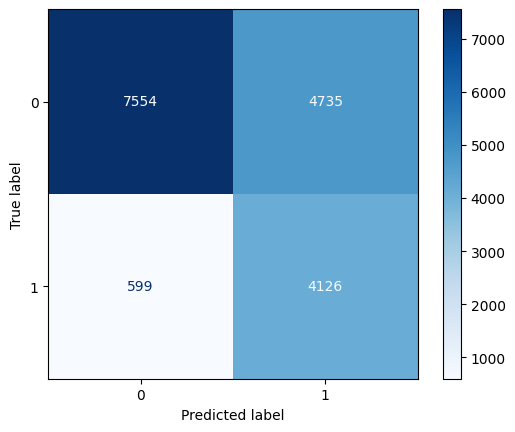

In [115]:
# Menghitung confusion matrix
cm = confusion_matrix(ytest, ypred_final)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

- True Positive (4143): Ada 4143 kasus yang diprediksi cancel dan memang cancel.
- True Negative (7556): Ada 7556 kasus yang diprediksi tidak cancel dan memang tidak cancel.
- False Positive (4733): Ada 4733 kasus yang diprediksi cancel tetapi sebenarnya tidak cancel (kesalahan prediksi).
- False Negative (582): Ada 582 kasus yang diprediksi tidak cancel tetapi sebenarnya cancel (kesalahan prediksi yang penting dalam konteks prediksi cancel).



Untuk mensimulasikan dampak finansial dari strategi pemberian diskon kepada orang-orang yang diprediksi akan cancel, kita dapat menghitung potensi peningkatan revenue berdasarkan False Positive (FP) dan False Negative (FN) dari confusion matrix, serta jumlah booking aktual.

**Data dari Confusion Matrix:**
- True Positive (TP): 4143
Kasus dimana model memprediksi cancel dengan benar, dan mereka akan diberi kupon diskon.
- True Negative (TN): 7556
Kasus dimana model memprediksi tidak cancel dengan benar, dan mereka akan tetap membayar dengan harga normal
- False Positive (FP): 4733
Kasus dimana model memprediksi cancel, tetapi sebenarnya tidak cancel. Jika mereka diberi kupon diskon 10%, ini bisa menurunkan pendapatan dari orang-orang yang memang sebenarnya tidak cancel.
- False Negative (FN): 582
Kasus dimana model memprediksi tidak cancel, tetapi sebenarnya cancel. Ini adalah orang-orang yang tidak mendapatkan kupon diskon, jadi berpotensi hilang sebagai pelanggan.


**Strategi Diskon:**
Harga Sewa Rata-rata: 302 €
Diskon: 10% (sehingga pelanggan membayar 271.8 € jika diberikan diskon).

**Potensi Impact Finansial:**

1. False Positive (FP) Impact:

   Model salah memberi diskon kepada 4733 orang yang sebenarnya tidak akan cancel. Jika mereka tetap menyewa dengan diskon, maka:

            Revenue dari FP = 4733 × 271.8 € = 1,286,429.4 €

    Tanpa diskon, total revenue dari mereka seharusnya:

            Revenue Tanpa Diskon FP = 4733 × 302 € = 1,429,366 €

    Kerugian dari FP: 1,429,366 € − 1,286,429.4 € = 142,936.6 €

2. True Positive (TP) Impact:

   Model memberikan diskon kepada 4143 orang yang benar-benar akan cancel. Karena diberikan kupon diskon, mereka tetap menyewa, menghasilkan revenue:
   
            Revenue dari TP = 4143 × 271.8 € = 1,126,067.4 €

   Tanpa intervensi, mereka akan cancel, sehingga revenue dari mereka akan nol.

3. False Negative (FN) Impact:

   Model gagal mendeteksi 582 orang yang sebenarnya cancel. Tanpa diskon, mereka tetap cancel, sehingga potensi revenue yang hilang dari FN adalah:
   
            Revenue yang Hilang dari FN = 582 × 302 € = 175,764 €

4. True Negative

   Model berhasil mendeteksi 7556 orang yang sebenarnya tidak akan cancel. Sehingga tamu-tamu ini tidak akan diberikan diskon dan akan membayar dengan harga normal:

            Revenue dari FN = 7556 x 302 = 2,281,912 €

Total Impact:
- Total Revenue dengan Diskon = Revenue dari TP + Revenue dari FP + Revenue dari TN:

            1,126,067.4 € + 1,286,429.4 € + 2,281,912 € = 4,694,408 €

- Total Revenue Tanpa Diskon (Asumsi jika semua orang tidak cancel) = Revenue Tanpa Diskon dari FP + Revenue dari FN:

            1,429,366 € (hanya FP) + 0 (untuk TP karena mereka cancel tanpa diskon) + 2,281,912 € = 3,711,278 €

- Net Gain atau Loss dari Strategi:

            Net Impact = Revenue dengan Diskon − Revenue Tanpa Diskon
            Net Impact = 4,694,408 € − 3,711,278 € = 983,130 € (profit bersih)

**Kesimpulan:**
Dengan menerapkan model prediksi dan strategi pemberian diskon 10% kepada orang-orang yang diprediksi cancel:

- Potensi revenue yang diperoleh dari orang yang tadinya cancel (True Positive) sebesar 1,126,067.4 €.
- Ada kerugian sebesar 142,936.6 € dari orang-orang yang sebenarnya tidak akan cancel tetapi diberikan diskon (False Positive).
- Potensi kehilangan revenue dari orang yang cancel tanpa diskon (False Negative) sebesar 175,764 €
- Secara total, strategi ini bisa memberikan keuntungan bersih sebesar 983,130 € dibandingkan jika tidak memberikan kupon diskon sama sekali.

- Total Revenue dan Loss dengan menerapkan diskon

            Total Revenue = Revenue dari TP + Revenue dari FP + Revenue dari TN
            Total Revenue = 1,126,067.4 € + 1,286,429.4 € + 2,281,912 € 
            Total Revenue = 4,694,408 €

            Total Loss = Kerugian dari FP +  Revenue yang Hilang dari FN 
            Total Loss = 142,936.6 € + 175,764 €
            Total Loss = 318,700 €

- Total Revenue dan Loss tanpa menerapkan diskon

            Total Revenue = Revenue dari FP tanpa diskon + Revenue dari TN
            Total Revenue = 1,429,366 € + 2,281,912 €
            Total Revenue = 3,711,278

            Total Loss = Revenue hilang dari FN + Revenue dari TP
            Total Loss = 175,764 € + 1,126,067.4 €
            Total Loss = 1,301,831 €

##### C.2. Menghitung Potensial Revenue dan Loss Tanpa Menerapkan Model

In [116]:
total_fee_data = pd.DataFrame(mainData['total_fee'])
total_fee_data


,total_fee
2,75.00
3,75.00
4,196.00
6,214.00
7,206.00
...,...
119385,672.98
119386,1578.01
119387,1103.97
119388,730.80


In [117]:
# Menggabungkan xtest dan ytest berdasarkan index
combined_data = pd.concat([xtest, ytest], axis=1)

# Menampilkan hasil gabungan
combined_data

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,is_canceled
94556,178,0,0,0,137.25,1,1,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0
6357,6,0,0,0,169.00,0,0,4.0,Resort Hotel,BB,DNK,Online TA,TA/TO,No,G,No Deposit,Transient,1
88029,73,0,0,0,82.69,0,1,2.0,City Hotel,SC,DEU,Online TA,TA/TO,No,A,No Deposit,Transient,0
95976,211,0,0,1,121.55,0,2,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0
11379,227,0,0,0,81.00,0,0,2.0,Resort Hotel,BB,GBR,Online TA,TA/TO,No,E,No Deposit,Transient,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39135,102,0,0,0,148.50,0,0,2.0,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,No,A,No Deposit,Contract,0
88923,1,0,0,0,221.00,0,2,4.0,City Hotel,BB,GBR,Online TA,TA/TO,No,F,No Deposit,Transient,0
99566,77,0,0,0,135.10,0,0,3.0,City Hotel,BB,PRT,Direct,Direct,No,D,No Deposit,Transient,0
77066,219,0,0,0,108.00,0,0,2.0,City Hotel,HB,DEU,Offline TA/TO,TA/TO,No,D,No Deposit,Transient-Party,0


In [118]:
data_test = xtest.copy()
data_test

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type
94556,178,0,0,0,137.25,1,1,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient
6357,6,0,0,0,169.00,0,0,4.0,Resort Hotel,BB,DNK,Online TA,TA/TO,No,G,No Deposit,Transient
88029,73,0,0,0,82.69,0,1,2.0,City Hotel,SC,DEU,Online TA,TA/TO,No,A,No Deposit,Transient
95976,211,0,0,1,121.55,0,2,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient
11379,227,0,0,0,81.00,0,0,2.0,Resort Hotel,BB,GBR,Online TA,TA/TO,No,E,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39135,102,0,0,0,148.50,0,0,2.0,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,No,A,No Deposit,Contract
88923,1,0,0,0,221.00,0,2,4.0,City Hotel,BB,GBR,Online TA,TA/TO,No,F,No Deposit,Transient
99566,77,0,0,0,135.10,0,0,3.0,City Hotel,BB,PRT,Direct,Direct,No,D,No Deposit,Transient
77066,219,0,0,0,108.00,0,0,2.0,City Hotel,HB,DEU,Offline TA/TO,TA/TO,No,D,No Deposit,Transient-Party


In [119]:
# Reset index untuk total_fee_data agar bisa dicocokkan dengan xtest
total_fee_data = total_fee_data.reset_index()

# Lakukan merge berdasarkan index dari xtest
merged_data = combined_data.merge(total_fee_data, left_index=True, right_on='index', how='left')

# Drop kolom 'index' yang dihasilkan dari total_fee_data setelah merge
merged_data = merged_data.drop(columns=['index'])


In [120]:
merged_data

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_cust,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,deposit_type,customer_type,is_canceled,total_fee
64735,178,0,0,0,137.25,1,1,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0,686.25
4499,6,0,0,0,169.00,0,0,4.0,Resort Hotel,BB,DNK,Online TA,TA/TO,No,G,No Deposit,Transient,1,507.00
59545,73,0,0,0,82.69,0,1,2.0,City Hotel,SC,DEU,Online TA,TA/TO,No,A,No Deposit,Transient,0,248.07
65977,211,0,0,1,121.55,0,2,3.0,City Hotel,BB,FRA,Online TA,TA/TO,No,D,No Deposit,Transient,0,607.75
8262,227,0,0,0,81.00,0,0,2.0,Resort Hotel,BB,GBR,Online TA,TA/TO,No,E,No Deposit,Transient,1,810.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32213,102,0,0,0,148.50,0,0,2.0,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,No,A,No Deposit,Contract,0,1039.50
60266,1,0,0,0,221.00,0,2,4.0,City Hotel,BB,GBR,Online TA,TA/TO,No,F,No Deposit,Transient,0,221.00
68864,77,0,0,0,135.10,0,0,3.0,City Hotel,BB,PRT,Direct,Direct,No,D,No Deposit,Transient,0,135.10
51994,219,0,0,0,108.00,0,0,2.0,City Hotel,HB,DEU,Offline TA/TO,TA/TO,No,D,No Deposit,Transient-Party,0,108.00


In [121]:
# Menghitung jumlah orang yang cancel dan tidak cancel
cancel_counts = merged_data['is_canceled'].value_counts()

# Menghitung total revenue dari orang yang tidak cancel (is_canceled == 0)
revenue_generated = merged_data[merged_data['is_canceled'] == 0]['total_fee'].sum()

# Menghitung revenue lost dari orang yang cancel (is_canceled == 1)
revenue_lost = merged_data[merged_data['is_canceled'] == 1]['total_fee'].sum()

# Menampilkan hasil
print("Jumlah orang yang tidak cancel:", cancel_counts[0])
print("Jumlah orang yang cancel:", cancel_counts[1])

Jumlah orang yang tidak cancel: 12289
Jumlah orang yang cancel: 4725


In [122]:
merged_data['total_fee'].median()

302.0

 - median EUR 302
 - Revenue yang didapat = 12289 x 302 = 3,711,278 €
 - Revenue yang hilang  = 4725 x 302 = 1,426,950 €

##### C.3. Perbandingan Potensial Revenue dan Loss dengan Menerapkan Model dan Tidak

Perbandingan antara revenue yang didapat dan hilang antara penarapan model dan tidak 

1. Menggunakan model dan menerapkan diskon
   - Potensi Revenue maksimal = 4,694,408 €
   - Potensi Loss maksimal = 318,700 €

2. Menggunakan model dan tidak menerapkan diskon
   - Potensi Revenue maksimal = 3,711,278 €
   - Potensi Loss maksimal = 1,301,831 €

3. Tanpa menggunakan model
   - Revenue = 3,711,278 €
   - Loss = 1,426,950 €




##### **D. Save Model dengan Pickle**

In [123]:
import pickle

with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(knn_adasyn_pipeline, model_file)

print("Model Telah Disimpan.")

Model Telah Disimpan.


## **BAB 5: Kesimpulan & Rekomendasi**

**Kesimpulan:**

1. Model KNN dengan oversampling adasyn dan parameter n_neighbors: 19 merupakan model terbaik untuk memprediksi pembatalan booking pada hotel.

2. Recall sebesar 86.94% yang dihasilkan model terbaik pada dataset train dan 87.5% pada dataset test menunjukkan performanya stabil ketika diuji pada data yang belum pernah dilihat sebelumnya (data baru masuk).
- Recall 86.94% pada data train berarti model berhasil mendeteksi kasus true positif (canceled booking yang benar terprediksi) sebesar 86%.
- Recall 87.5% pada data test berarti model berhasil mendeteksi kasus true positif (canceled booking yang benar terprediksi) sebesar 87%.

3. jika terdapat kesalahan prediksi dapat disebabkan oleh faktor lain di luar fitur yang dilatih, karena beberapa proses (Feature Engineering, Model Benchmarking  dengan ensemble models; boosting; bagging, Resampling, dan Hyperparameter Tuning) telah dilakukan untuk mengurangi kesalahan prediksi.

4. Fitur yang paling memengaruhi prediksi pembatalan booking adalah ‘total_of_special_requests'. Faktor yang mendorong model untuk menghasilkan prediksi booking dibatalkan adalah tingginya value pada beberapa fitur (adr, lead time, market segment_2, customer type_transient, assigned room_type 2, hotel_city hotel, country_6, assigned room_type 3, dan total cust), hal ini berdasarkan hasil pengujian SHAP.
5. Model ini memiliki keterbatasan, artinya model ini akan memprediksi secara akurat jika diterapkan dalam rentang data yang meliputi:
- lead time 0 - 465 hari
- previous cancellation 0 - 13 kali
- previous booking not canceled 0 - 70 kali
- booking changes 0 - 18 kali
- adr 12 - 372.33 €
- required car parking spaces 0 - 3
- total of special request 0 - 5
- total_cust 0 - 5 orang
8. Dampak penggunaan model klasifikasi jika diterapkan oleh pihak hotel adalah dapat mengurangi revenue loss maksimal dan meningkatkan potensi revenue maksimal dengan rincian sebagai berikut:
- Menggunakan model dan menerapkan diskon
    - Potensi Revenue maksimal = 4,694,408 €
    - Potensi Loss maksimal = 318,700 €
-	Menggunakan model dan tidak menerapkan diskon
    - Potensi Revenue maksimal = 3,711,278 €
    - Potensi Loss maksimal = 1,301,831 €
-	Tanpa menggunakan model
    - Revenue = 3,711,278 €
    - Loss = 1,426,950 €
9. Selain itu, berdasarkan analisis data mengenai cancellation rate, upaya **memfokuskan target pemasaran** pada customer yang cenderung tidak membatalkan booking dan **menargetkan kebijakan pembatalan** pada customer yang cenderung membatalkan booking, dapat menekan cancellation rate dan mencegah adanya opportunity cost yang dapat mencapai 3.18% berdasarkan ADR (Average Daily Rate).

**Rekomendasi:**

Lingkup Bisnis:

- Target pemasaran dapat dievaluasi dan disusun ulang berdasarkan kriteria customer dan pesanan dengan persentase canceled booking yang rendah (karakteristik spesifik telah disebutkan di bagian rekomendasi EDA).
- Kebijakan pembatalan dapat diterapkan tepat sasaran pada kriteria customer dan pesanan dengan persentase canceld booking yang tinggi (karakteristik spesifik telah disebutkan di bagian rekomendasi EDA).
- Sebaiknya, pihak hotel dapat memanfaatkan penggunaan model prediksi yang telah dibuat untuk memprediksi pembatalan booking dan dengan menerapkan strategi pemberian diskon untuk mendapatkan potensi revenue maksimal.

Lingkup Data dan Model:

- Perbarui data dengan tahun yang lebih baru (> 2020) untuk mendapatkan hasil yang lebih relevan untuk saat ini, karena data hotel booking tersebut dalam rentang tahun 2015-2017.
- Untuk meningkatkan nilai recall dalam prediksi, dapat menambah fitur yang relevan, seperti rating hotel, kondisi cuaca (cuaca buruk mungkin meningkatkan kemungkinan pembatalan, terutama untuk hotel di tujuan wisata), dan acara lokal / nasional (jika ada acara seperti adanya festival, kemungkinan pembatalan mungkin lebih rendah).
